# Simulated Data Analysis



The initial aims of the analsis are to become falimiliar with the data sets and produce a basic claasifying neural network. The following document shows this process.

###  Standard imports and practical functions

In [1]:
#importing relevant modules 
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use(hep.style.ATLAS)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_circles
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay

In [4]:
import tensorflow as tf
from tensorflow import keras

### Downloading the datasets

Two datsets were used and needed to be downloaded. Both contain simulated events of pp collisions an the ATLAS/LHC experiment. 
There is background data and signal data, both of which need to be loaded from csv files.

In [5]:
#loading the signal data into pandas
signal=pd.read_csv('ResmMed4000mX1lb0p2yp0p4.csv',delimiter=',',index_col=0) 
signal

combinedWeight  eventNumber     mu  mu_actual  mcChannelNumber  \
0            0.002457        29427  26.50      26.50           503969   
1            0.001742        20399  43.50      43.50           503969   
2            0.000149        20245  68.50      68.50           503969   
3            0.002245        29644  21.50      21.50           503969   
4            0.002265        29902  34.49      34.49           503969   
...               ...          ...    ...        ...              ...   
73054        0.003557        18540  24.50      24.50           503969   
73055        0.003050        18326  27.50      27.50           503969   
73056        0.003110        19379  19.50      19.50           503969   
73057        0.003067        18230  20.50      20.50           503969   
73058        0.003272        18029  14.49      14.49           503969   

              MET   MET_Phi  isOdd  isBlind  nGoodJets  ...     ljet_pz  \
0      1253.91190  0.875348      2        0          3  ...  -965.40580   
1      2161.91550 -1.477896      4        0          5  ... -1814.06570   
2      1358.23050  1.024441      0        0          2  ... -1963.48120   
3       946.76470 -3.137932      4        0          5  ... -2545.31520   
4      1231.93880 -2.398198      2        0          2  ... -1485.92000   
...           ...       ...    ...      ...        ...  ...         ...   
73054  1757.23250 -0.051079      0        0          5  ...   123.68946   
73055  1255.46790 -1.575517      1        0          2  ...  1032.87460   
73056  1354.64610  1.238251      4        0          2  ...  1181.49850   
73057   561.59326  1.527898      0        0          3  ...  -230.97958   
73058  1880.89100  2.796915      4        0          4  ...  -290.75253   

        fjet_px    fjet_py    fjet_pz  MET_m  MET_eta       MET_px  \
0      0.000000   0.000000     0.0000    0.0      0.0   803.418200   
1      3.495823 -27.101604  1201.5969    0.0      0.0   200.554960   
2      0.000000   0.000000     0.0000    0.0      0.0   705.704600   
3      0.000000   0.000000     0.0000    0.0      0.0  -946.758360   
4      0.000000   0.000000     0.0000    0.0      0.0  -906.922700   
...         ...        ...        ...    ...      ...          ...   
73054  0.000000   0.000000     0.0000    0.0      0.0  1754.940700   
73055  0.000000   0.000000     0.0000    0.0      0.0    -5.926256   
73056  0.000000   0.000000     0.0000    0.0      0.0   442.224550   
73057  0.000000   0.000000     0.0000    0.0      0.0    24.083847   
73058  0.000000   0.000000     0.0000    0.0      0.0 -1770.265600   

           MET_py  gen_split  train_weight  
0       962.71185      train      0.000041  
1     -2152.59300       test      0.000041  
2      1160.50460      train      0.000041  
3        -3.46526      train      0.000041  
4      -833.76526       test      0.000041  
...           ...        ...           ...  
73054   -89.71836        val      0.000041  
73055 -1255.45390        val      0.000041  
73056  1280.43100       test      0.000041  
73057   561.07660       test      0.000041  
73058   635.53955       test      0.000041  

[73059 rows x 94 columns]

In [6]:
#loading the background data into pandas
background=pd.read_csv('bkg.csv',delimiter=',',index_col=0)
background

combinedWeight  eventNumber     mu  mu_actual  mcChannelNumber  \
1729653         0.332625     40640708  35.50      35.50           364189   
1729654        -1.161766     41456002  26.50      26.50           364189   
1729655        -1.400458     20244569  30.50      30.50           364189   
1729656         0.659238     22529054  60.49      60.49           364189   
1729657         0.504083     27868153  61.50      61.50           364189   
...                  ...          ...    ...        ...              ...   
12045768       -0.293210      3951795  20.50      20.50           363360   
12045769        0.210123      3951228  29.50      29.50           363360   
12045770        1.116717    101070107  34.50      34.50           364161   
12045771        0.871359      1869028  32.50      32.50           364161   
12045772       -0.913128      2859166  30.50      30.50           364161   

                MET   MET_Phi  isOdd  isBlind  nGoodJets  ...     ljet_pz  \
1729653   421.76645 -1.558095      3        1          2  ...   -4.456766   
1729654   556.76290 -0.552731      2        0          2  ...  185.337520   
1729655   378.92535 -2.028987      4        0          1  ...  407.697270   
1729656   452.33527  2.537561      4        1          2  ...  290.831020   
1729657   346.99188  0.102265      3        1          2  ... -244.370090   
...             ...       ...    ...      ...        ...  ...         ...   
12045768  373.53116  1.076515      0        1          1  ... -388.146330   
12045769  330.09985  2.804862      3        1          4  ... -393.796630   
12045770  302.97430  0.668169      2        1          3  ...   95.003360   
12045771  302.99292 -1.547454      3        1          2  ...  472.826080   
12045772  307.98914  1.035005      1        1          2  ...  702.427400   

            fjet_px    fjet_py    fjet_pz  MET_m  MET_eta      MET_px  \
1729653    0.000000   0.000000    0.00000    0.0      0.0    5.356909   
1729654  -39.097496  35.783646  364.77255    0.0      0.0  473.857480   
1729655    0.000000   0.000000    0.00000    0.0      0.0 -167.608470   
1729656    0.000000   0.000000    0.00000    0.0      0.0 -372.295780   
1729657   20.009250  21.957062  902.11115    0.0      0.0  345.179020   
...             ...        ...        ...    ...      ...         ...   
12045768   0.000000   0.000000    0.00000    0.0      0.0  177.203030   
12045769   0.000000   0.000000    0.00000    0.0      0.0 -311.561460   
12045770  15.402013  35.776060  490.74080    0.0      0.0  237.821930   
12045771   0.000000   0.000000    0.00000    0.0      0.0    7.071810   
12045772 -63.526840 -32.295230  673.08466    0.0      0.0  157.235240   

             MET_py  gen_split  train_weight  
1729653  -421.73242      train  2.071309e-06  
1729654  -292.30804      train  1.014583e-06  
1729655  -339.84088       test  8.460477e-07  
1729656   256.91060       test  2.302945e-06  
1729657    35.42335       test  2.193199e-06  
...             ...        ...           ...  
12045768  328.82310       test  6.079835e-07  
12045769  109.06594      train  6.177875e-07  
12045770  187.70766      train  6.568845e-07  
12045771 -302.91040       test  6.298258e-07  
12045772  264.82898      train  4.054871e-07  

[10316120 rows x 94 columns]

### Checking the data

Each data set is checked by describing its attributes to ensure they are as expected

In [7]:
# examining features of background data sets
background.describe()


combinedWeight   eventNumber            mu     mu_actual  \
count    1.031612e+07  1.031612e+07  1.031612e+07  1.031612e+07   
mean     3.525774e+01  2.132424e+07  3.343209e+01  3.343209e+01   
std      1.637394e+02  6.177125e+07  1.356050e+01  1.356050e+01   
min     -6.594360e+03  1.000000e+00  5.000000e-01  5.000000e-01   
25%      8.201520e-01  4.095324e+06  2.350000e+01  2.350000e+01   
50%      1.049613e+00  8.512823e+06  3.150000e+01  3.150000e+01   
75%      1.168255e+00  1.536451e+07  4.150000e+01  4.150000e+01   
max      4.081113e+03  5.447988e+08  9.950000e+01  9.950000e+01   

       mcChannelNumber           MET       MET_Phi         isOdd  \
count     1.031612e+07  1.031612e+07  1.031612e+07  1.031612e+07   
mean      3.681723e+05  4.206147e+02 -1.496935e-02  1.999839e+00   
std       1.305176e+04  1.497295e+02  1.810707e+00  1.414382e+00   
min       3.633550e+05  3.000000e+02 -3.141592e+00  0.000000e+00   
25%       3.641540e+05  3.289008e+02 -1.582353e+00  1.000000e+00   
50%       3.641550e+05  3.728911e+02 -3.100742e-02  2.000000e+00   
75%       3.641930e+05  4.595368e+02  1.552442e+00  3.000000e+00   
max       4.106590e+05  1.207537e+05  3.141592e+00  4.000000e+00   

            isBlind     nGoodJets  ...       ljet_py       ljet_pz  \
count  1.031612e+07  1.031612e+07  ...  1.031612e+07  1.031612e+07   
mean   7.594461e-01  3.174298e+00  ...  2.921146e+00 -5.394687e+00   
std    4.274199e-01  1.771471e+00  ...  3.669431e+02  6.384892e+02   
min    0.000000e+00  1.000000e+00  ... -4.165544e+03 -5.973765e+03   
25%    1.000000e+00  2.000000e+00  ... -2.772477e+02 -3.626591e+02   
50%    1.000000e+00  3.000000e+00  ...  6.903763e+00 -5.448179e+00   
75%    1.000000e+00  4.000000e+00  ...  2.807020e+02  3.498769e+02   
max    1.000000e+00  1.700000e+01  ...  3.894387e+03  5.962730e+03   

            fjet_px       fjet_py       fjet_pz       MET_m     MET_eta  \
count  1.031612e+07  1.031612e+07  1.031612e+07  10316120.0  10316120.0   
mean  -1.432853e-02 -3.521294e-02  5.757653e-02         0.0         0.0   
std    3.082981e+01  3.084975e+01  5.036841e+02         0.0         0.0   
min   -1.025984e+03 -9.389770e+02 -7.158742e+03         0.0         0.0   
25%    0.000000e+00  0.000000e+00  0.000000e+00         0.0         0.0   
50%    0.000000e+00  0.000000e+00  0.000000e+00         0.0         0.0   
75%    0.000000e+00  0.000000e+00  0.000000e+00         0.0         0.0   
max    9.342698e+02  9.616216e+02  7.276901e+03         0.0         0.0   

             MET_px        MET_py  train_weight  
count  1.031612e+07  1.031612e+07  1.031612e+07  
mean   5.486293e-01 -3.083716e+00  2.908070e-07  
std    3.142698e+02  3.171125e+02  3.592104e-07  
min   -4.077389e+03 -2.250812e+04  0.000000e+00  
25%   -2.687944e+02 -2.733871e+02  5.714322e-08  
50%    1.263000e+00 -6.059842e+00  1.710333e-07  
75%    2.697307e+02  2.685290e+02  4.561068e-07  
max    4.799936e+04  1.158742e+05  3.557362e-04  

[8 rows x 90 columns]

In [8]:
#examining features of signal data set
signal.describe()

combinedWeight   eventNumber            mu     mu_actual  \
count    73059.000000  73059.000000  73059.000000  73059.000000   
mean         0.002022  45189.869215     35.009322     35.009322   
std          0.000760  26039.833433     13.380486     13.380486   
min          0.000000      1.000000      0.500000      0.500000   
25%          0.001665  23100.500000     25.490000     25.490000   
50%          0.001816  45416.000000     33.500000     33.500000   
75%          0.002446  67733.500000     43.500000     43.500000   
max          0.005630  90000.000000     99.500000     99.500000   

       mcChannelNumber           MET       MET_Phi         isOdd  \
count          73059.0  73059.000000  73059.000000  73059.000000   
mean          503969.0   1509.097230     -0.008262      1.999959   
std                0.0    433.352373      1.813227      1.413705   
min           503969.0    300.146760     -3.141359      0.000000   
25%           503969.0   1241.178500     -1.587875      1.000000   
50%           503969.0   1616.892000     -0.000405      2.000000   
75%           503969.0   1850.907000      1.560869      3.000000   
max           503969.0   3455.730200      3.141556      4.000000   

            isBlind     nGoodJets  ...       ljet_py       ljet_pz  \
count  73059.000000  73059.000000  ...  73059.000000  73059.000000   
mean       0.015262      2.718748  ...      3.959043      4.588834   
std        0.122593      1.473719  ...   1088.258586   1368.650322   
min        0.000000      1.000000  ...  -2842.619000  -4811.891600   
25%        0.000000      2.000000  ...   -924.728525   -919.065280   
50%        0.000000      2.000000  ...      1.154041     13.042979   
75%        0.000000      4.000000  ...    934.596500    926.619175   
max        1.000000     13.000000  ...   2452.098100   5177.935500   

            fjet_px       fjet_py       fjet_pz    MET_m  MET_eta  \
count  73059.000000  73059.000000  73059.000000  73059.0  73059.0   
mean      -0.082310      0.013030      1.012043      0.0      0.0   
std       19.387119     19.552329    355.412913      0.0      0.0   
min     -370.771670   -413.497250  -3701.931200      0.0      0.0   
25%        0.000000      0.000000      0.000000      0.0      0.0   
50%        0.000000      0.000000      0.000000      0.0      0.0   
75%        0.000000      0.000000      0.000000      0.0      0.0   
max      511.132900    409.768800   4214.139600      0.0      0.0   

             MET_px        MET_py  train_weight  
count  73059.000000  73059.000000  7.305900e+04  
mean      -0.961858     -5.684025  4.106270e-05  
std     1106.390680   1114.031565  1.230140e-07  
min    -2616.440200  -2600.280000  4.082464e-05  
25%     -948.153900   -966.748810  4.096684e-05  
50%       -4.413946     -0.498324  4.103327e-05  
75%      945.111940    951.022680  4.117760e-05  
max     2909.810300   2807.767300  4.149564e-05  

[8 rows x 90 columns]

Column names of each data set are also checked.

In [9]:
background.columns

Index(['combinedWeight', 'eventNumber', 'mu', 'mu_actual', 'mcChannelNumber',
       'MET', 'MET_Phi', 'isOdd', 'isBlind', 'nGoodJets', 'nGoodbJets',
       'nGoodlJets', 'nGoodtoplJets', 'nForwardJets', 'nTruthJets', 'jet_pt',
       'jet_e', 'jet_eta', 'jet_phi', 'ljet_pt', 'topjet_pt', 'ljet_e',
       'topjet_e', 'ljet_m', 'topjet_m', 'ljet_eta', 'topjet_eta', 'ljet_phi',
       'topjet_phi', 'fjet_pt', 'fjet_e', 'fjet_eta', 'fjet_phi',
       'DeltaPhi_MET_ljet', 'Omega', 'DeltaPhi_MET_calojets', 'MT_JMET', 'HT',
       'mtop', 'DeltaPt_top_jets', 'DeltaE_top_jets', 'DeltaPt_top_jetsbjet',
       'DeltaE_top_jetsbjet', 'DeltaE_tot', 'DeltaPhi_bjet_topjet',
       'Centrality', 'Centrality2', 'Centrality3', 'DeltaR_max', 'MT_bMET_min',
       'DeltaR_bjet_topjet', 'DeltaPhi_MET_fjet', 'DeltaPhi_fjet_calojets',
       'DeltaPt_fjet_jets', 'DeltaPt_fjet_bjet', 'DeltaPt_fjet_top',
       'DeltaE_fjet_jets', 'DeltaE_fjet_jetsbjet', 'DeltaR_fjet_topjet',
       'DeltaR_bjet_fjet', 'Delt

In [10]:
signal.columns

Index(['combinedWeight', 'eventNumber', 'mu', 'mu_actual', 'mcChannelNumber',
       'MET', 'MET_Phi', 'isOdd', 'isBlind', 'nGoodJets', 'nGoodbJets',
       'nGoodlJets', 'nGoodtoplJets', 'nForwardJets', 'nTruthJets', 'jet_pt',
       'jet_e', 'jet_eta', 'jet_phi', 'ljet_pt', 'topjet_pt', 'ljet_e',
       'topjet_e', 'ljet_m', 'topjet_m', 'ljet_eta', 'topjet_eta', 'ljet_phi',
       'topjet_phi', 'fjet_pt', 'fjet_e', 'fjet_eta', 'fjet_phi',
       'DeltaPhi_MET_ljet', 'Omega', 'DeltaPhi_MET_calojets', 'MT_JMET', 'HT',
       'mtop', 'DeltaPt_top_jets', 'DeltaE_top_jets', 'DeltaPt_top_jetsbjet',
       'DeltaE_top_jetsbjet', 'DeltaE_tot', 'DeltaPhi_bjet_topjet',
       'Centrality', 'Centrality2', 'Centrality3', 'DeltaR_max', 'MT_bMET_min',
       'DeltaR_bjet_topjet', 'DeltaPhi_MET_fjet', 'DeltaPhi_fjet_calojets',
       'DeltaPt_fjet_jets', 'DeltaPt_fjet_bjet', 'DeltaPt_fjet_top',
       'DeltaE_fjet_jets', 'DeltaE_fjet_jetsbjet', 'DeltaR_fjet_topjet',
       'DeltaR_bjet_fjet', 'Delt

In [11]:
background['merge_sample']
np.unique(background['merge_sample'])

array(['Diboson', 'Wjets', 'Wt-channel', 'Zjets', 's-channel',
       't-channel', 'tZq', 'ttV', 'ttbar'], dtype=object)

### Plotting missing transverse energy of background

The first plot shows a basic plot of the total missing transverse energy across all background events


/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/3755528498.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


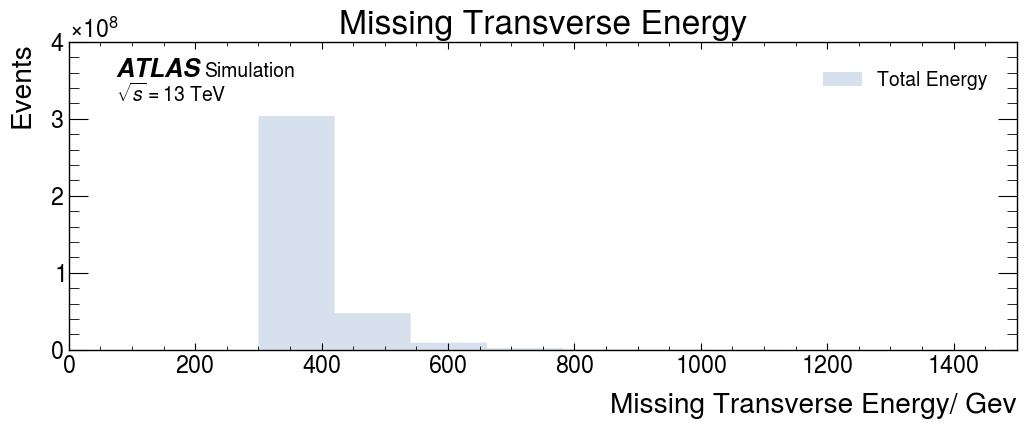

In [12]:
hist,bins=np.histogram(background['MET'],bins=1000,weights=background['combinedWeight'])
allData=background['MET'][:]
fig, ax = plt.subplots(figsize=(12, 4))

hep.histplot(
    hist,
    bins,
    histtype="fill",
    color="#B0C4DE",
    alpha=0.5,
    edgecolor="black",
    label=r"Total Energy",
    ax=ax,)


ax.set_xlabel("Missing Transverse Energy/ Gev")
ax.set_ylabel("Events")
ax.set_title("Missing Transverse Energy")
ax.legend()
ax.set_xlim(0,1500)
hep.atlas.label(label=None)
fig.show()


The data was then seperated into event type and a stacked histogram created to display how th etotal energy was made up of the different events. This was done by splitting it into the sections shown in the merge_smaple feature

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1161714598.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


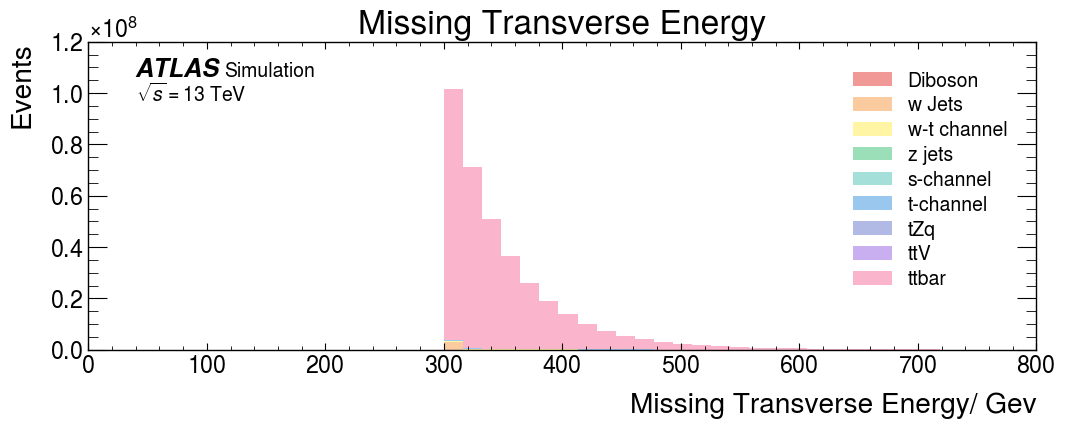

In [13]:

diboson=background.query("merge_sample=='Diboson'")['MET']
dibosonWeights=background.query("merge_sample=='Diboson'")['combinedWeight']
dbhist,dbbins=np.histogram(diboson,bins=100,weights=dibosonWeights)

wjets=background.query("merge_sample=='Wjets'")['MET']
wjetsWeights=background.query("merge_sample=='Wjets'")['combinedWeight']
wjhist,wjbins=np.histogram(wjets,bins=100,weights=wjetsWeights)

wtchannel=background.query("merge_sample=='Wt-channel'")['MET']
wtWeights=background.query("merge_sample=='Wt-channel'")['combinedWeight']
wthist,wtbins=np.histogram(wtchannel,bins=100,weights=wtWeights)

zjets=background.query("merge_sample=='Z jets'")['MET']
zWeights=background.query("merge_sample=='Z jets'")['combinedWeight']
zhist,zbins=np.histogram(zjets,bins=100,weights=zWeights)

schannel=background.query("merge_sample=='s-channel'")['MET']
sWeights=background.query("merge_sample=='s-channel'")['combinedWeight']
shist,sbins=np.histogram(schannel,bins=100,weights=sWeights)

tchannel=background.query("merge_sample=='t-channel'")['MET']
tWeights=background.query("merge_sample=='t-channel'")['combinedWeight']
thist,tbins=np.histogram(tchannel,bins=100,weights=tWeights)

tZq=background.query("merge_sample=='tZq'")['MET']
tZqWeights=background.query("merge_sample=='tZq'")['combinedWeight']
tZqhist,tZqbins=np.histogram(tZq,bins=100,weights=tZqWeights)

ttV=background.query("merge_sample=='ttV'")['MET']
ttVWeights=background.query("merge_sample=='ttV'")['combinedWeight']
ttVhist,ttVbins=np.histogram(ttV,bins=100,weights=ttVWeights)

ttbar=background.query("merge_sample=='ttbar'")['MET']
ttbarWeights=background.query("merge_sample=='ttbar'")['combinedWeight']
ttbhist,ttbbins=np.histogram(ttbar,bins=100,weights=ttbarWeights)



fig, ax = plt.subplots(figsize=(12, 4))

hep.histplot( 
    [dbhist,wjhist,wthist,zhist,shist,thist,tZqhist,ttVhist,ttbhist],
    stack= True,
    bins=wtbins,
    histtype="fill",
    color=['#e3342f','#f6993f','#ffed4a','#38c172','#4dc0b5','#3490dc','#6574cd','#9561e2','#f66d9b'],
    alpha=0.5,
    label=[
        r"Diboson",
        r"w Jets",
        r"w-t channel",
        r"z jets",
        r"s-channel",
        r"t-channel",
        r"tZq",
        r"ttV",
        r"ttbar",
    ],
    ax=ax
)



ax.set_xlabel("Missing Transverse Energy/ Gev")
ax.set_ylabel("Events")
ax.set_title("Missing Transverse Energy")
ax.legend(loc='upper right')
ax.set_xlim(0,800)
hep.atlas.label(label=None)
fig.show()

#print(dbhist,wjhist,wthist,zhist,shist,thist,tZqhist,ttVhist,ttbhist)

### Plotting the signal data

The missing transverse energy of the signal was the plotted. Thsi did not hav eto be pslit as we do not know the osurce of these events so they can be treated as the same

In [14]:
np.unique(signal['merge_sample'])

array(['Res mMed4000 mX1 lb0p2 yp0p4'], dtype=object)

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/3478230789.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


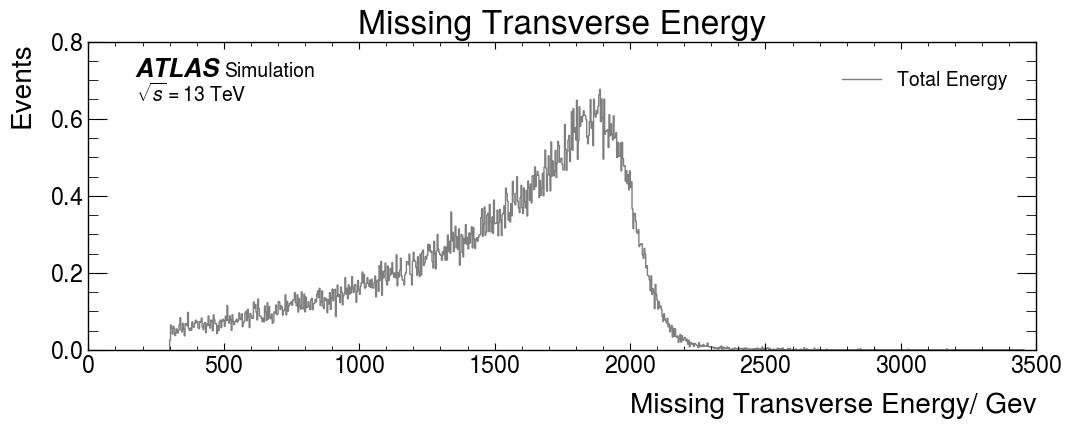

In [15]:
hist,bins=np.histogram(signal['MET'],bins=1000,weights=signal['combinedWeight'])
allData=background['MET'][:]
fig, ax = plt.subplots(figsize=(12, 4))


hep.histplot(
    hist,
    bins,
    #histtype="",
    color="#B0C4DE",
    alpha=0.5,
    edgecolor="black",
    label=r"Total Energy",
    ax=ax,)


ax.set_xlabel("Missing Transverse Energy/ Gev")
ax.set_ylabel("Events")
ax.set_title("Missing Transverse Energy")
ax.legend()
#ax.set_xlim(0,1500)
hep.atlas.label(label=None)
fig.show()


### Combining Background and Signal

The missing transverse energy of the isgnal was then plotted on the same graph as the signal data to allow for direct comparison. A zoomed in version also allows the make up of the transverse energy to be seen more clearly.

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1031764026.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


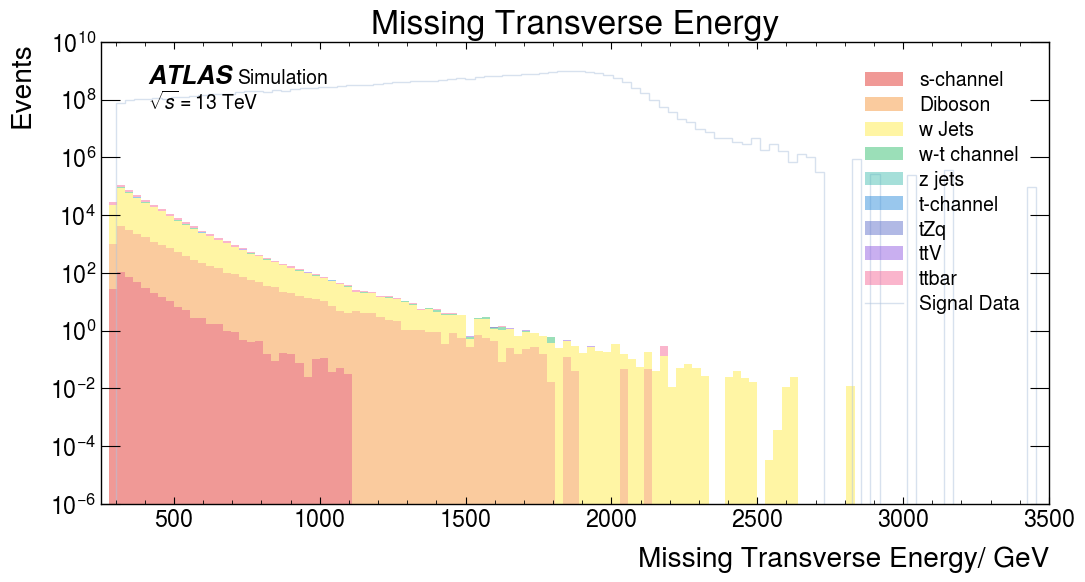

In [16]:
binedges=np.linspace(250,3000,100)

#Defining histogram data for background events
diboson=background.query("merge_sample=='Diboson'")['MET']
dibosonWeights=background.query("merge_sample=='Diboson'")['normalisedCombinedWeight']
dbhist,dbbins=np.histogram(diboson,bins=binedges,weights=dibosonWeights)

wjets=background.query("merge_sample=='Wjets'")['MET']
wjetsWeights=background.query("merge_sample=='Wjets'")['normalisedCombinedWeight']
wjhist,wjbins=np.histogram(wjets,bins=binedges,weights=wjetsWeights)

wtchannel=background.query("merge_sample=='Wt-channel'")['MET']
wtWeights=background.query("merge_sample=='Wt-channel'")['normalisedCombinedWeight']
wthist,wtbins=np.histogram(wtchannel,bins=binedges,weights=wtWeights)

zjets=background.query("merge_sample=='Z jets'")['MET']
zWeights=background.query("merge_sample=='Z jets'")['normalisedCombinedWeight']
zhist,zbins=np.histogram(zjets,bins=binedges,weights=zWeights)

schannel=background.query("merge_sample=='s-channel'")['MET']
sWeights=background.query("merge_sample=='s-channel'")['normalisedCombinedWeight']
shist,sbins=np.histogram(schannel,bins=binedges,weights=sWeights)

tchannel=background.query("merge_sample=='t-channel'")['MET']
tWeights=background.query("merge_sample=='t-channel'")['normalisedCombinedWeight']
thist,tbins=np.histogram(tchannel,bins=binedges,weights=tWeights)

tZq=background.query("merge_sample=='tZq'")['MET']
tZqWeights=background.query("merge_sample=='tZq'")['normalisedCombinedWeight']
tZqhist,tZqbins=np.histogram(tZq,bins=binedges,weights=tZqWeights)

ttV=background.query("merge_sample=='ttV'")['MET']
ttVWeights=background.query("merge_sample=='ttV'")['normalisedCombinedWeight']
ttVhist,ttVbins=np.histogram(ttV,bins=binedges,weights=ttVWeights)

ttbar=background.query("merge_sample=='ttbar'")['MET']
ttbarWeights=background.query("merge_sample=='ttbar'")['normalisedCombinedWeight']
ttbhist,ttbbins=np.histogram(ttbar,bins=binedges,weights=ttbarWeights)

#Defining histogram data for signal events 
signalData=signal['MET']
signalWeights=signal['normalisedCombinedWeight']
sighist,sigbins=np.histogram(signalData,bins=100,weights=signalWeights)

#Plotting histograms
fig, ax = plt.subplots(figsize=(12, 6))
hep.histplot( 
    [shist,dbhist,wjhist,wthist,zhist,thist,tZqhist,ttVhist,ttbhist],
    stack= True,
    bins=binedges,
    histtype="fill",
    color=['#e3342f','#f6993f','#ffed4a','#38c172','#4dc0b5','#3490dc','#6574cd','#9561e2','#f66d9b'],
    alpha=0.5,
    label=[
        r"s-channel",
        r"Diboson",
        r"w Jets",
        r"w-t channel",
        r"z jets",
        r"t-channel",
        r"tZq",
        r"ttV",
        r"ttbar",
    ],
    ax=ax
)
hep.histplot(
    sighist*(10**8),
    bins=sigbins,
    color=["#B0C4DE"],
    alpha=0.5,
    label=["Signal Data"],
    ax=ax
)
ax.set_xlabel("Missing Transverse Energy/ GeV")
ax.set_ylabel("Events")
ax.set_title("Missing Transverse Energy")
ax.legend(loc='upper right')
ax.set_xlim(250,3500)
ax.set_yscale("log")
hep.atlas.label(label=None)
fig.show()




### Plotting the other variables

In [98]:
def histogram(data,binEdges,wgt):
    '''
    A function to find the frequency of each bin in the histogram of a given data set
    Takes the data to be binned, the position of the bin edges and the weights of the data
    Returns an array of the frequency of each bin in the histogram
    '''
    hist,Bins=np.histogram(data,bins=binEdges,weights=wgt)
    return hist

In [99]:
def binwidths(binNumber,featureData):
    '''
    Afunction to calculate positions of bin edges based on the data in questiion
    Takes number if bins and the data of the variable you are looking at (feature Data)
    Returns an array with positions of binedges for histogram
    '''
    maximum=np.percentile(featureData,99.999)
    minimum=np.percentile(featureData,0.001)
    binedges=np.linspace(minimum,maximum,binNumber)
    return binedges

In [100]:
def loopTypes(featureData,binEdges,binNum):
    '''
    A function to find the hist data for each type of data in a dataset
    Takes one array which must include 'merge_sample', 'normalisedCombiendWeight' and the foinal column should be data to be fitted
    Takes an array with positions of bin edges
    Returns an array where each row has the frequuencies of each bin in the stack
    '''
    types= np.unique(featureData['merge_sample']) #lists the tpes of data in the datset
    histData=[np.zeros(binNum-1)] #an array of the same length as the number of frquencies to gewrt out, purely to be added to later
    #loops through each type of data in the datset
    a=0
    while a<len(types):
        sampleType=str(types[a])
        relevantRows=featureData.loc[featureData['merge_sample'] == sampleType] #new data set with only the data corresponding to the datatype which we are looking at 
        typeData=relevantRows.iloc[: , -1] #onl ythe variable in question of the datatype we are looking at 
        Weights=relevantRows['normalisedCombinedWeight'] #only teh weights of the data type we are looking at
        hist=np.array(histogram(typeData,binEdges,Weights)) #finds the frequencies of each bin using the histogram fuction defined above
        histData=np.append(histData,[hist],axis=0) #adds the frequencies to the array defined earlier
        a=a+1
    histData=np.delete(histData,0,axis=0) #removes that intial row of all zeroes which was purely to allow us to add the data later on
    return histData #returns an array where each row corresponds to the freuqency of each bin fo reach type

In [101]:
def plotGraph(variable,frequencies,binEdges,signalData,signalWeights):
    '''
    function to plot stacked histogram showing background data of different types and histogram
    Takes the variable which we are looking at (used for title etc)
    takes frequencies which is an array where each row contains the freuqencies for ecah type of data
    Take sposotion of bin edges
    Takes signal data nad weights
    '''
    fig, ax = plt.subplots(figsize=(12, 6))
    #plotting the background data:
    hep.histplot( 
        frequencies,
        stack= True,
        bins=binEdges,
        histtype="fill",
        color=['#e3342f','#f6993f','#ffed4a','#38c172','#4dc0b5','#3490dc','#6574cd','#9561e2','#f66d9b'],
        alpha=0.5,
                label=[
        r"Diboson",
        r"w Jets",
        r"w-t channel",
        r"z jets",
        r"s-channel",
        r"t-channel",
        r"tZq",
        r"ttV",
        r"ttbar",
    ],
        ax=ax)
    signalEdges=binwidths(20,signalData)
    sigHist=histogram(signalData,signalEdges,signalWeights)
    #plotting the signal data
    scalefactor=np.amax(frequencies)/np.amax(sigHist)
    hep.histplot(
        sigHist*(scalefactor),
        bins=signalEdges,
        color=['black'],
        alpha=0.5,
        label=["ResmMed4000mX1lb0p2yp0p4"],
        ax=ax
        )
    #displaying the graph 
    ax.set_xlabel(variable)
    ax.set_ylabel("Events")
    ax.set_title(variable)
    ax.legend(loc='upper right')
    ax.set_yscale("log")
    hep.atlas.label(label='Work in Progress')
    fig.savefig(variable+".pdf")
    fig.show()

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2495087144.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot 

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2495087144.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot 

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2495087144.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot 

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2495087144.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <=

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2495087144.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <=

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2495087144.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <=

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2495087144.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <=

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2495087144.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <=

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2495087144.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <=

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2495087144.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/2782313121.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <=

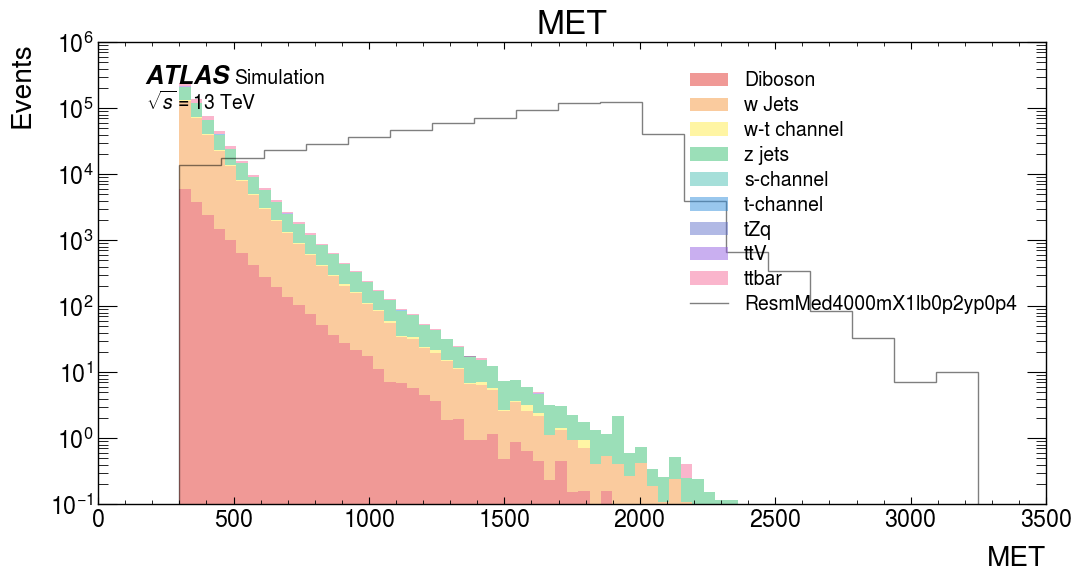

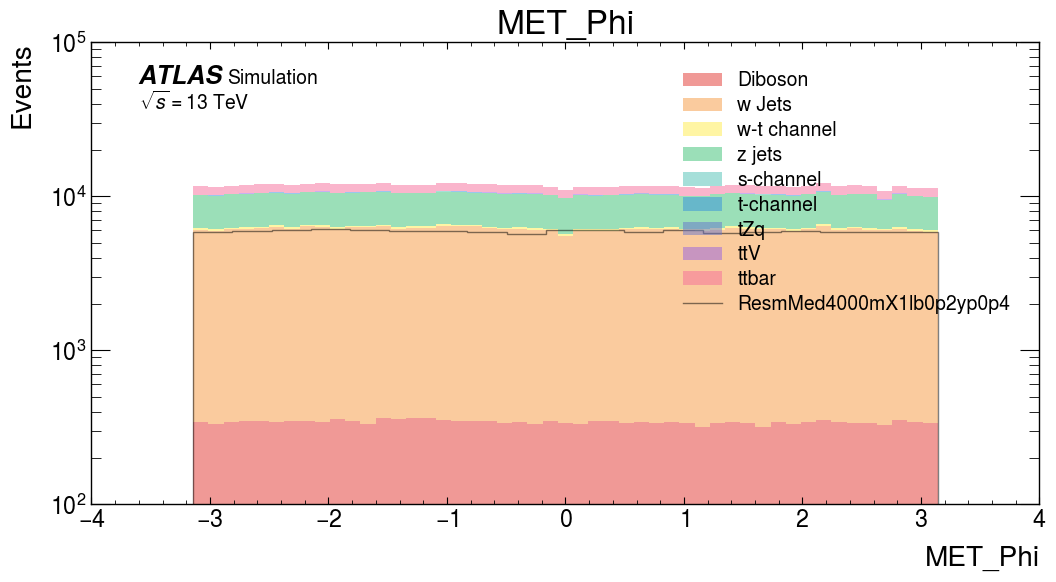

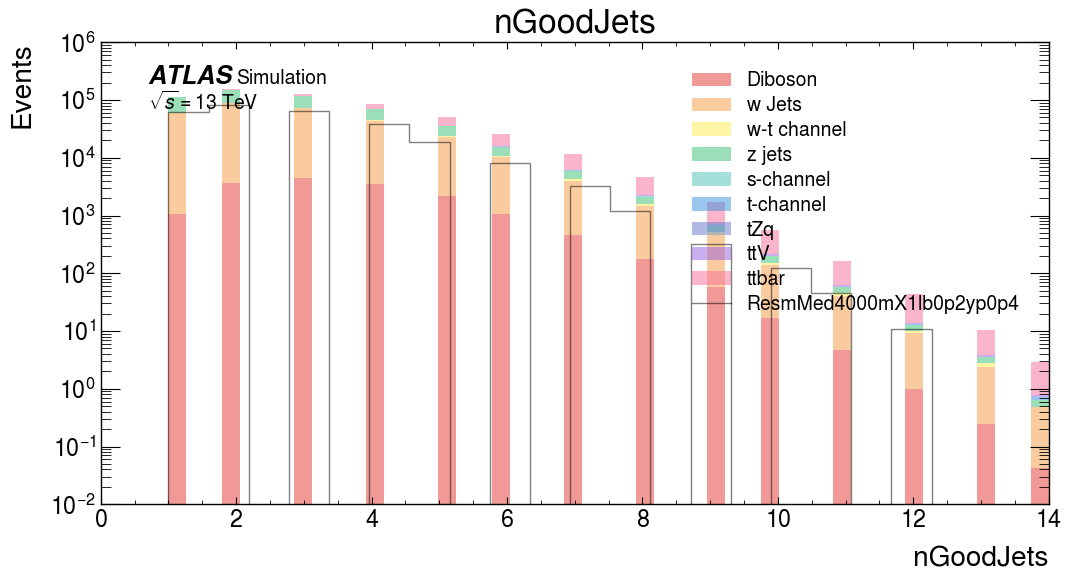

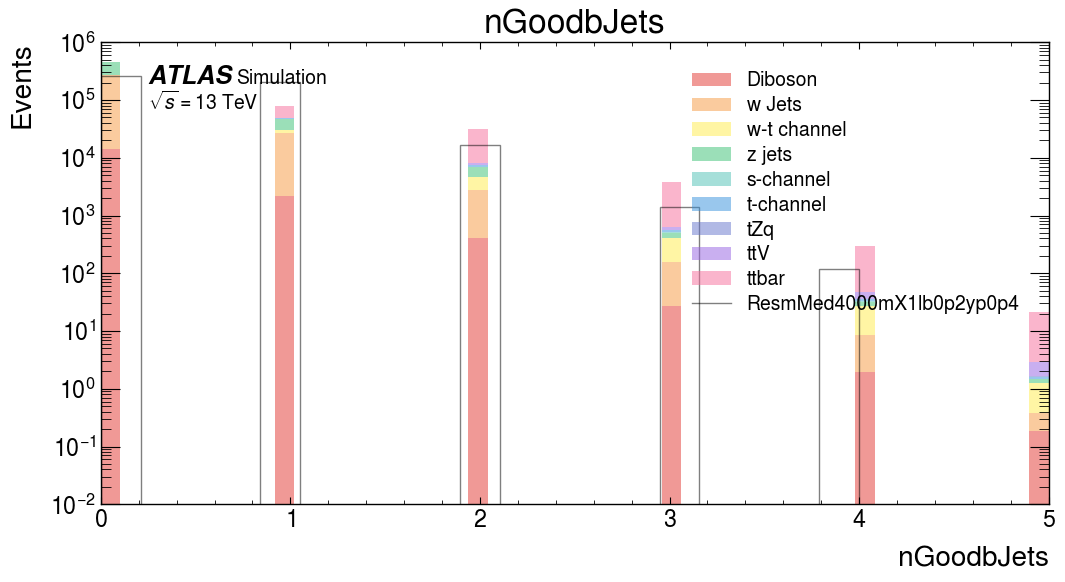

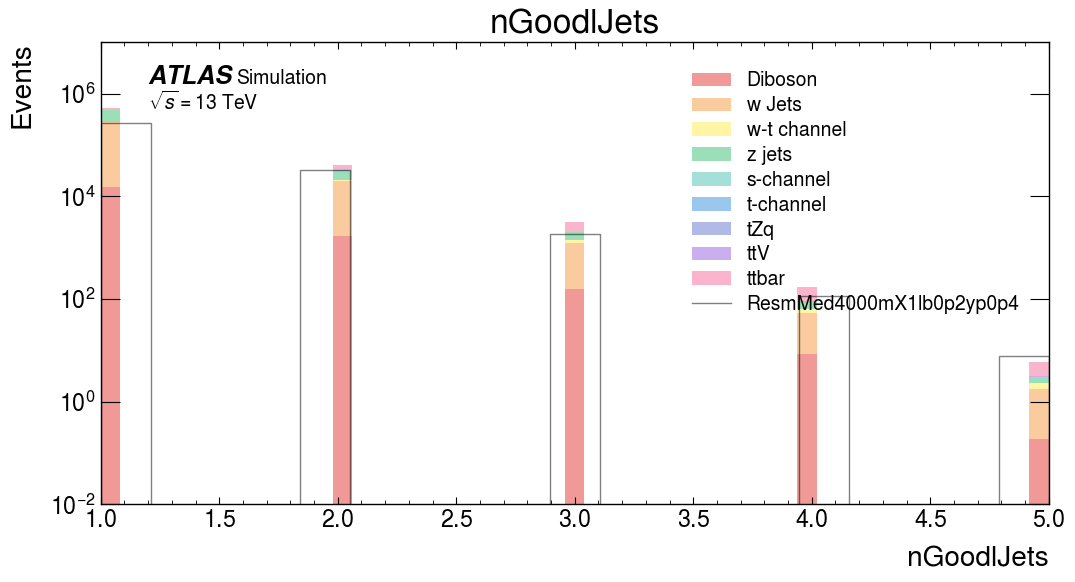

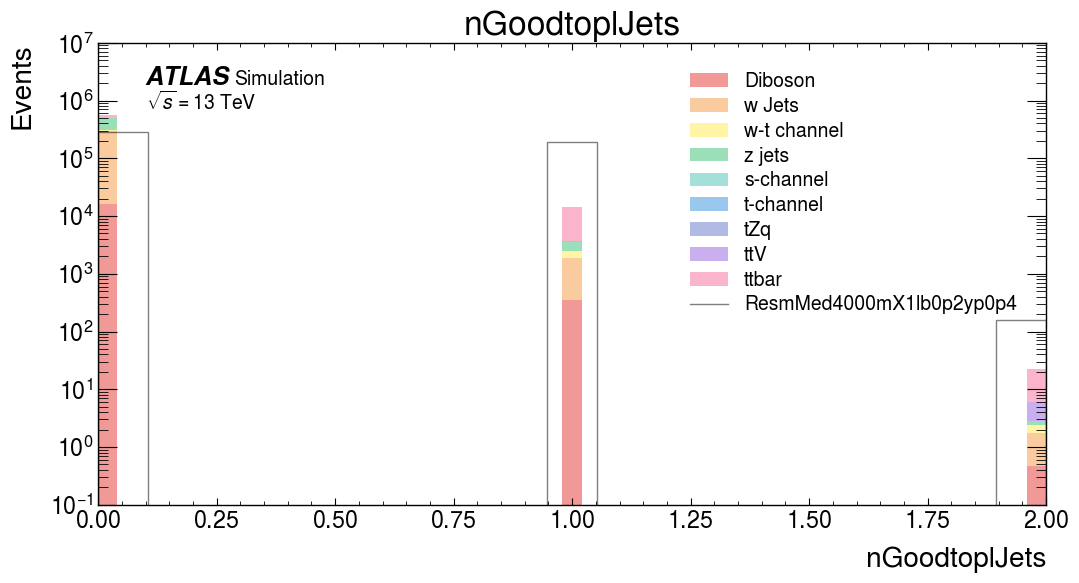

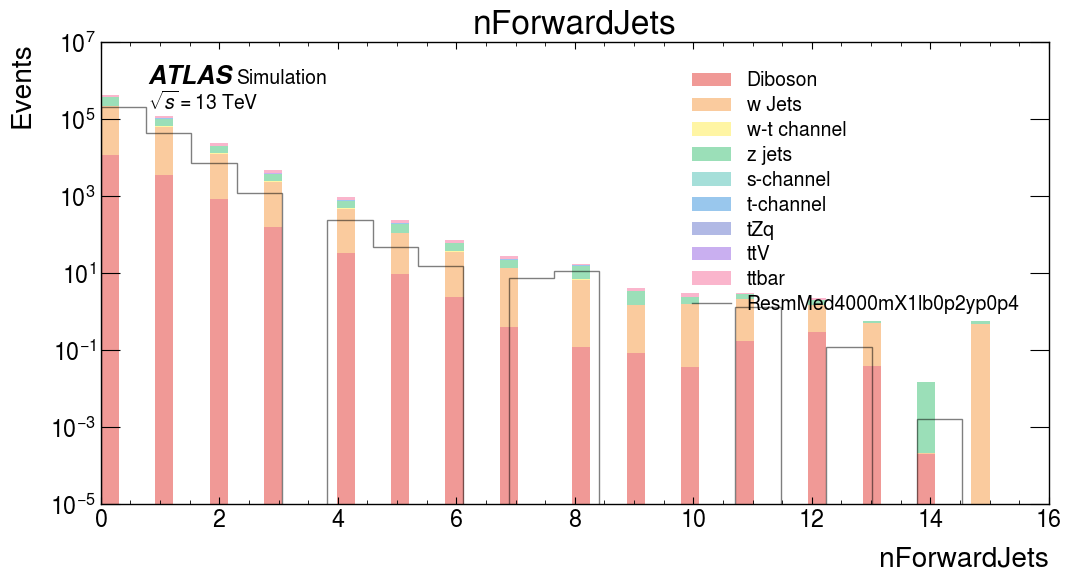

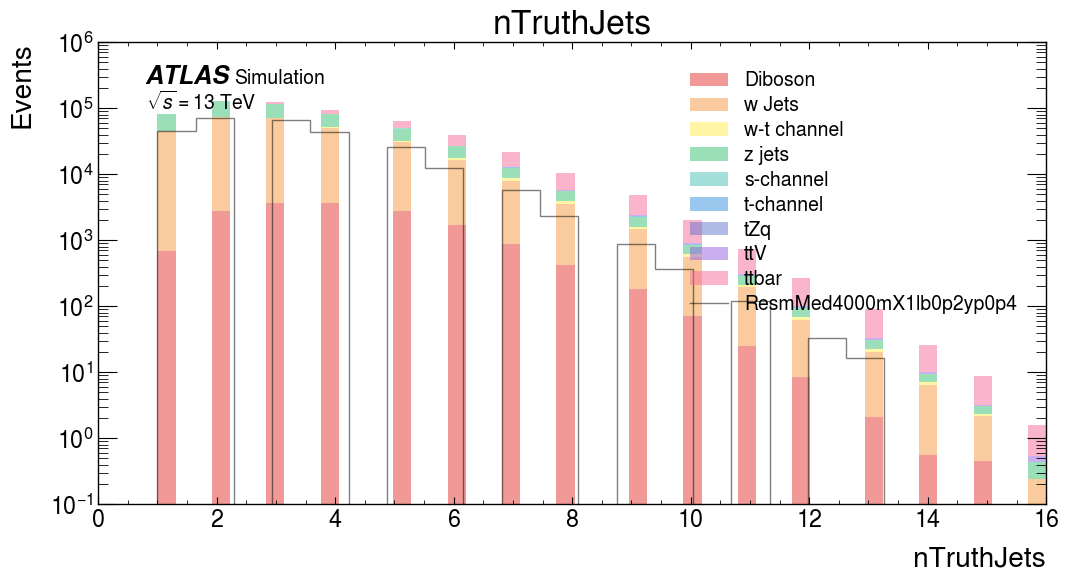

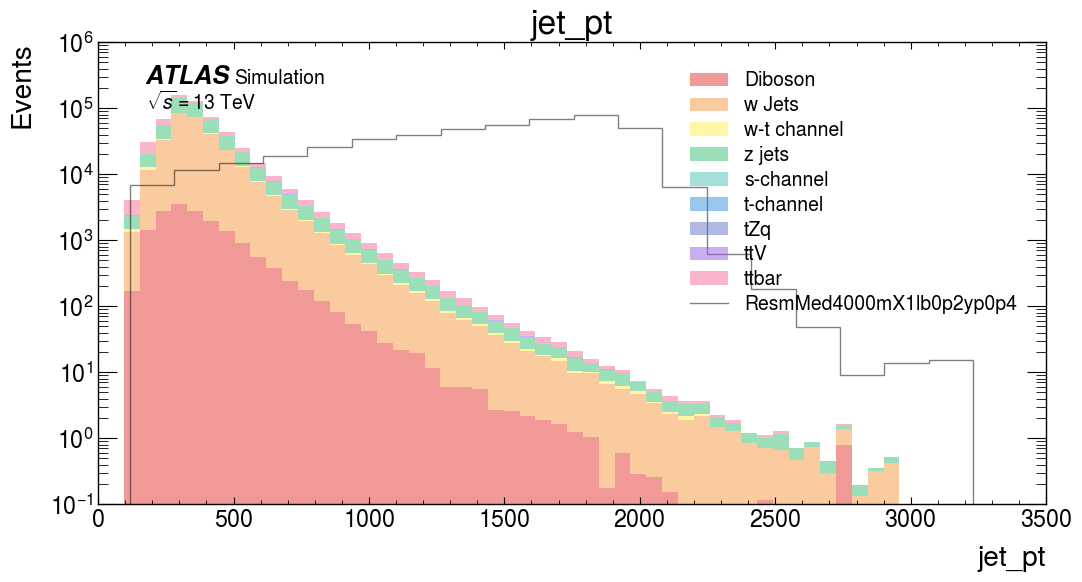

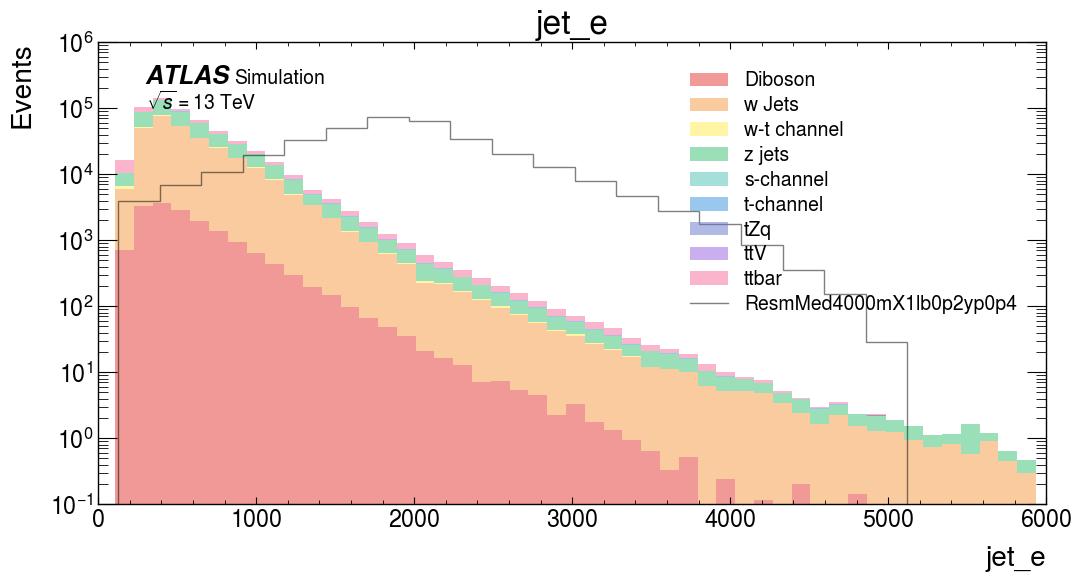

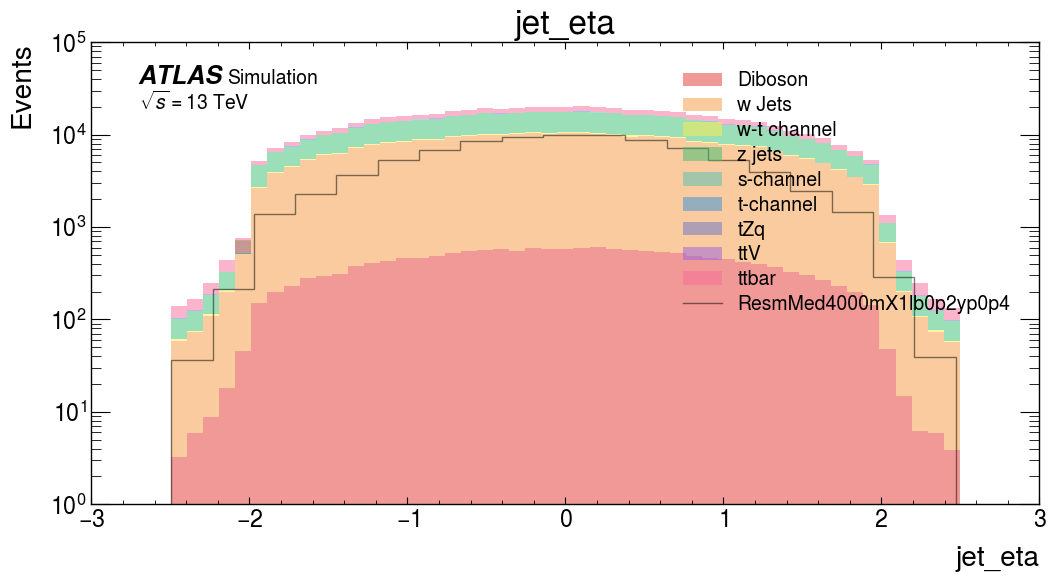

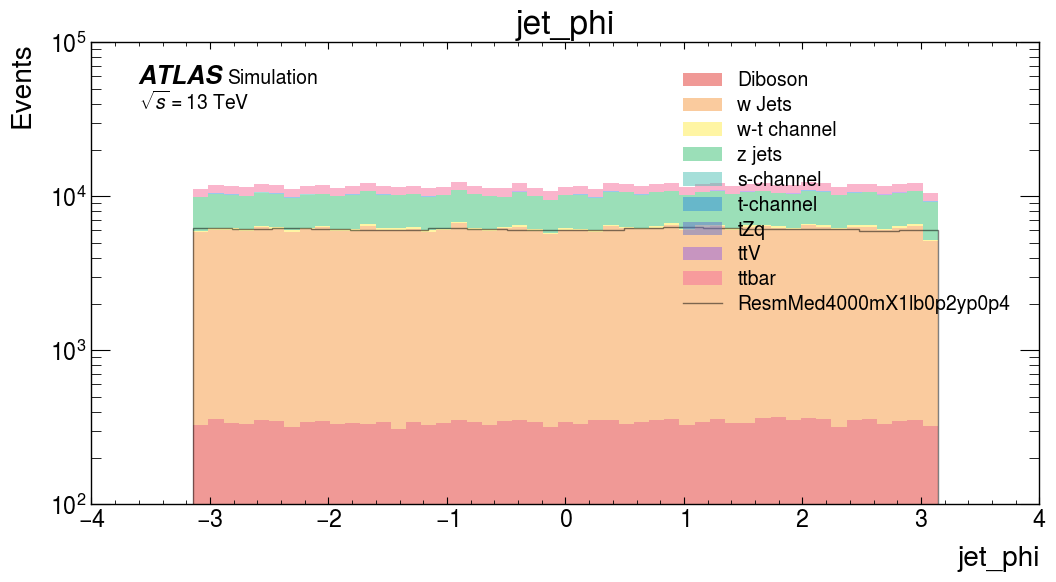

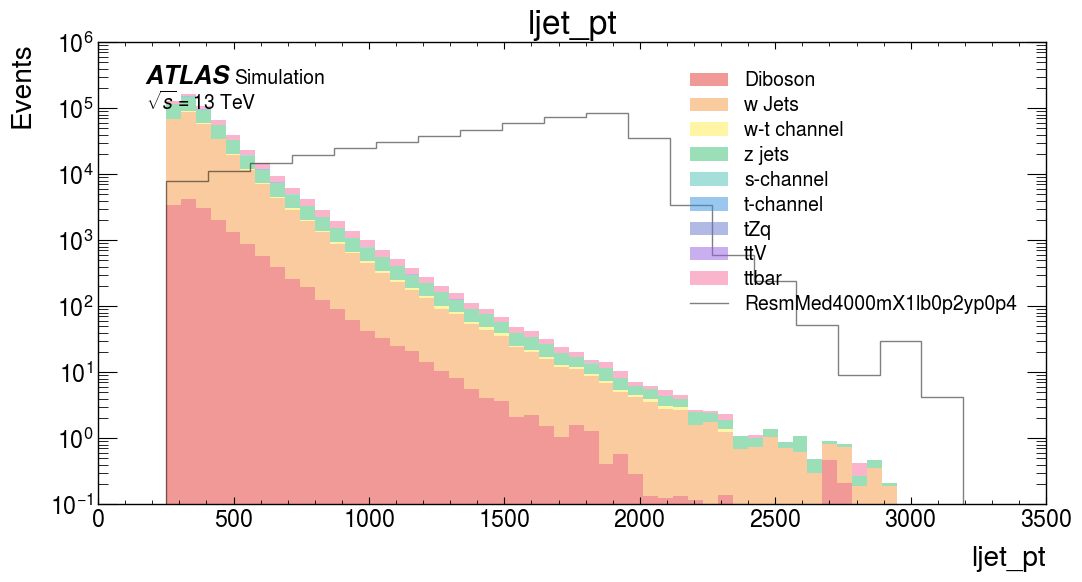

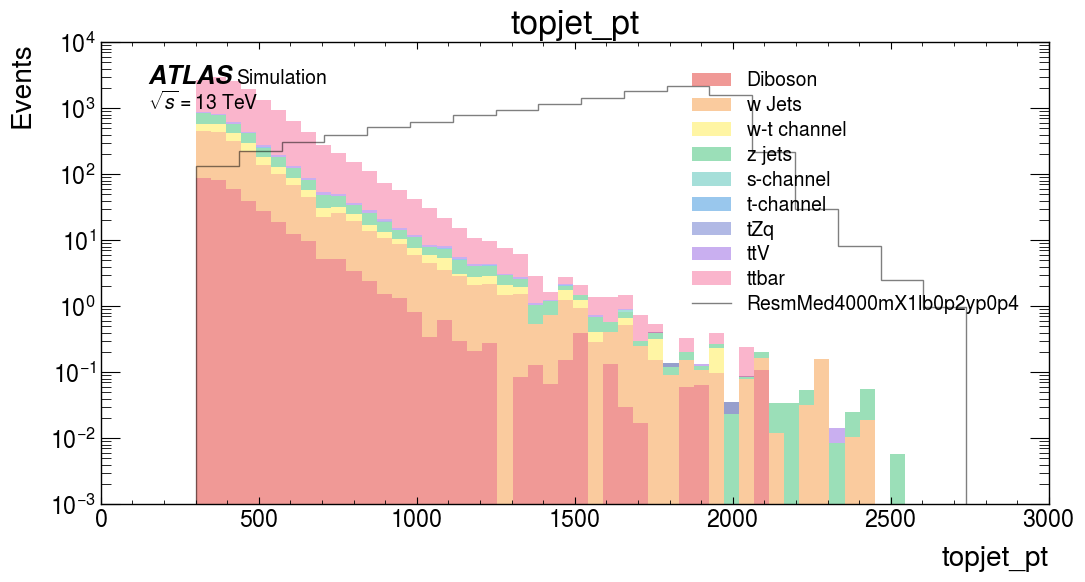

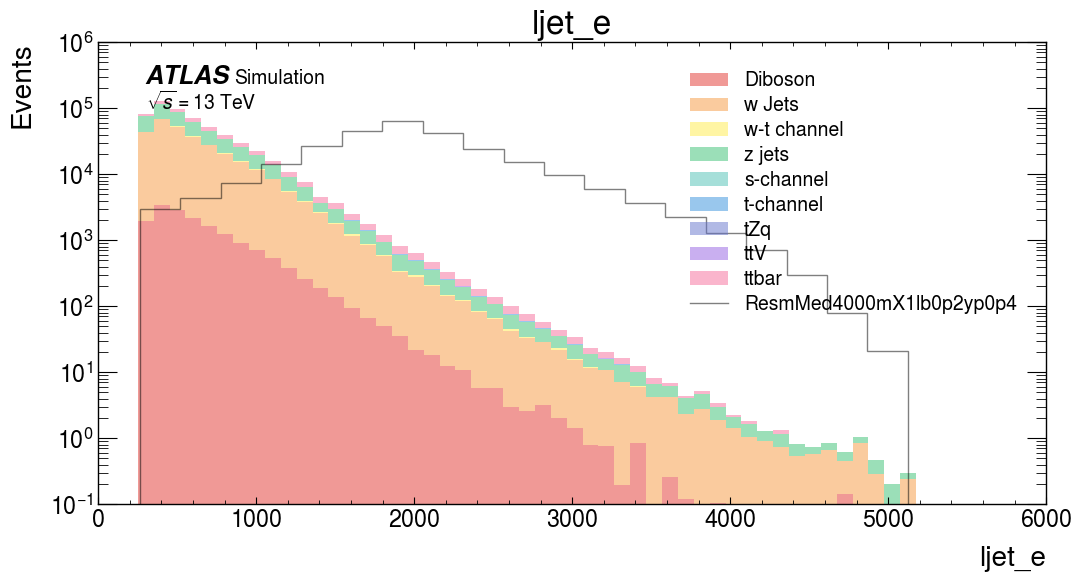

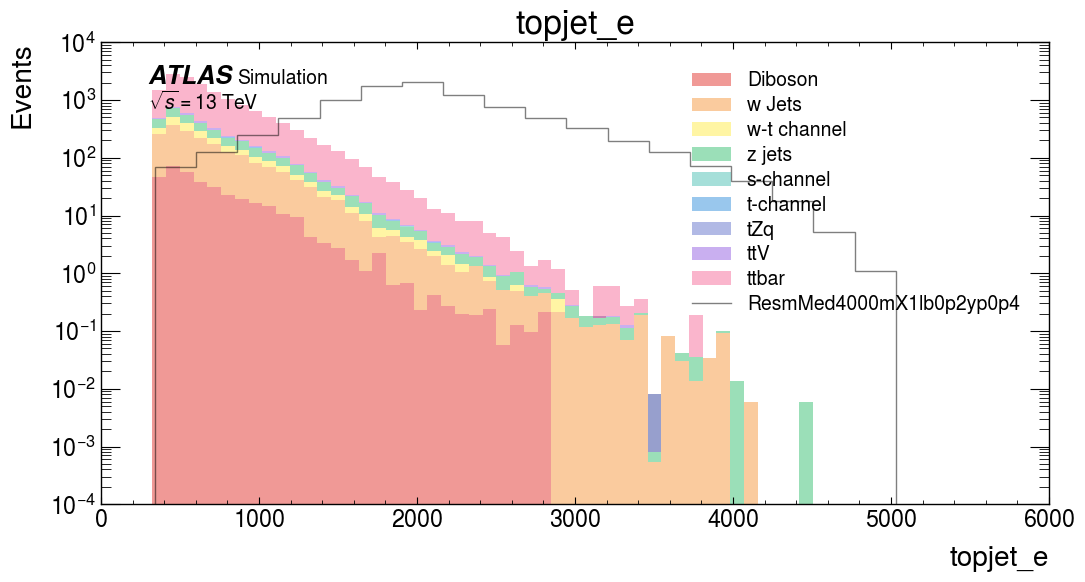

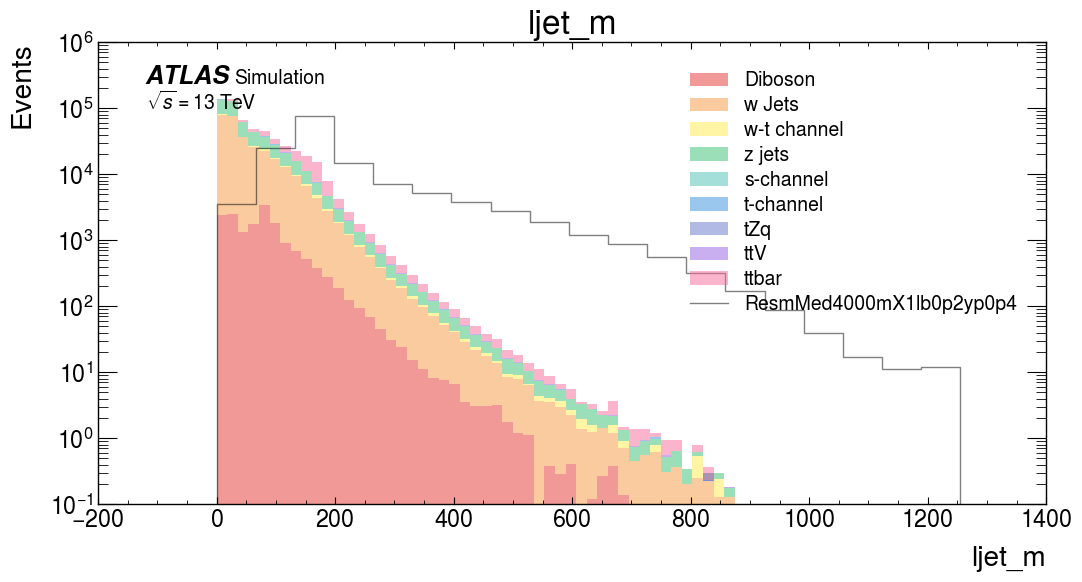

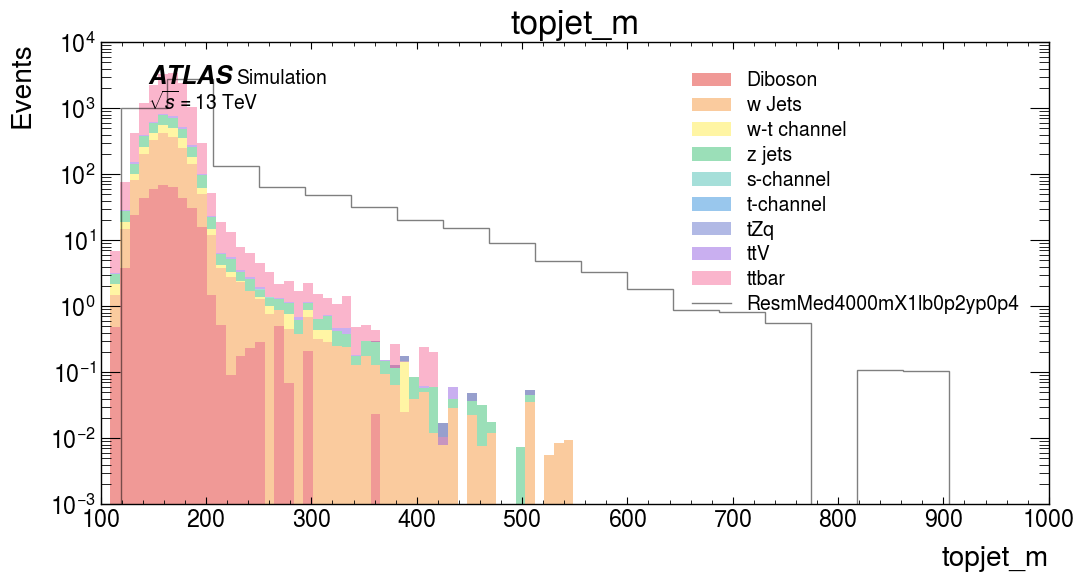

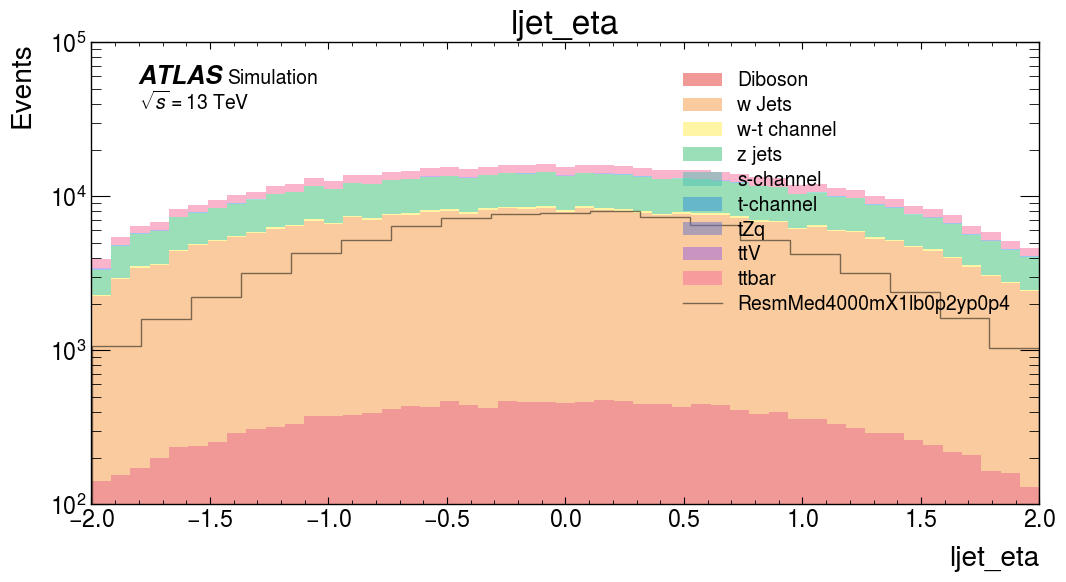

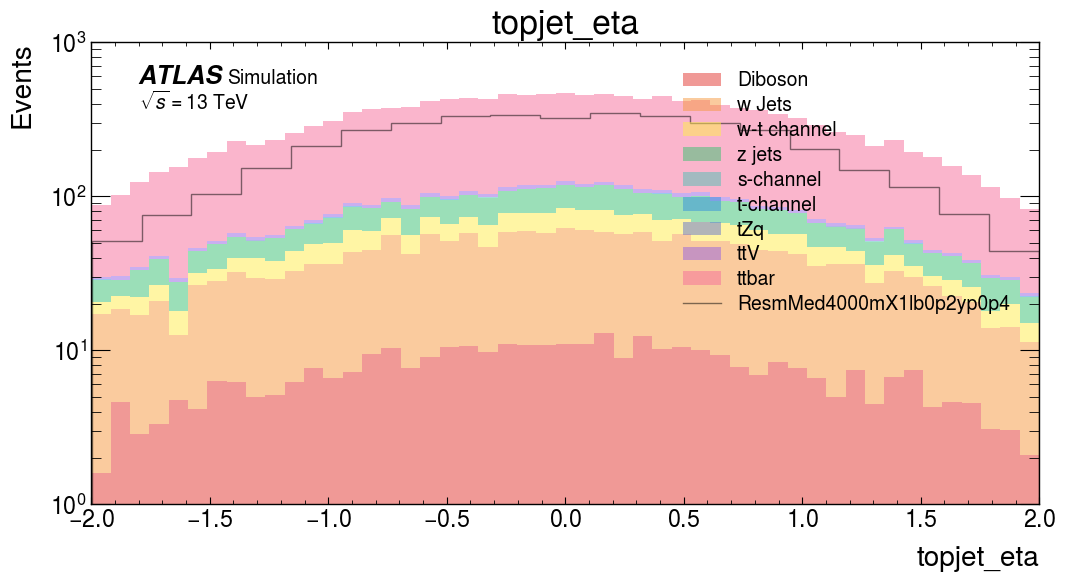

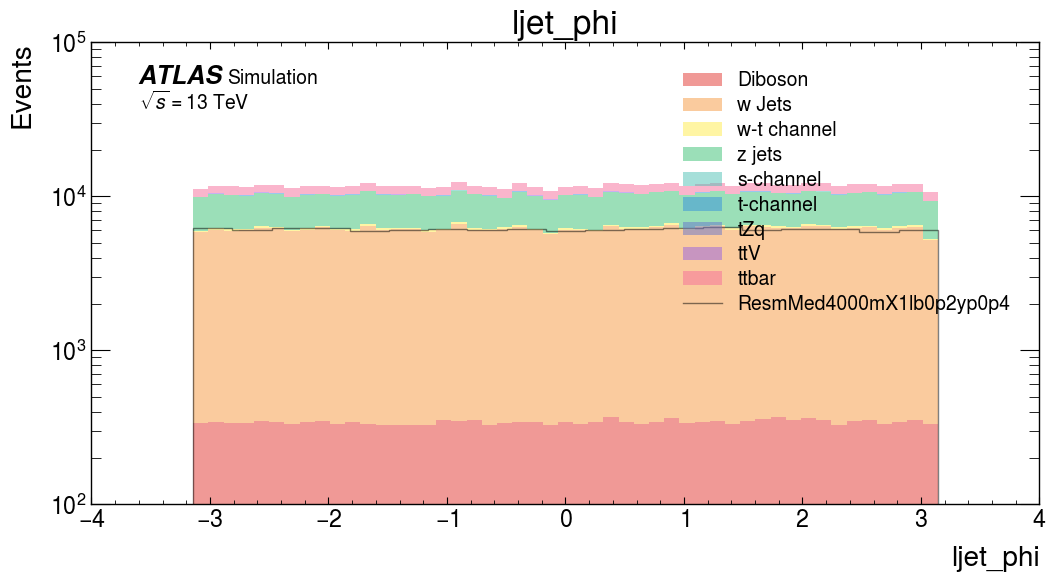

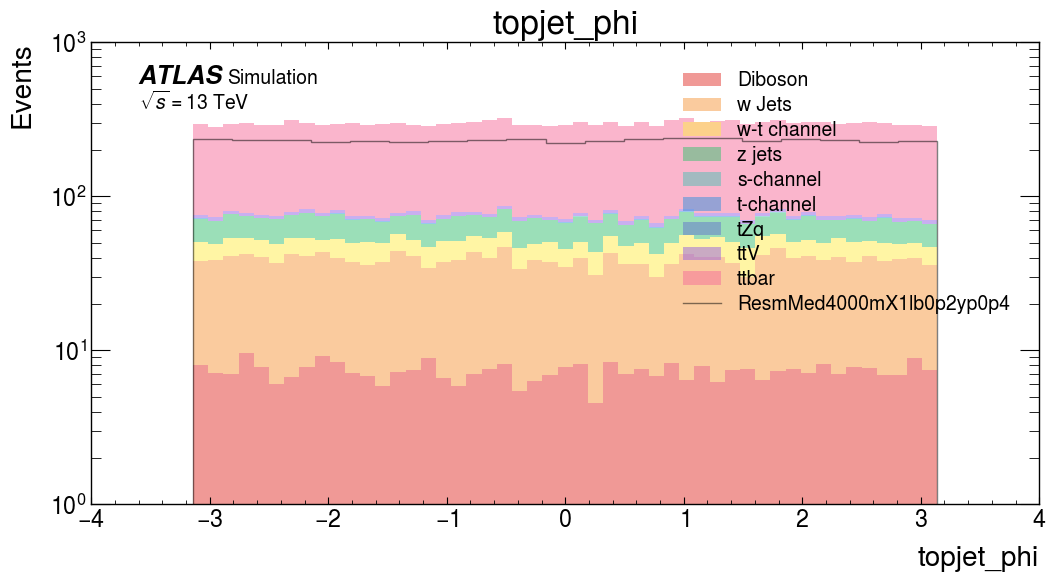

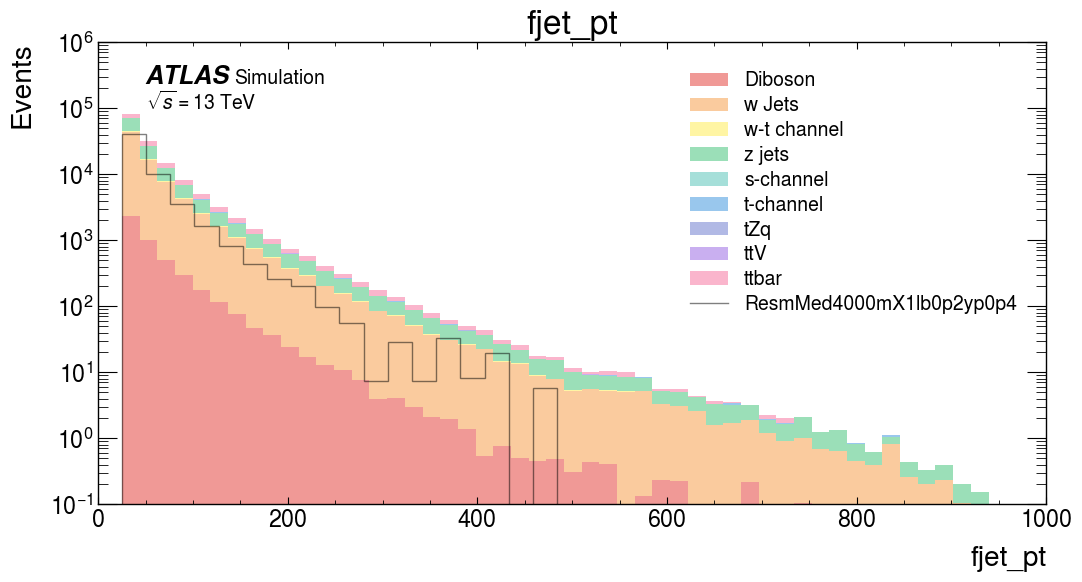

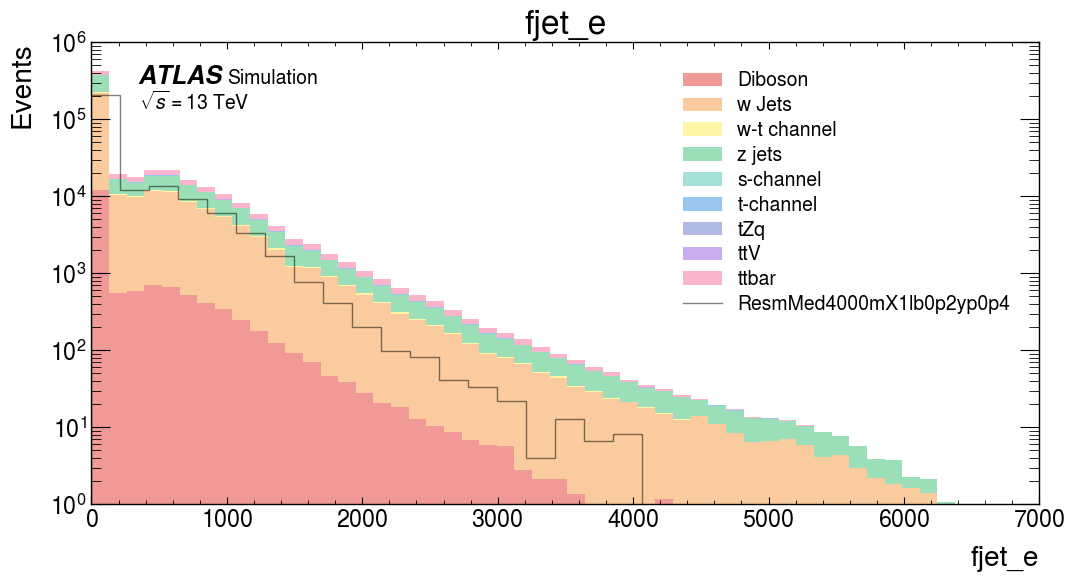

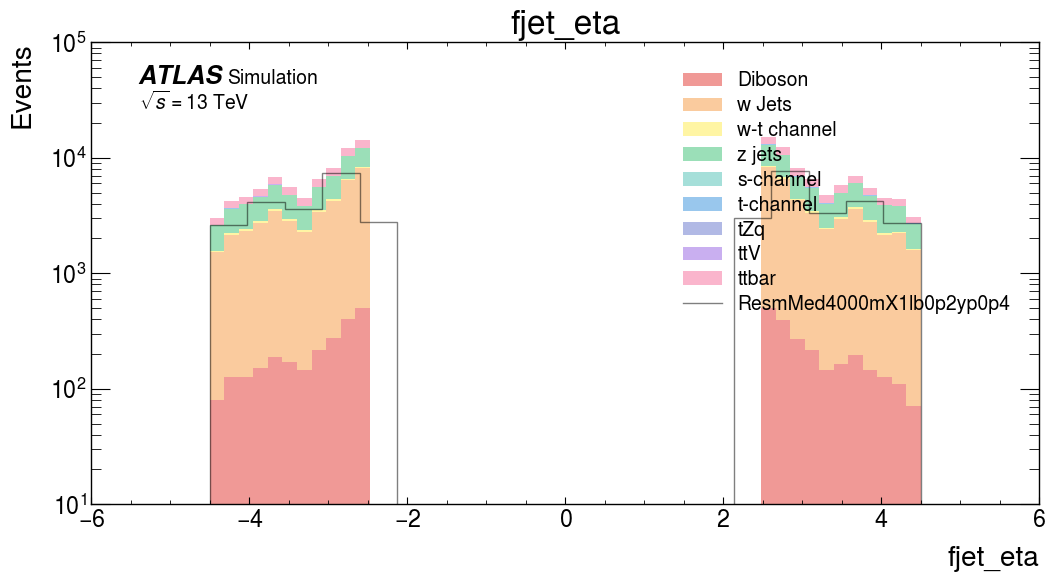

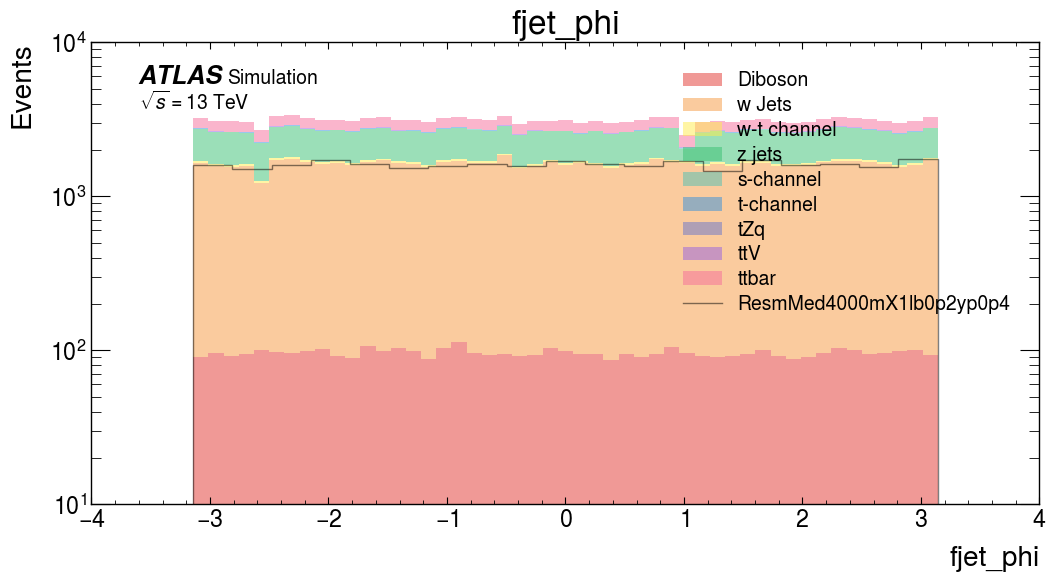

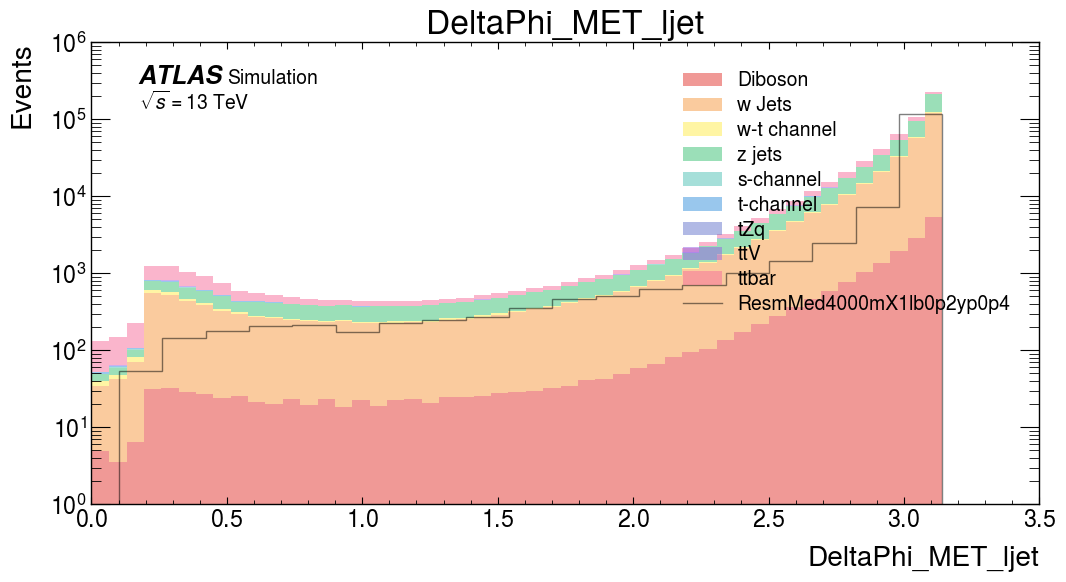

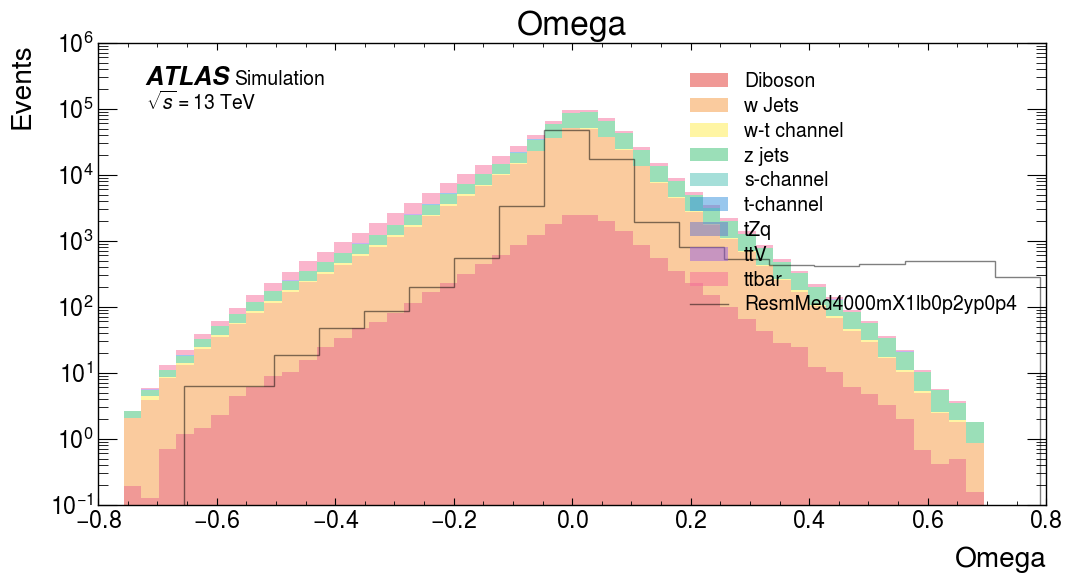

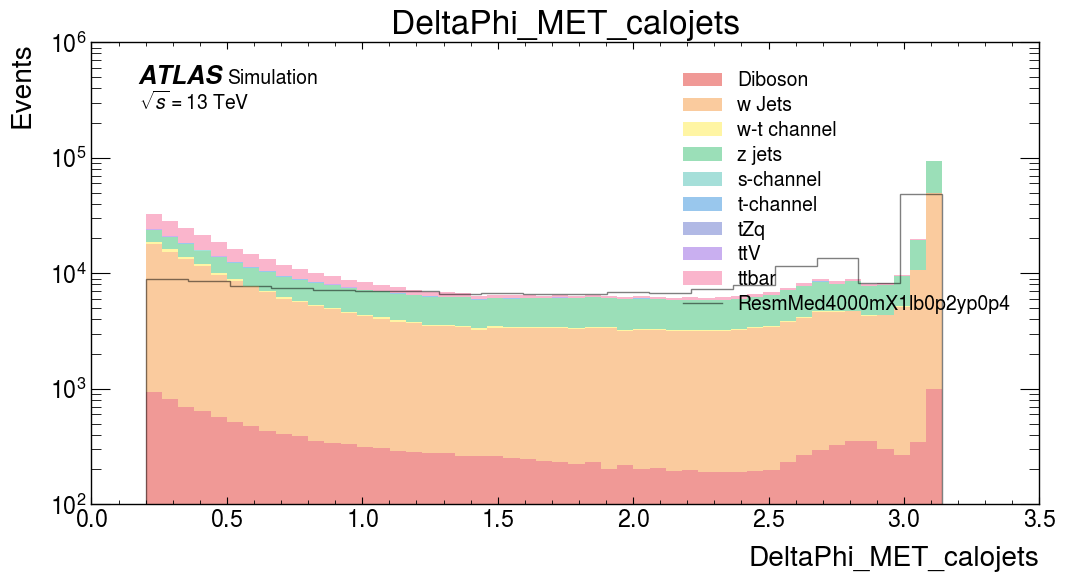

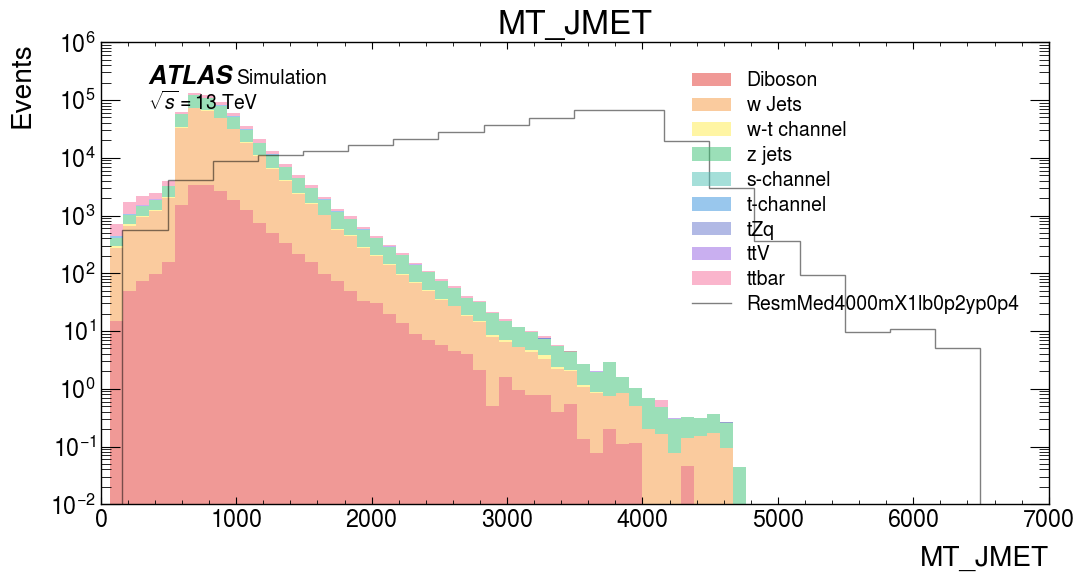

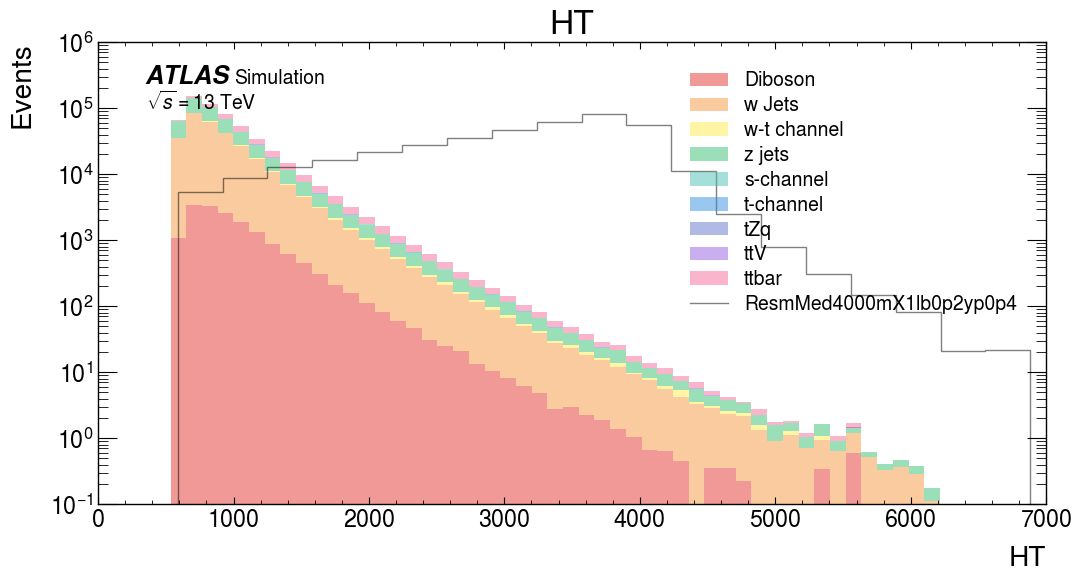

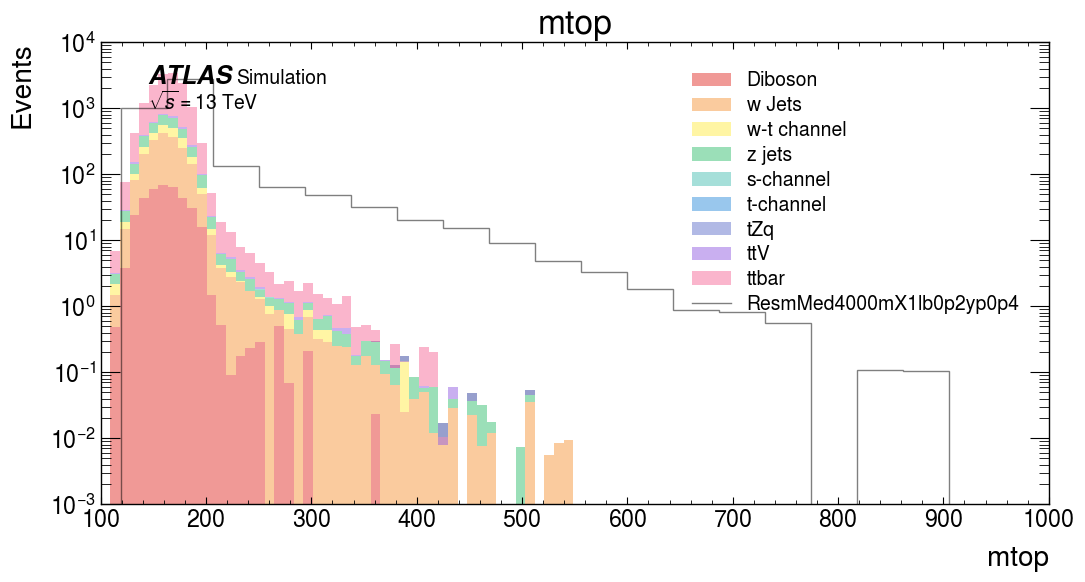

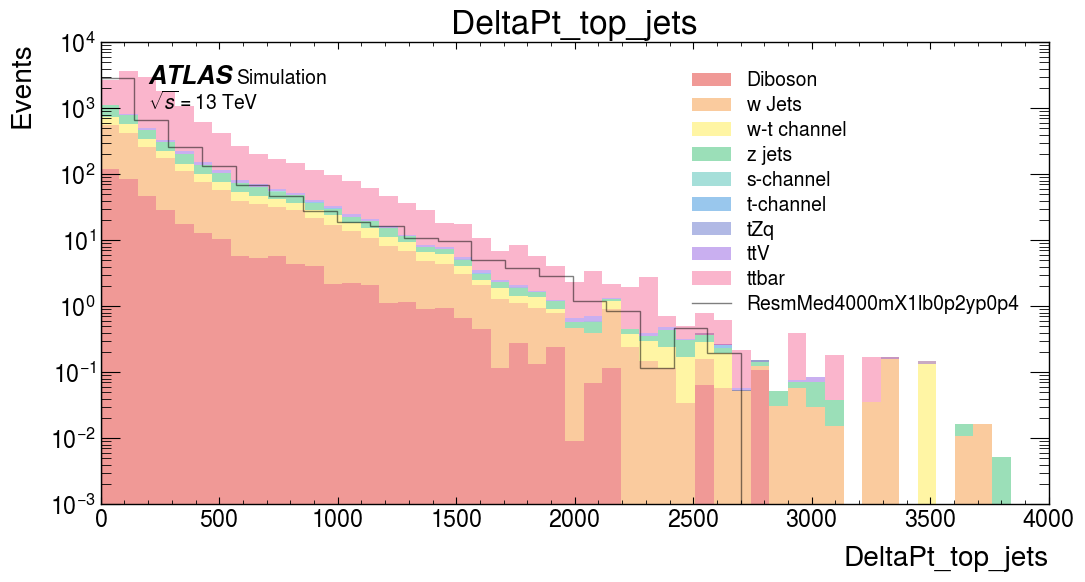

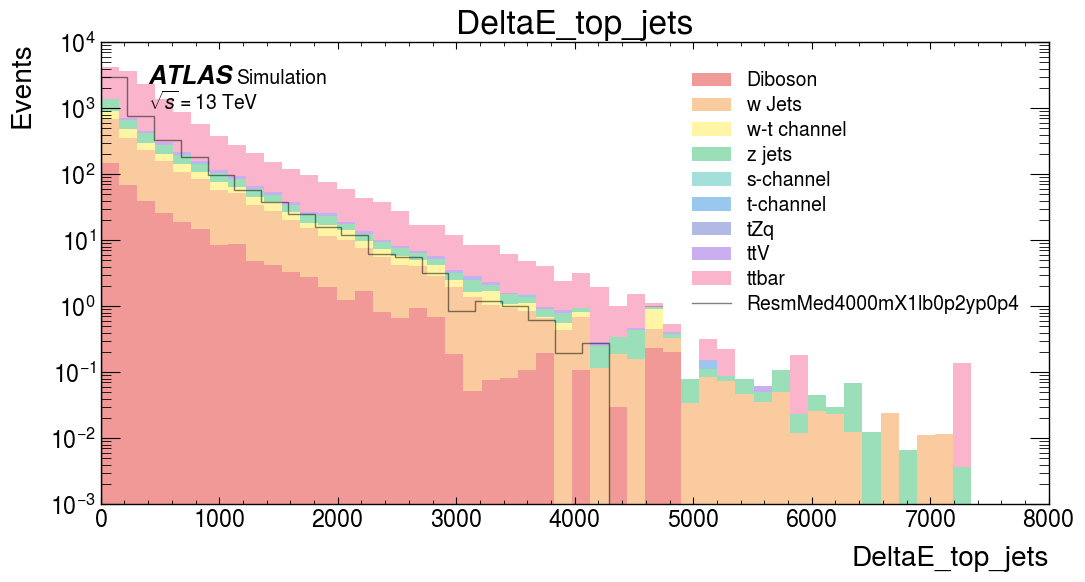

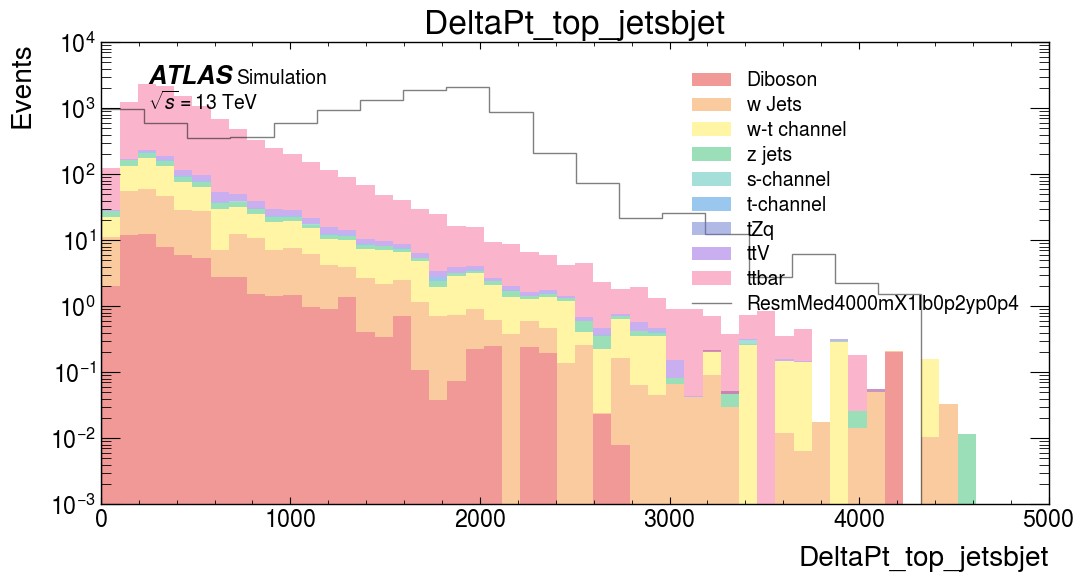

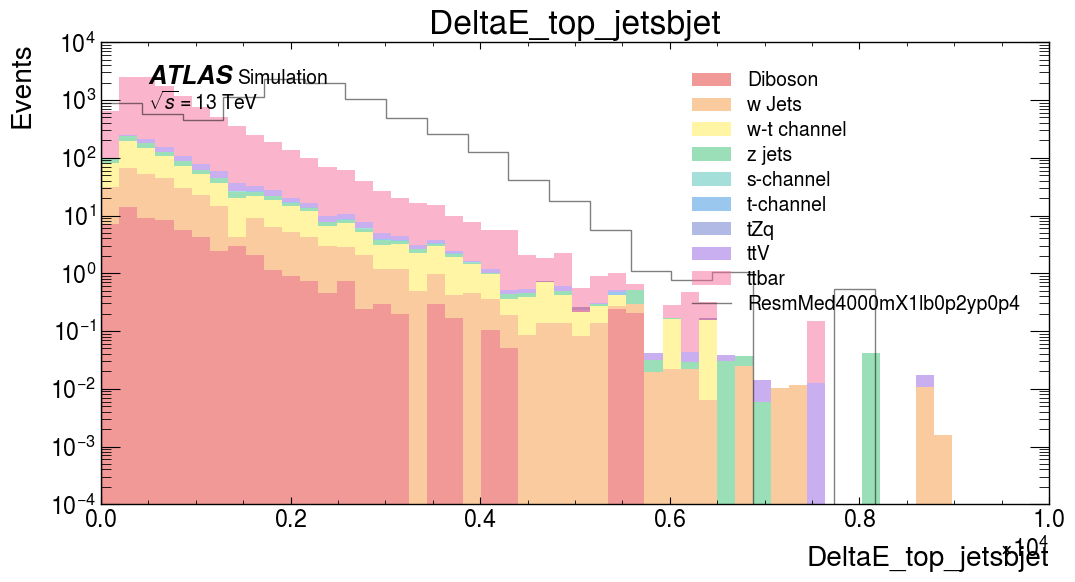

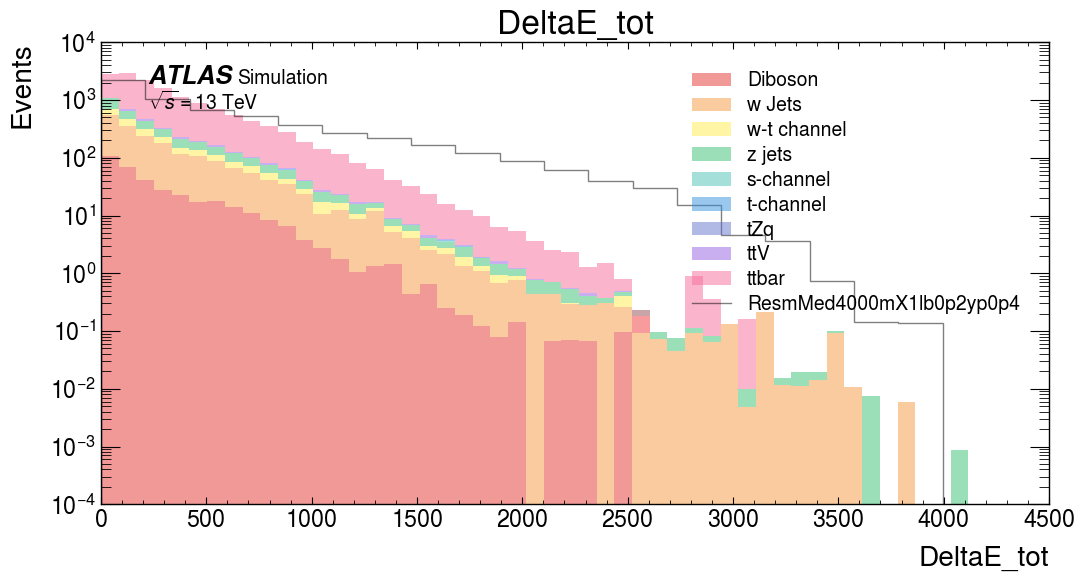

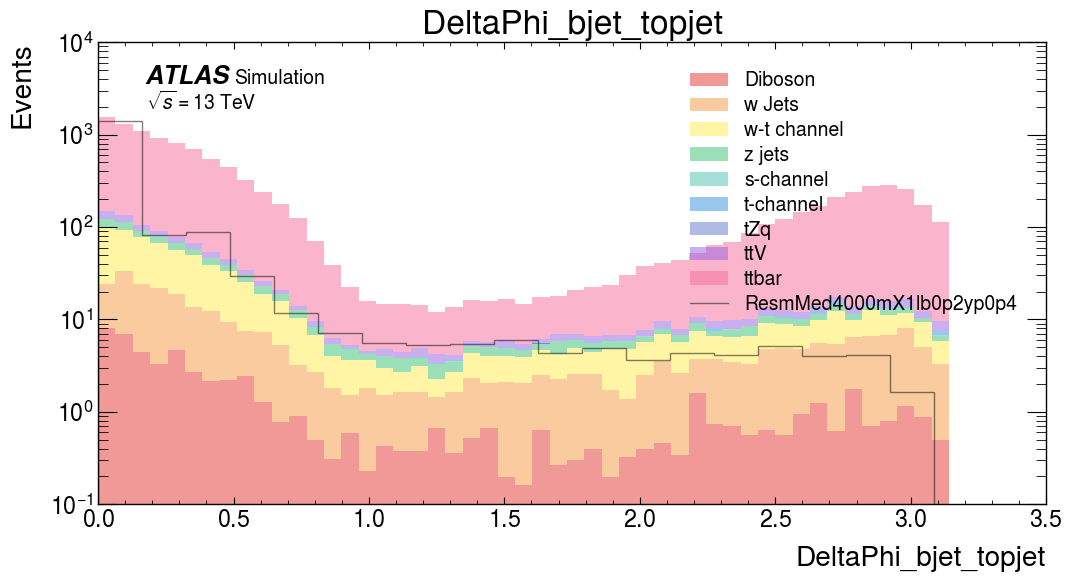

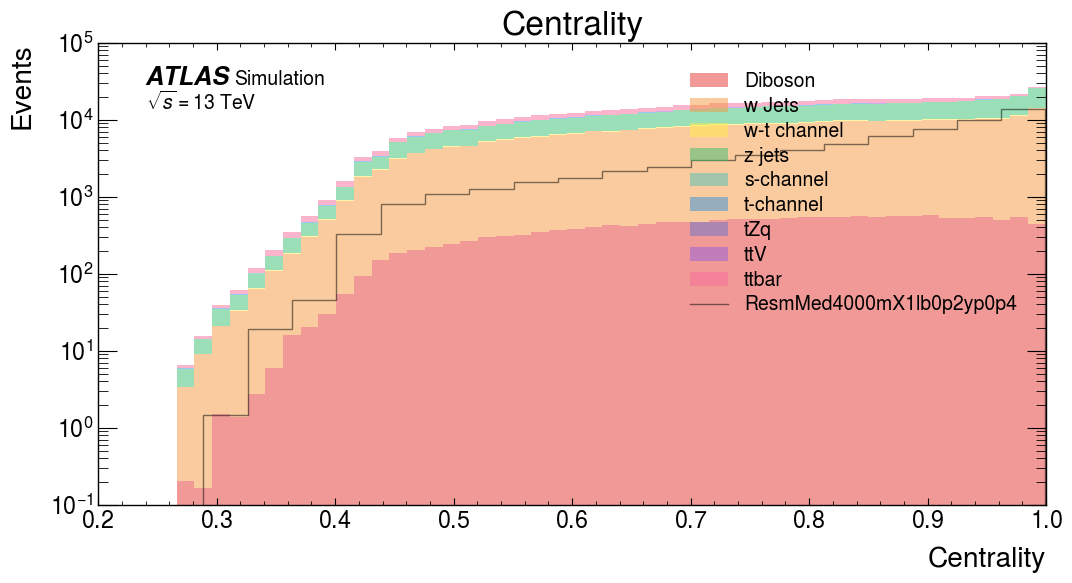

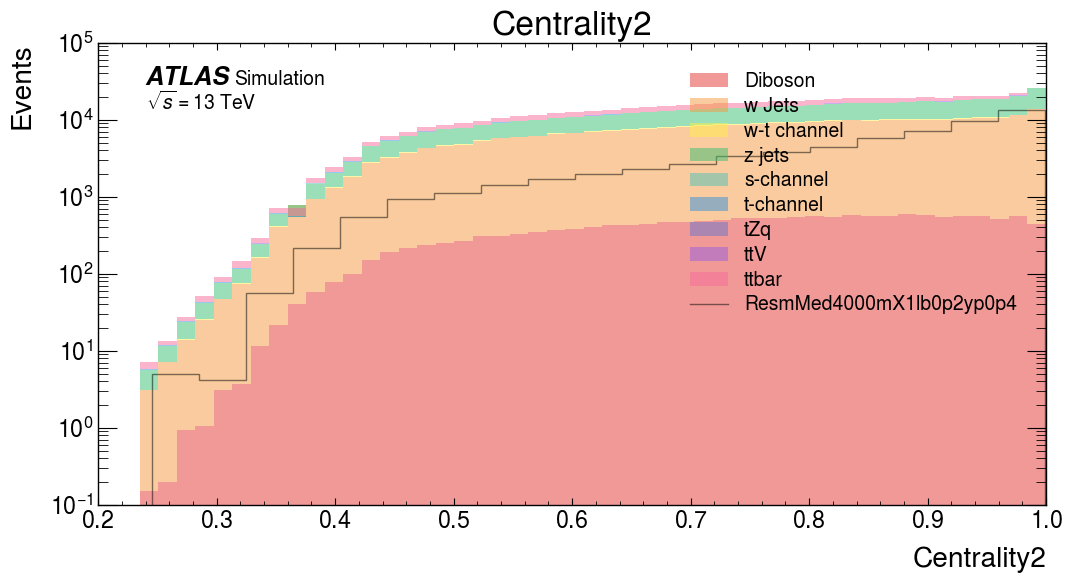

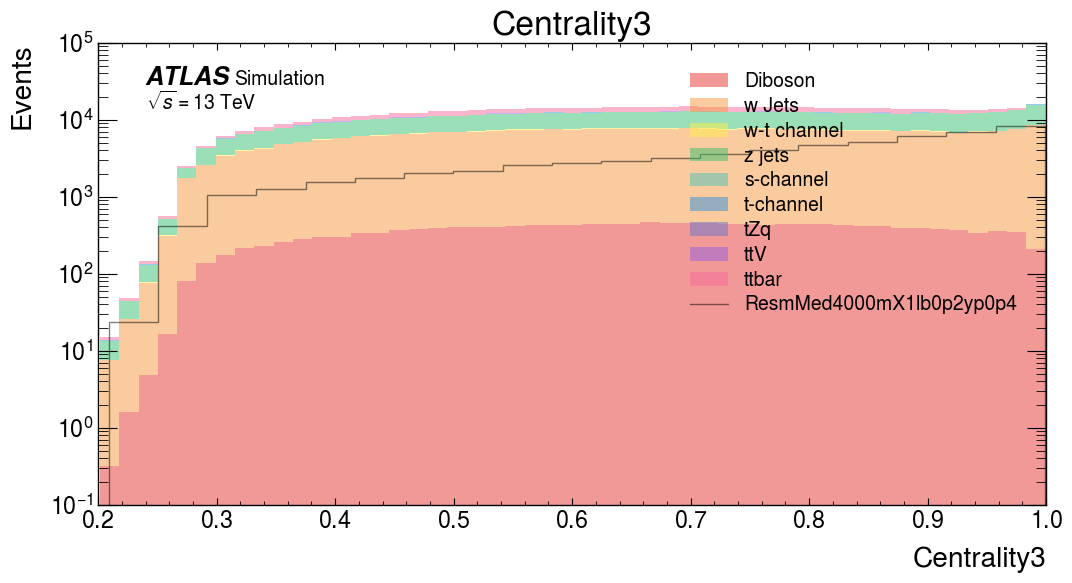

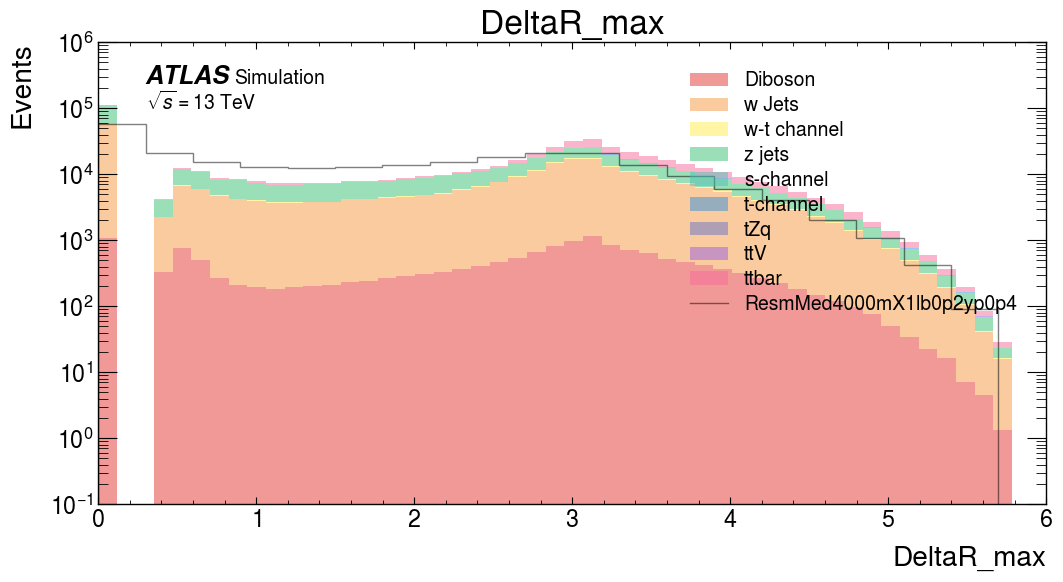

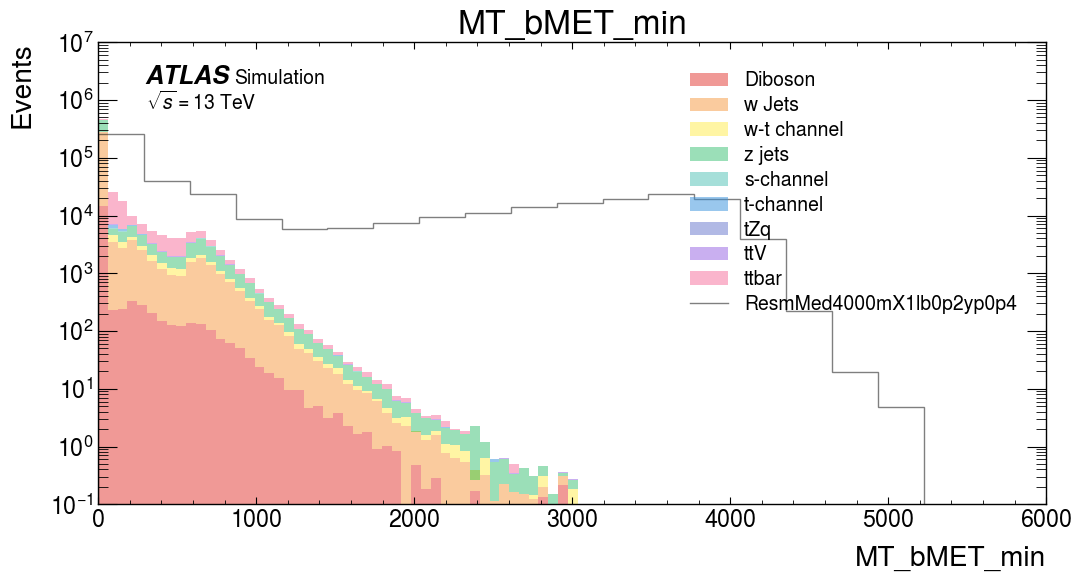

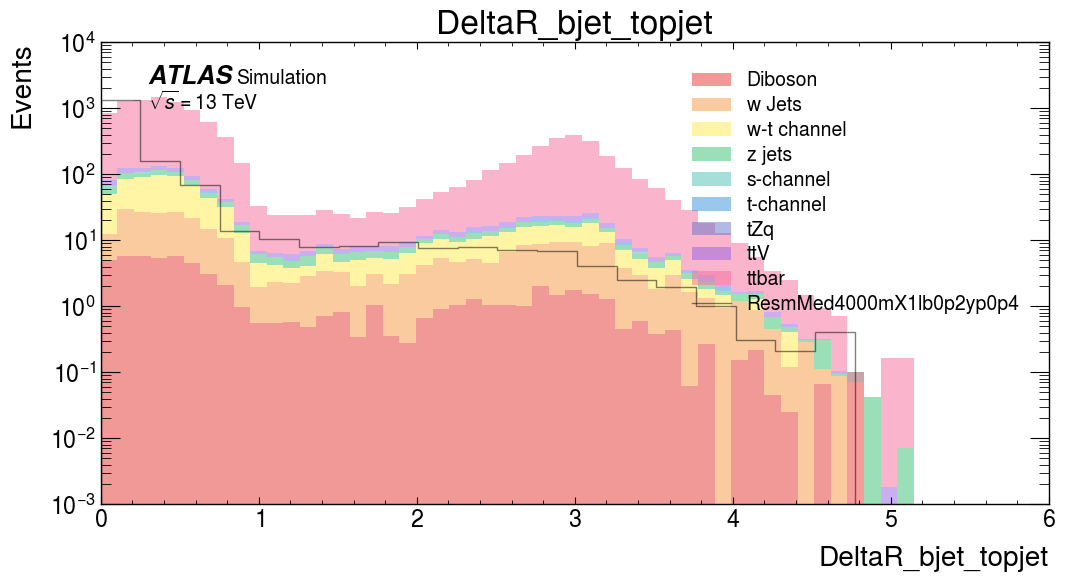

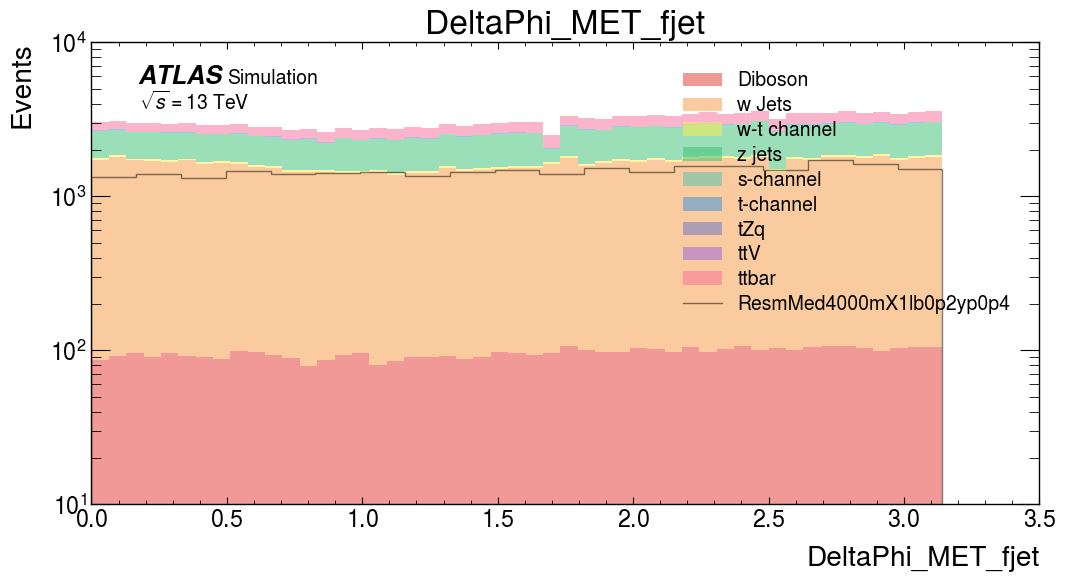

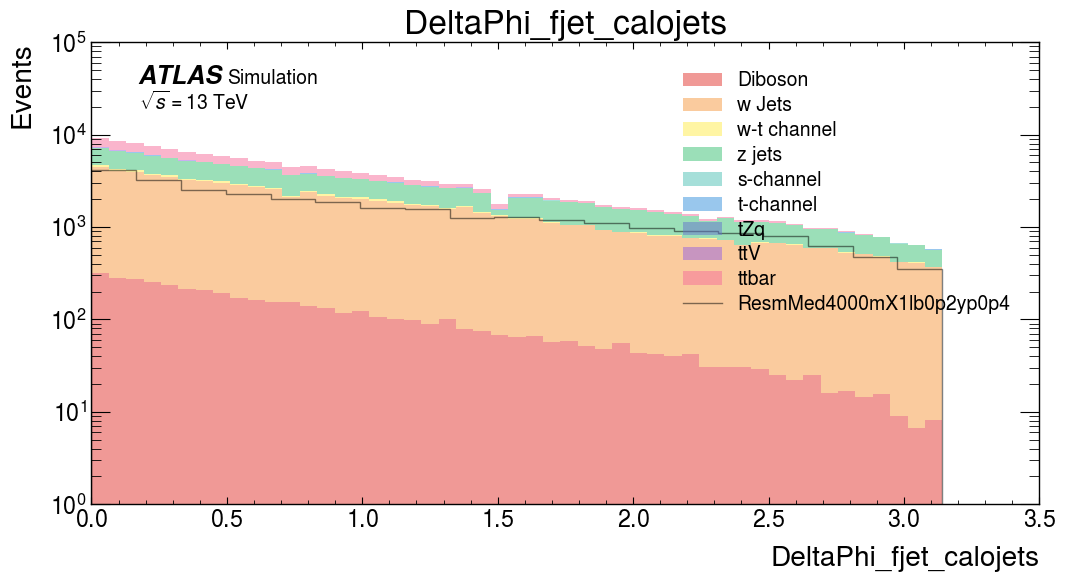

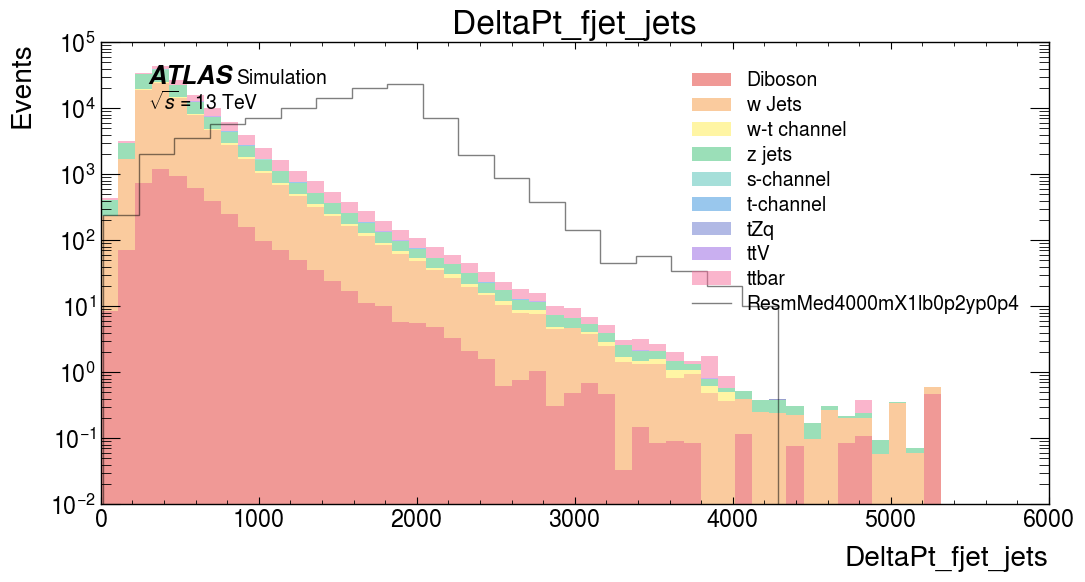

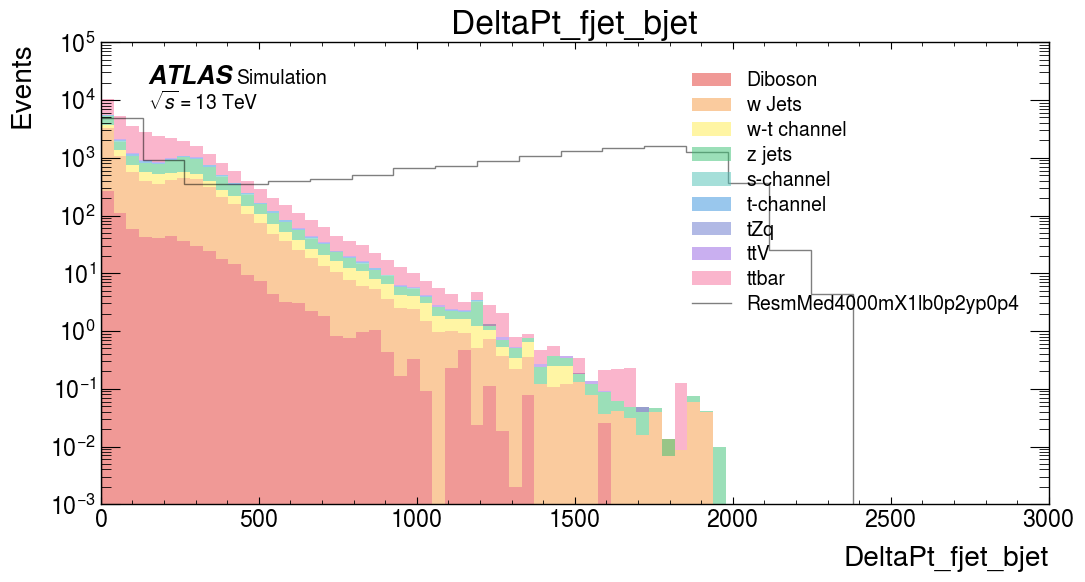

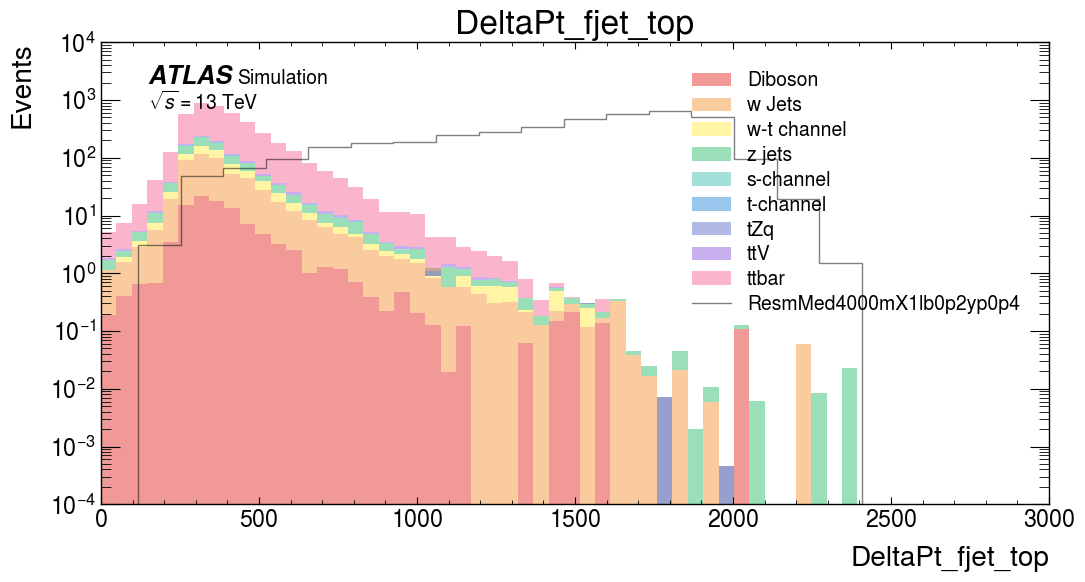

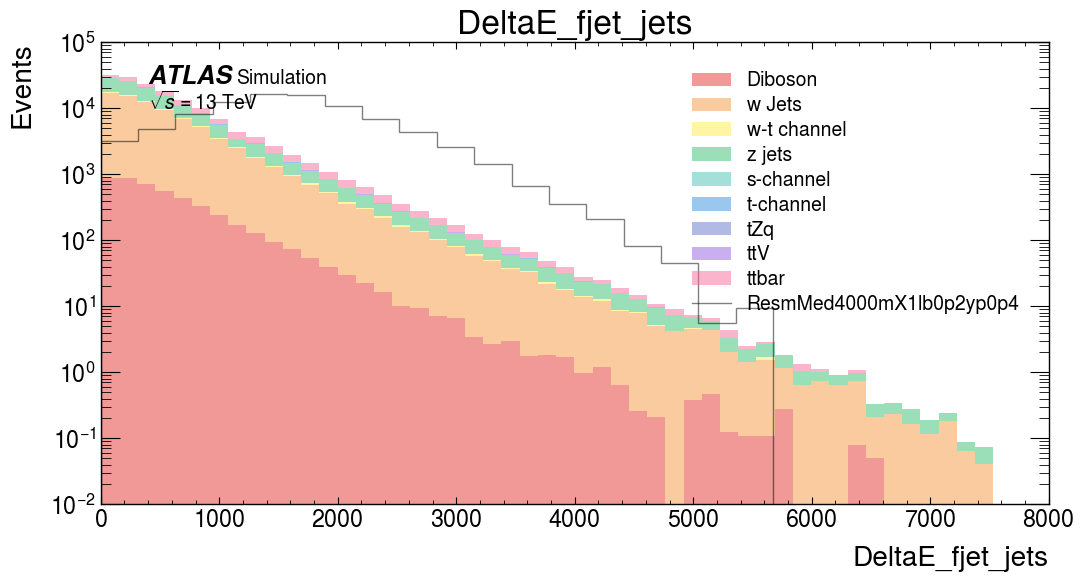

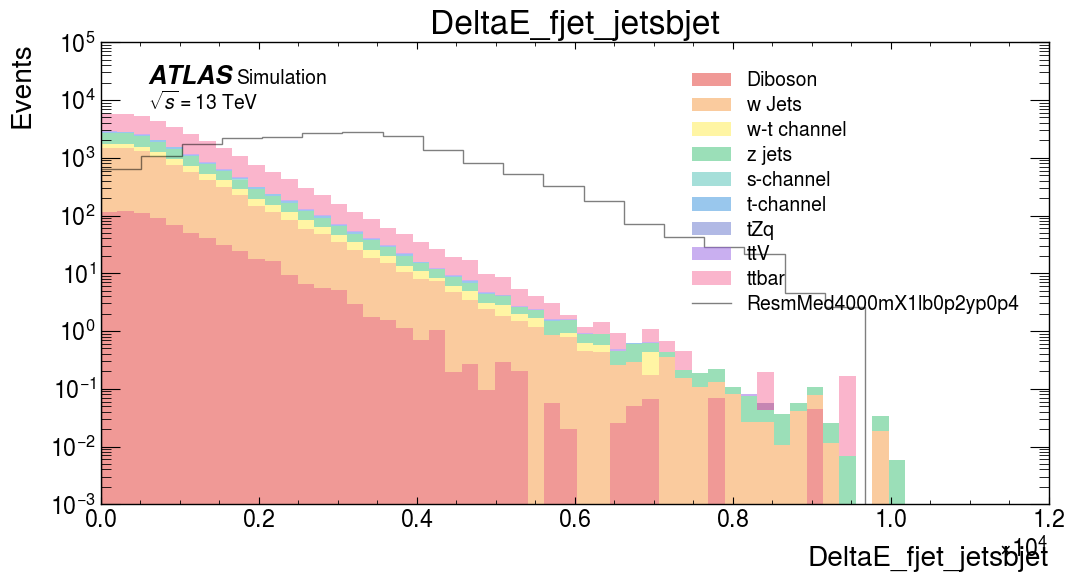

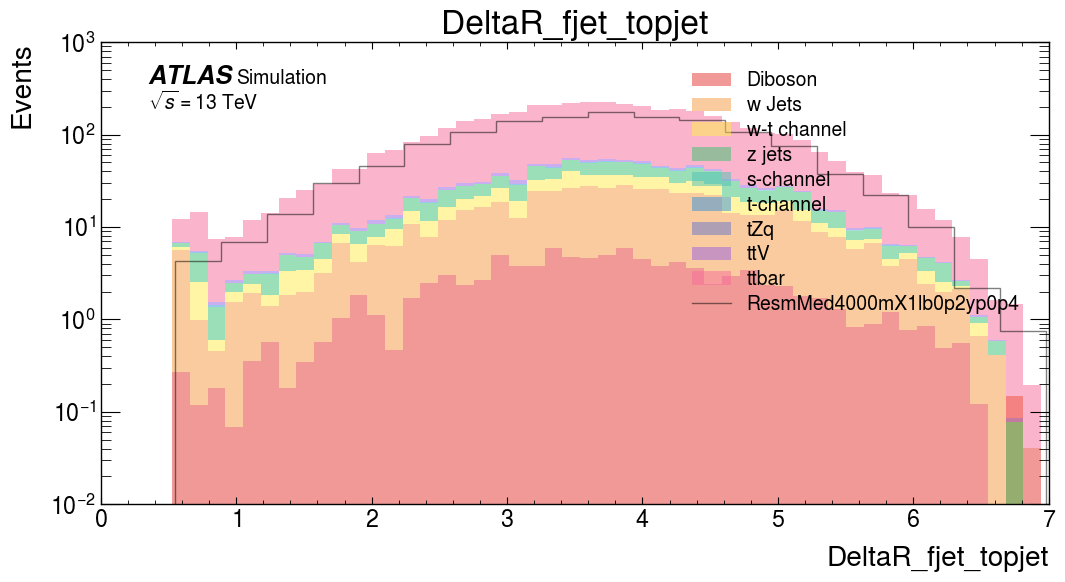

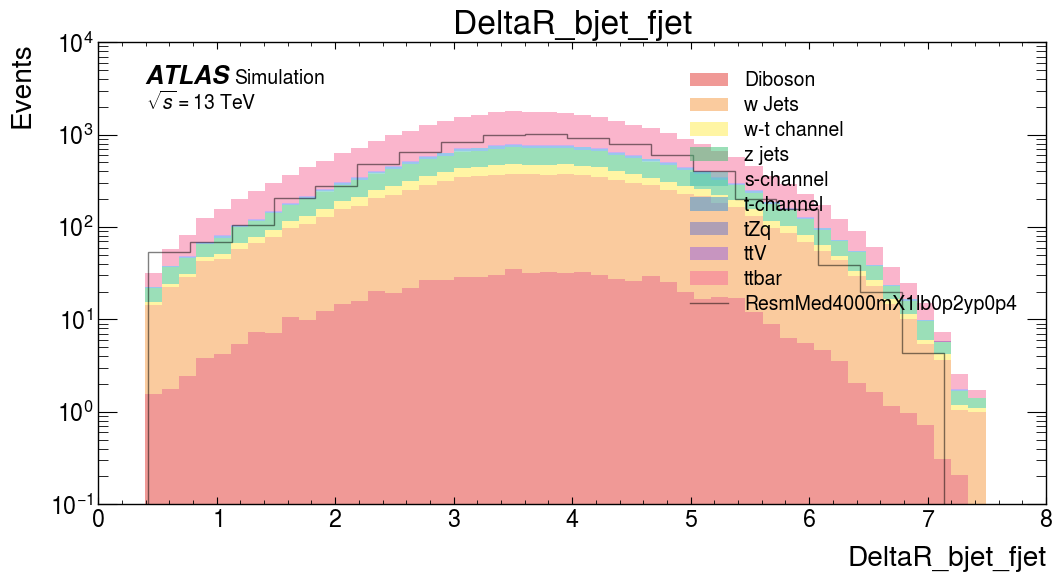

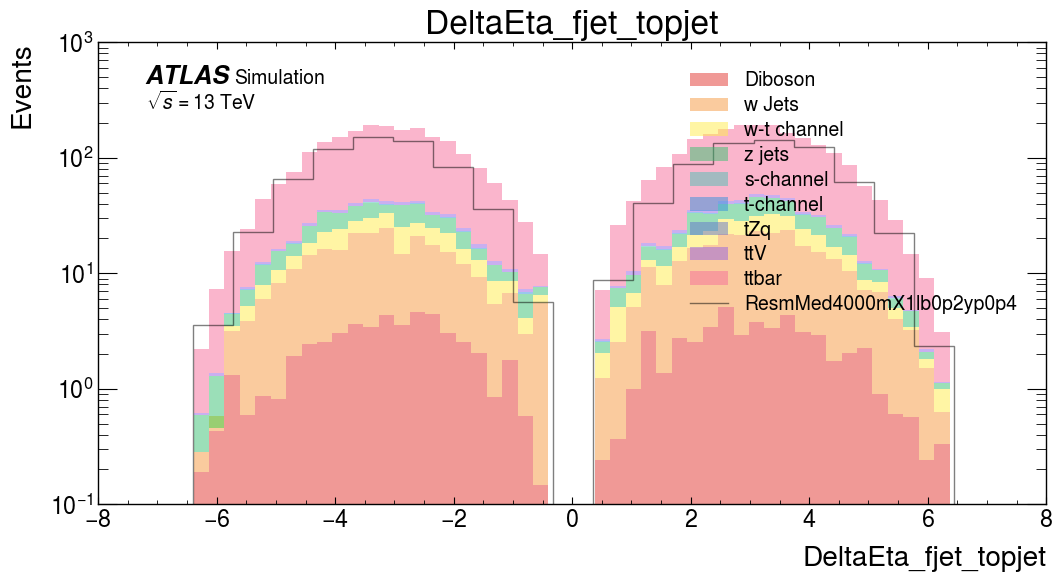

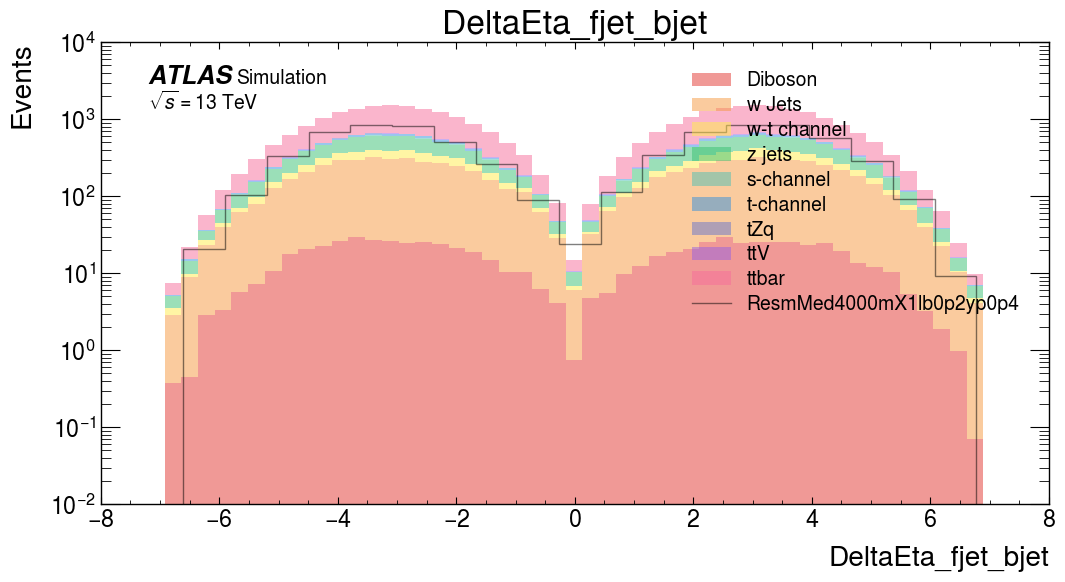

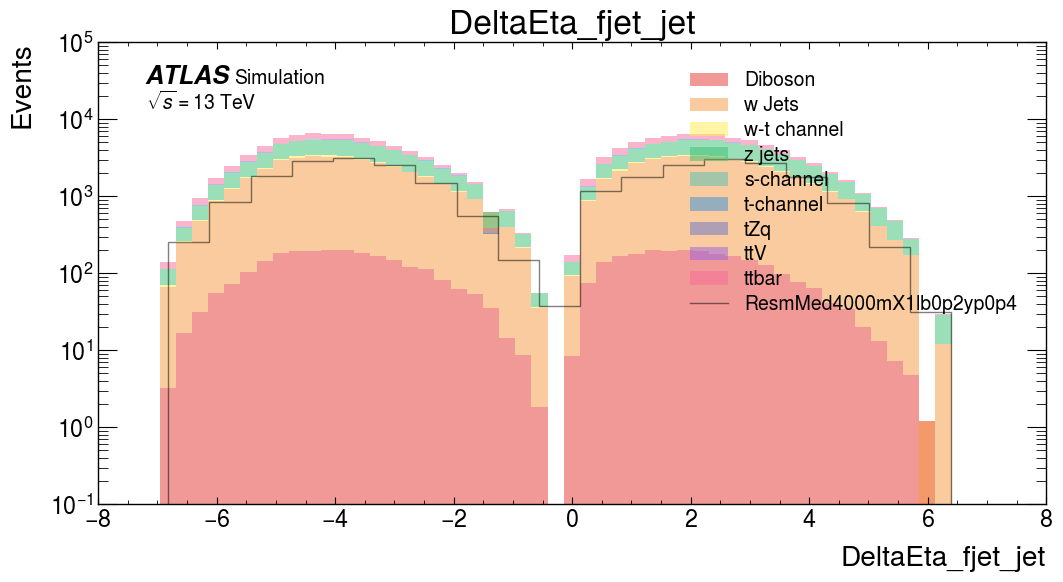

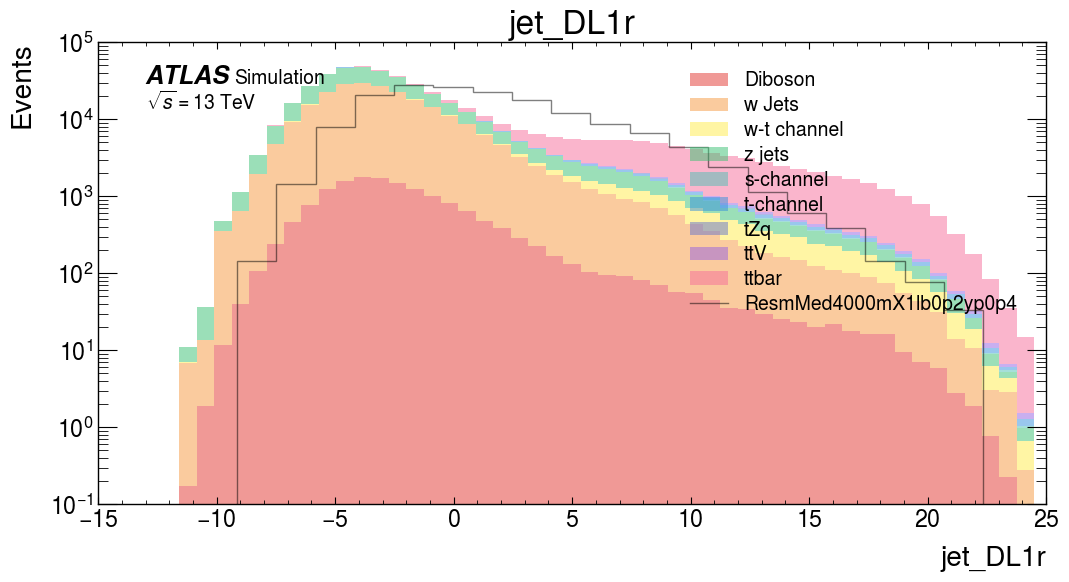

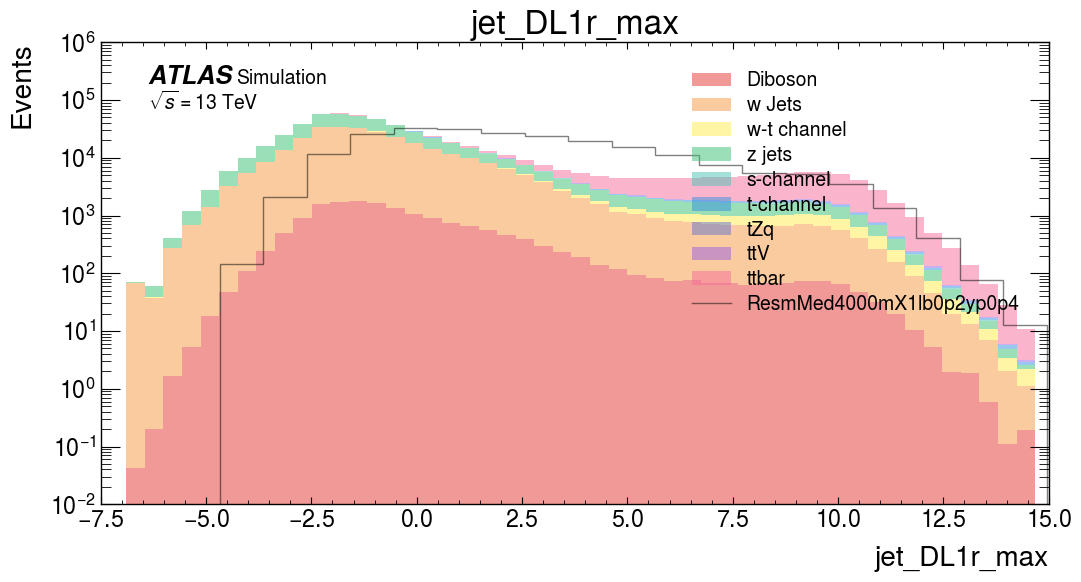

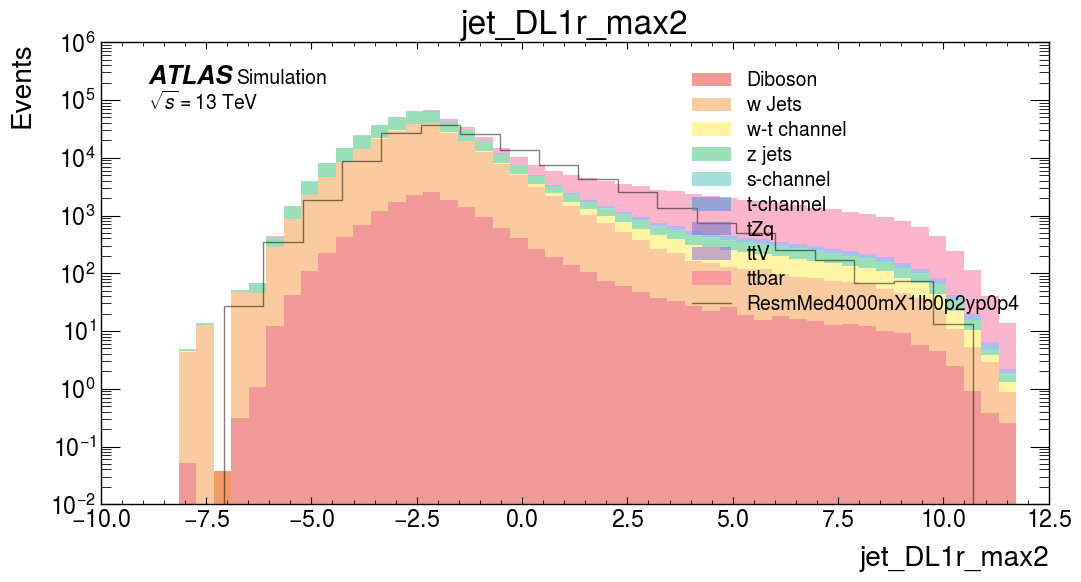

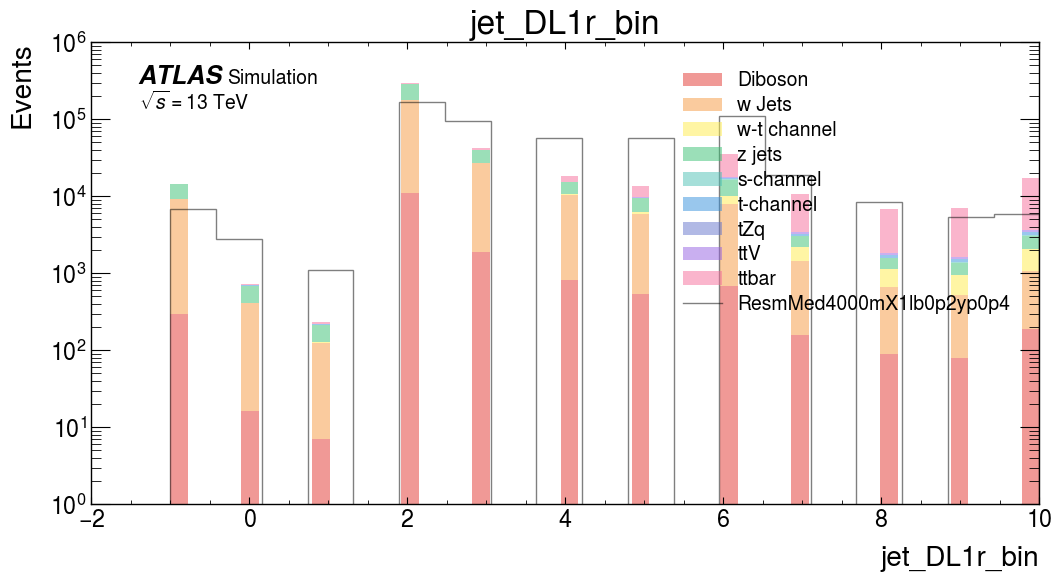

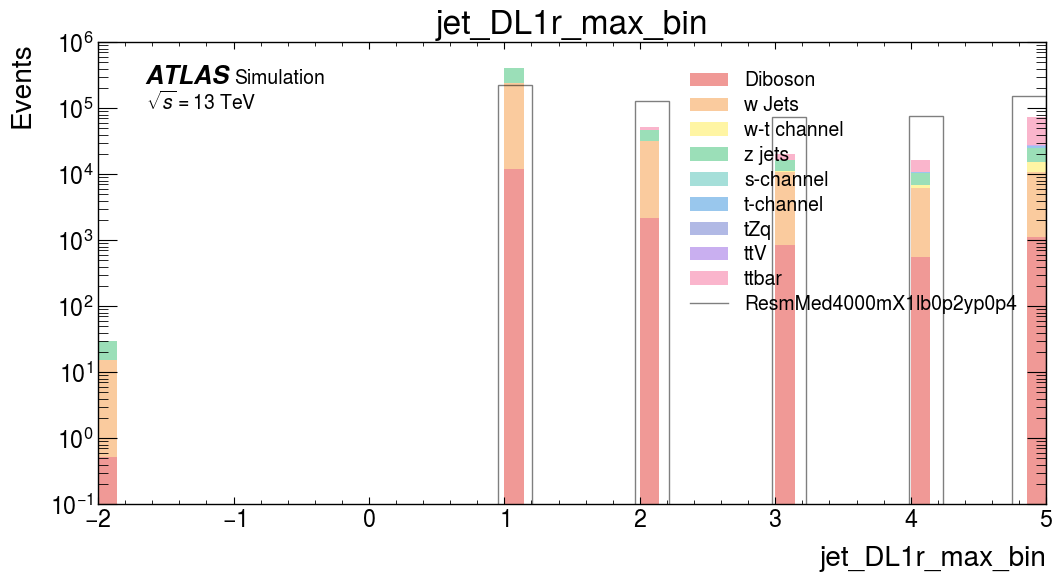

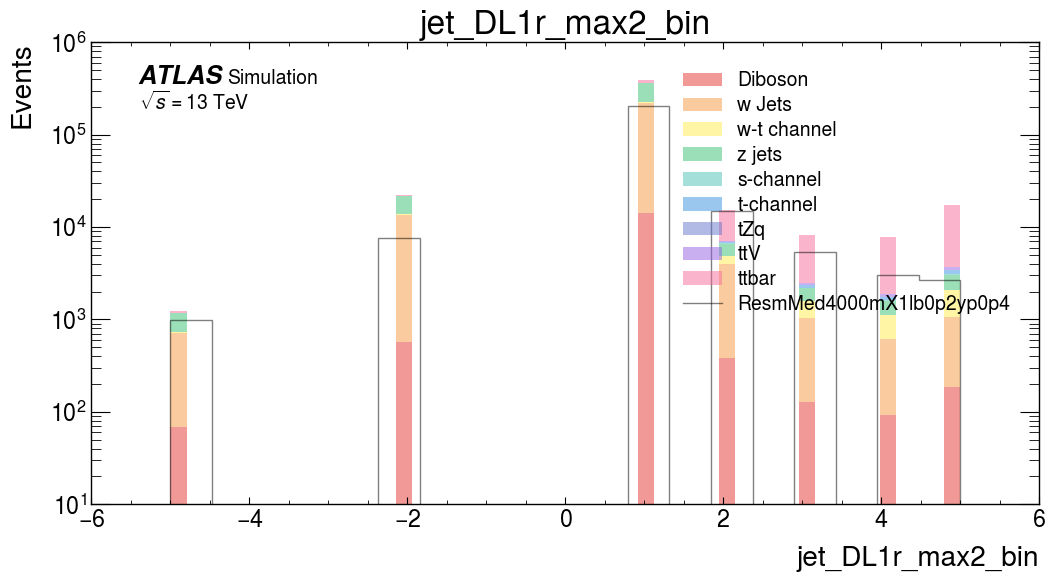

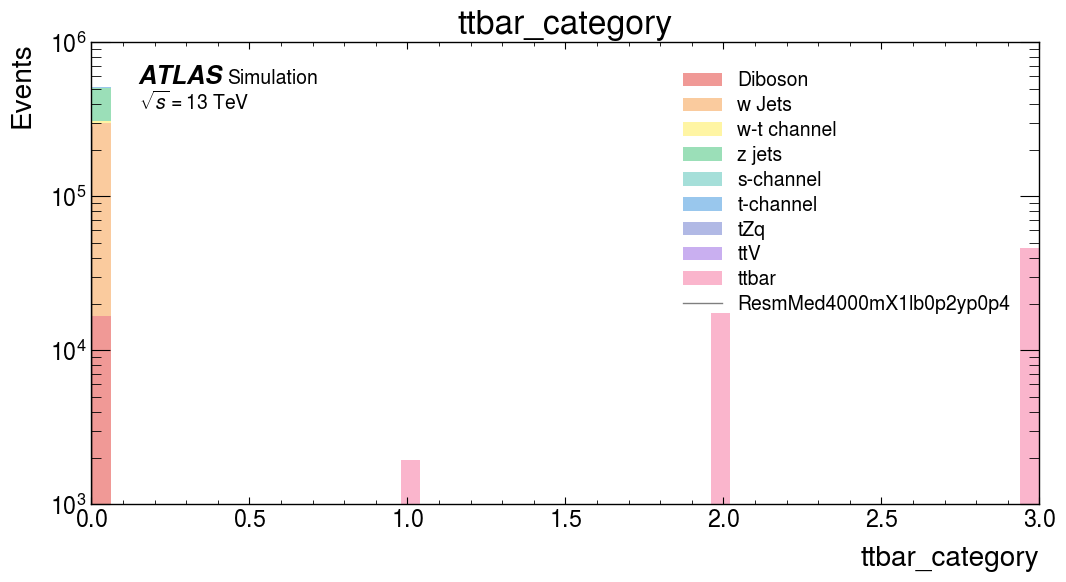

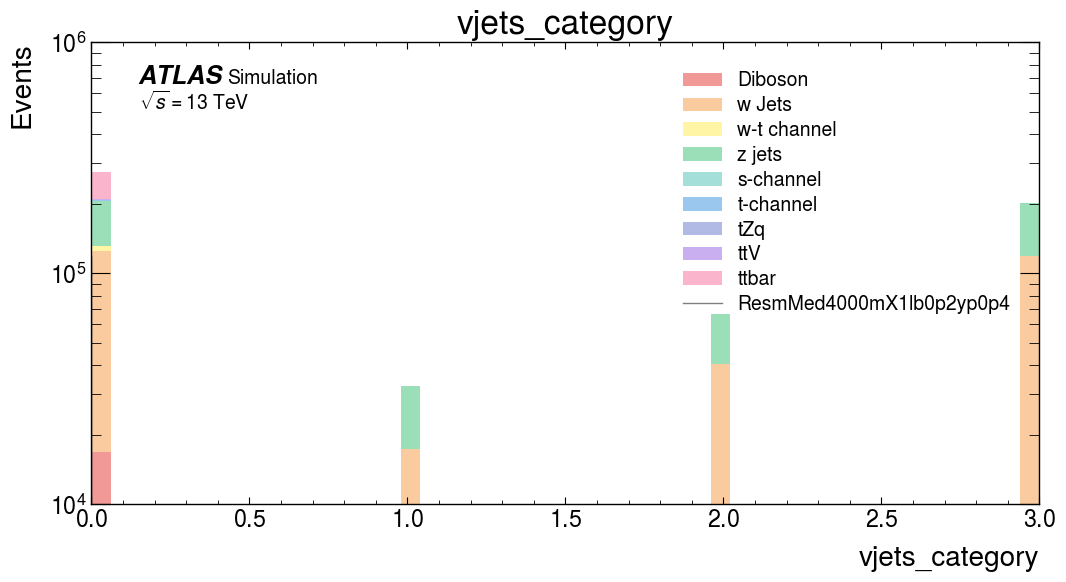

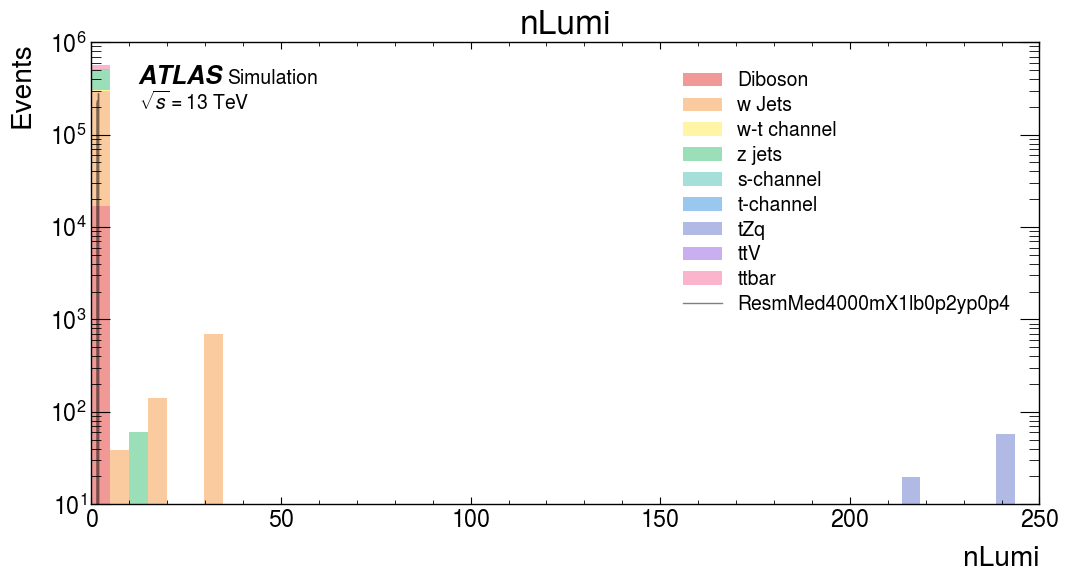

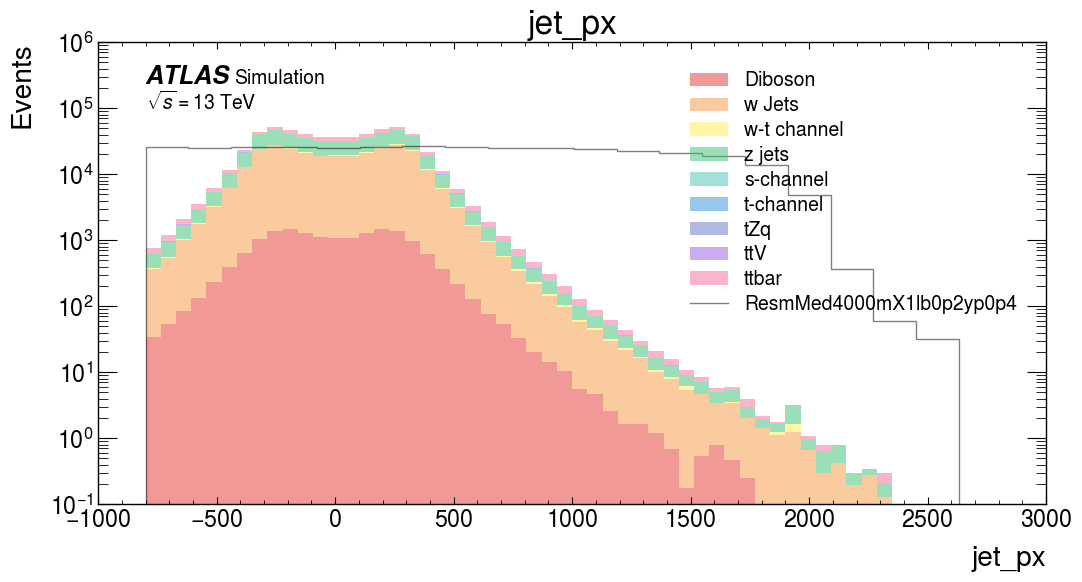

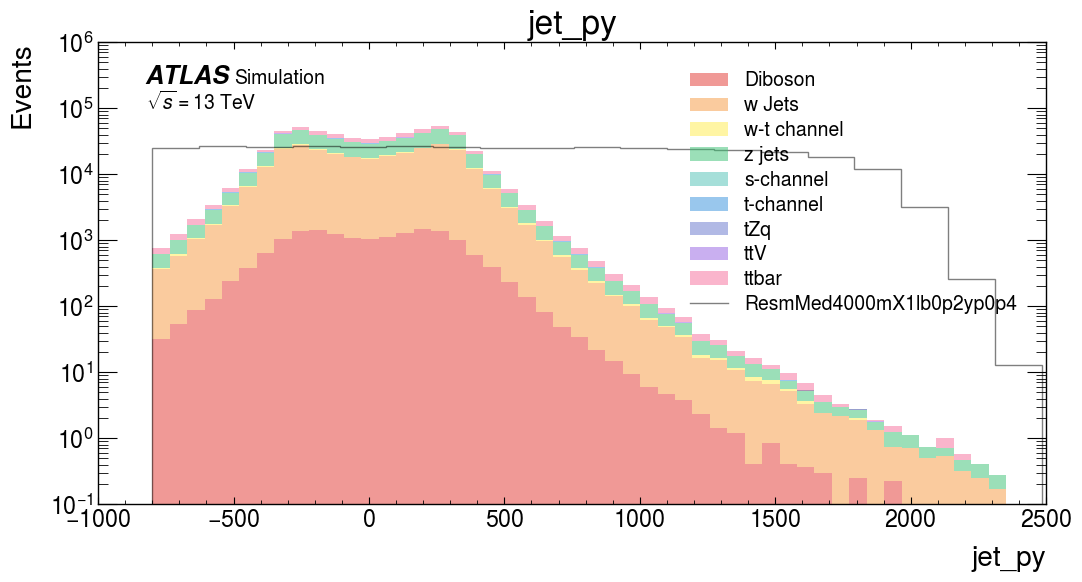

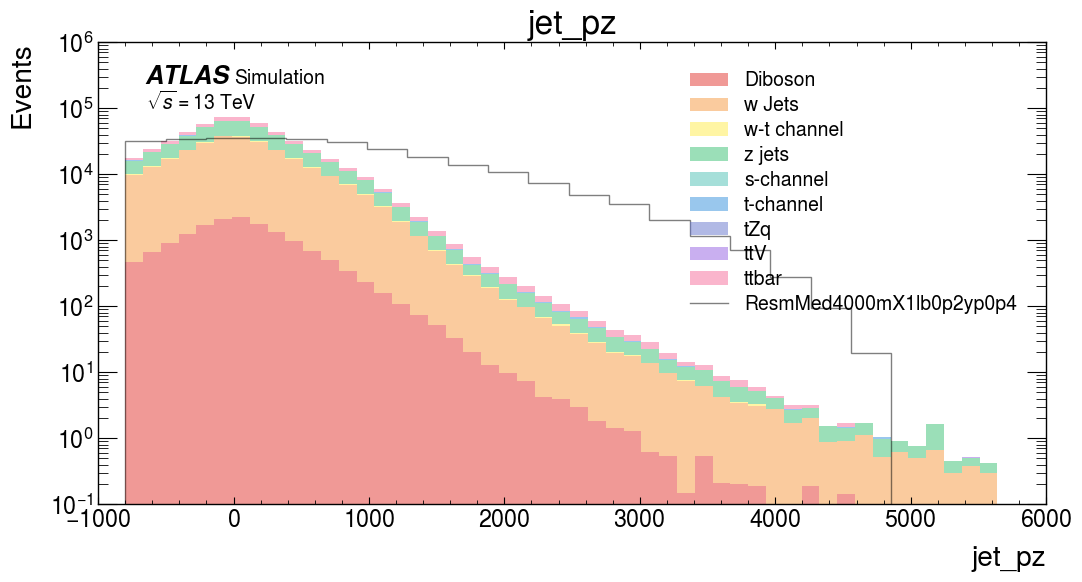

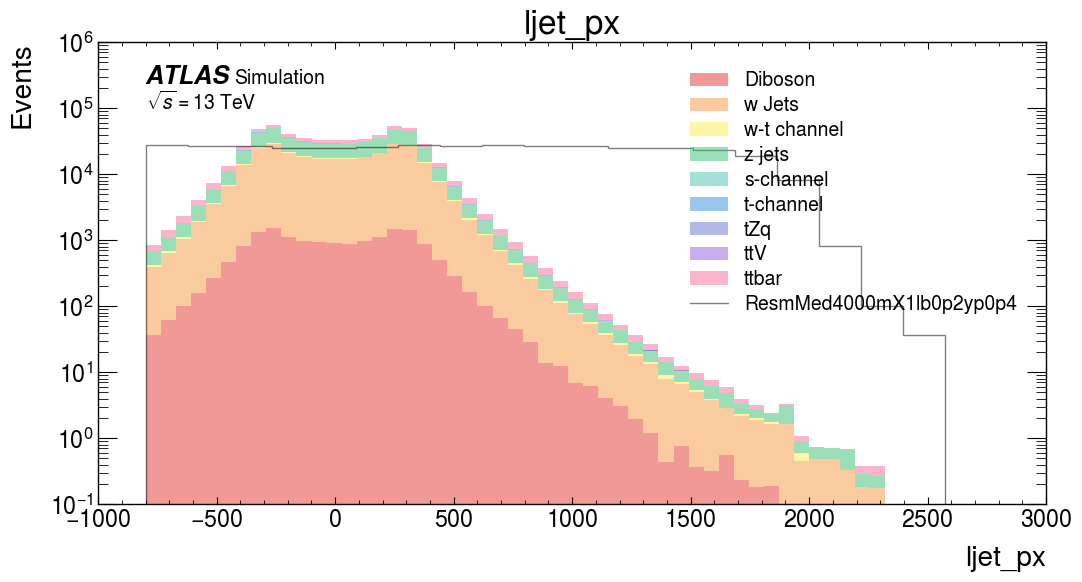

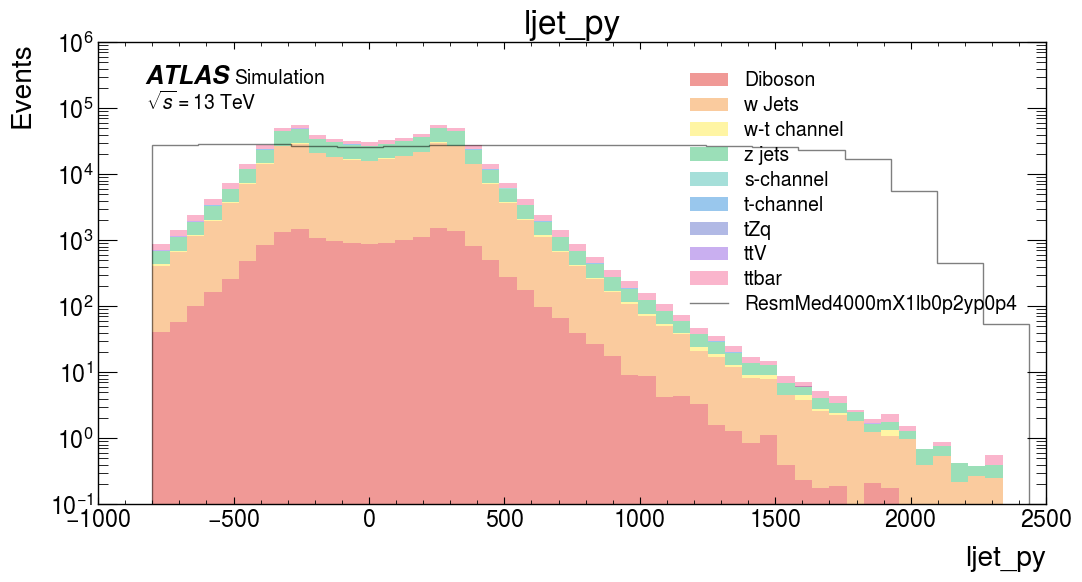

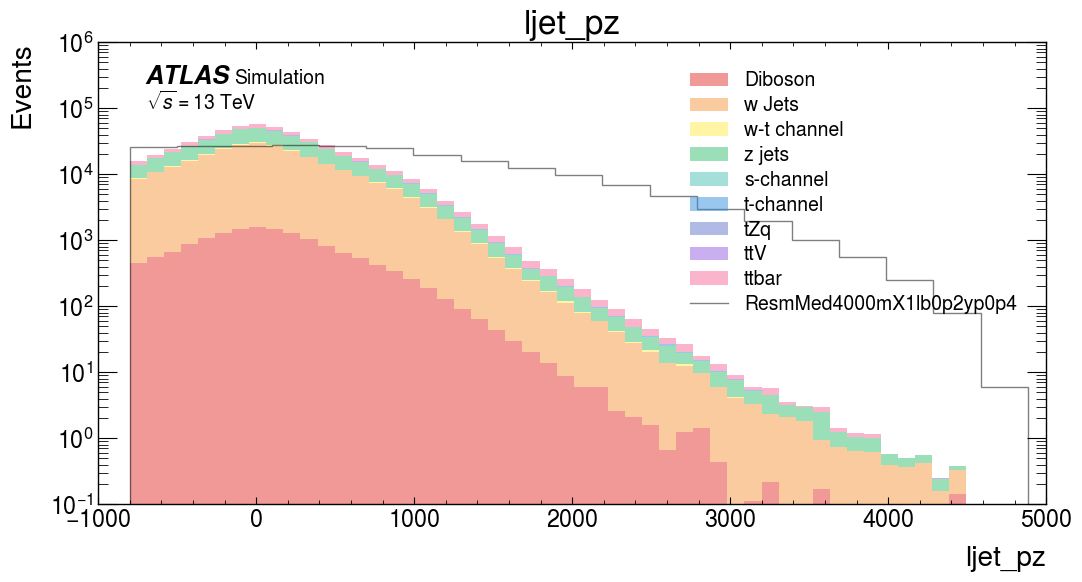

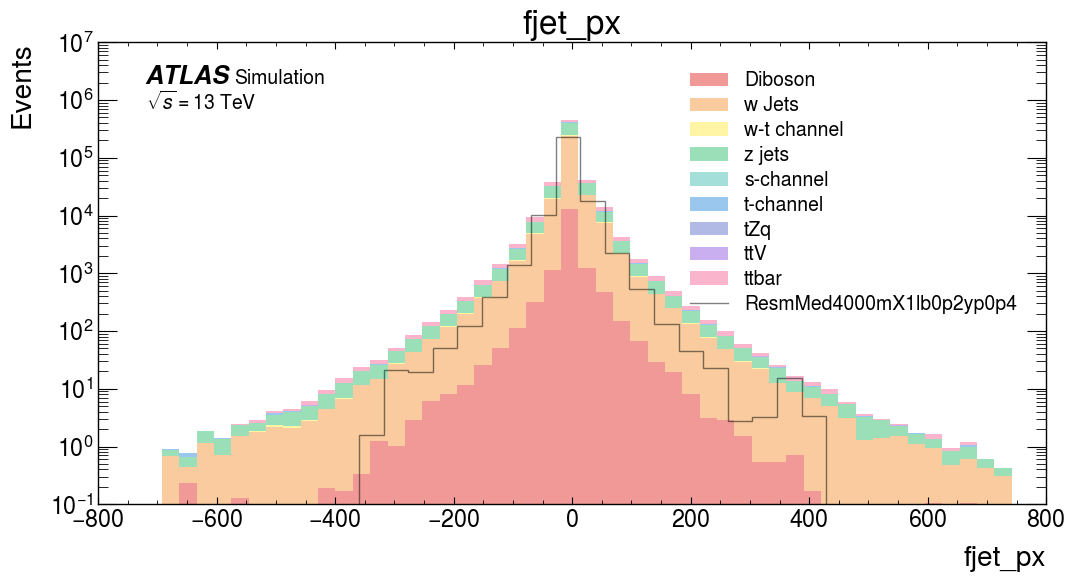

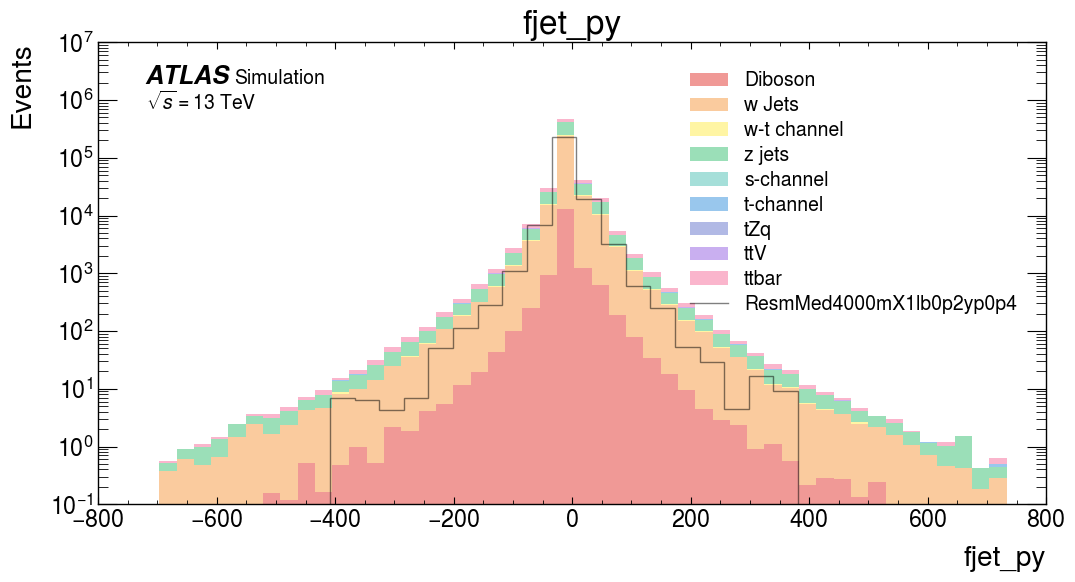

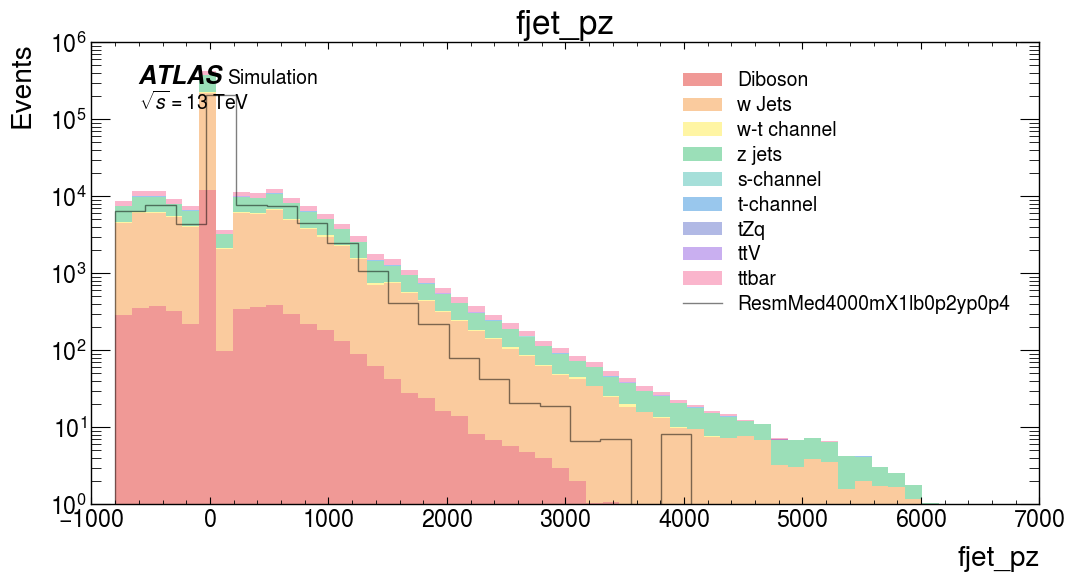

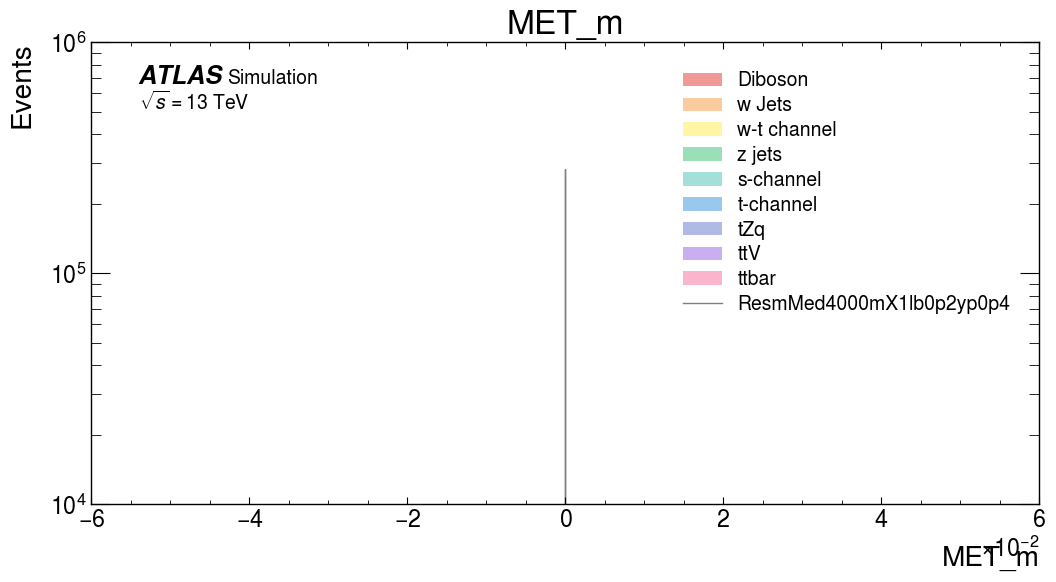

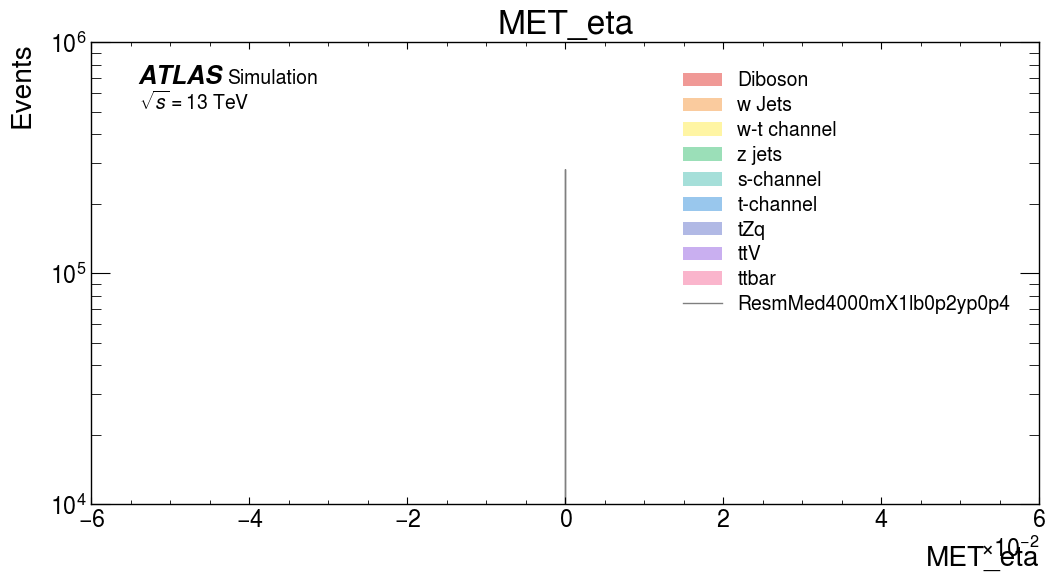

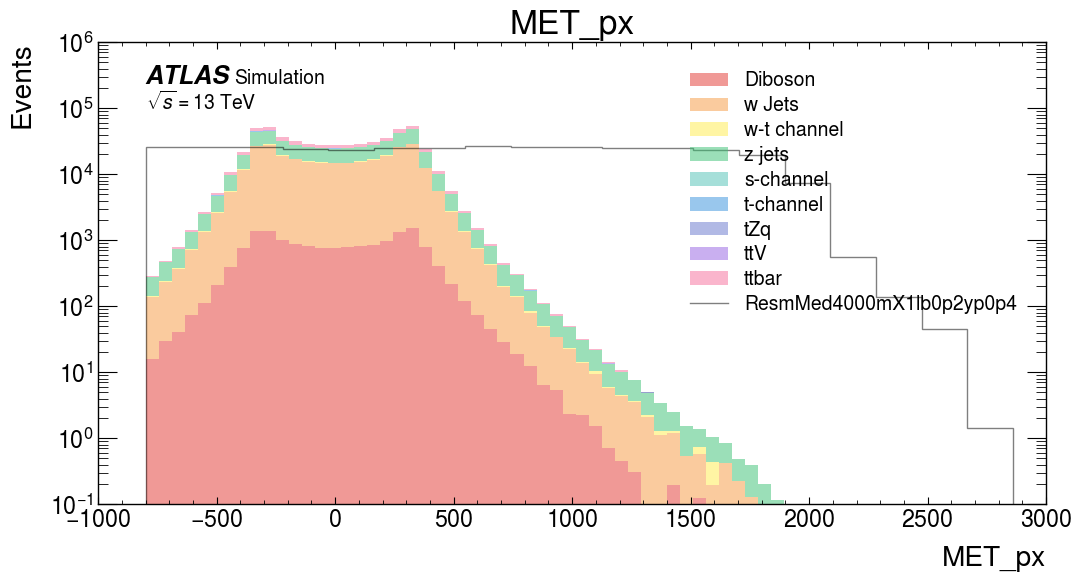

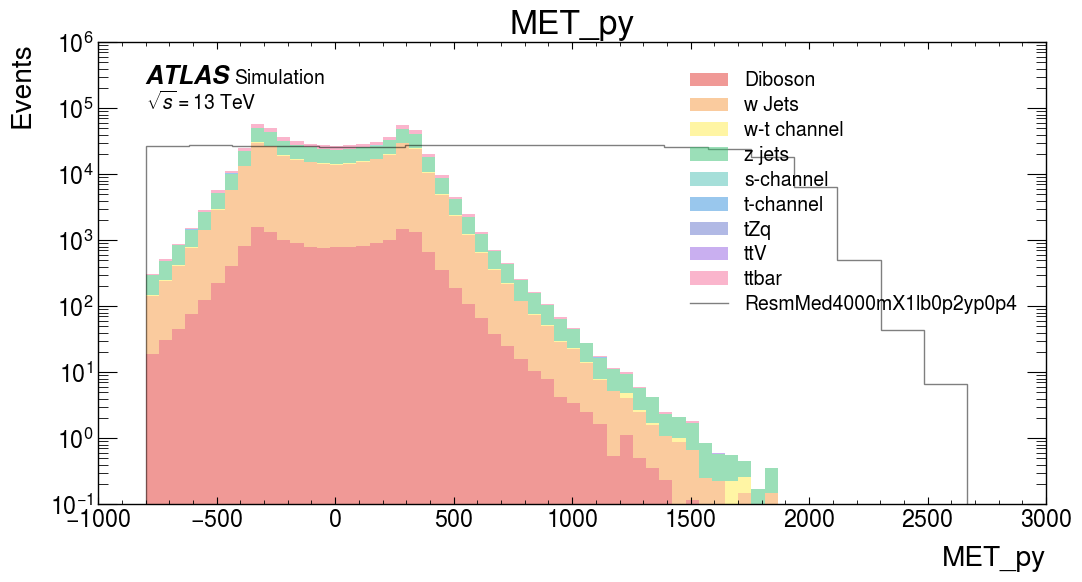

In [102]:

#list of variables to loop through
variables=[ 'MET', 'MET_Phi', 'nGoodJets', 'nGoodbJets', 'nGoodlJets', 'nGoodtoplJets', 'nForwardJets', 'nTruthJets', 'jet_pt', 'jet_e', 'jet_eta', 'jet_phi', 'ljet_pt', 'topjet_pt', 'ljet_e', 'topjet_e', 'ljet_m', 'topjet_m', 'ljet_eta', 'topjet_eta', 'ljet_phi', 'topjet_phi', 'fjet_pt', 'fjet_e', 'fjet_eta', 'fjet_phi', 'DeltaPhi_MET_ljet', 'Omega', 'DeltaPhi_MET_calojets', 'MT_JMET', 'HT', 'mtop', 'DeltaPt_top_jets', 'DeltaE_top_jets', 'DeltaPt_top_jetsbjet', 'DeltaE_top_jetsbjet', 'DeltaE_tot', 'DeltaPhi_bjet_topjet', 'Centrality', 'Centrality2', 'Centrality3', 'DeltaR_max', 'MT_bMET_min', 'DeltaR_bjet_topjet', 'DeltaPhi_MET_fjet', 'DeltaPhi_fjet_calojets', 'DeltaPt_fjet_jets', 'DeltaPt_fjet_bjet', 'DeltaPt_fjet_top', 'DeltaE_fjet_jets', 'DeltaE_fjet_jetsbjet', 'DeltaR_fjet_topjet', 'DeltaR_bjet_fjet', 'DeltaEta_fjet_topjet', 'DeltaEta_fjet_bjet', 'DeltaEta_fjet_jet', 'jet_DL1r', 'jet_DL1r_max', 'jet_DL1r_max2', 'jet_DL1r_bin', 'jet_DL1r_max_bin', 'jet_DL1r_max2_bin', 'ttbar_category', 'vjets_category', 'nLumi', 'jet_px', 'jet_py', 'jet_pz', 'ljet_px', 'ljet_py', 'ljet_pz', 'fjet_px', 'fjet_py', 'fjet_pz', 'MET_m', 'MET_eta', 'MET_px', 'MET_py']
#variables=['MET','MET_Phi', 'nGoodJets','topjet_pt','topjet_m'] #use shorter list for testing 
binNum=50 #defines how many bins each histogram will be divided into

#looping through each variable in the above list
for x in variables:
    feature=x
    relevantData=background[['merge_sample','normalisedCombinedWeight',feature]] #makes a new dataset of just merge sample, weights and the variable which we are looking at 
    relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
    binEdges=binwidths(binNum,relevantData[feature]) #sets the variable binEdges equal to an array containing locations of all binedges, which have been worked out by function above (binwidths)
    signalData=signal[['normalisedCombinedWeight',feature]] #new dataset of signal data
    signalData.drop(signalData[signalData[feature] <= -800].index, inplace = True)
    output=loopTypes(relevantData,binEdges,binNum) #sets variable "output" equal to an array of the frequencies of each stack of the histogram as defined by the function loopTypes
    plotGraph(x,output,binEdges,signalData[feature],signalData['normalisedCombinedWeight']) #plots histogram using function plot graph defined above

    

Certain features are multiplicities, meaning that they are only whole numbers. For these th ebin edges need to be calculated in a different way. This has been done below:

In [103]:
def binNumbers(data):
    
    maximum=int(np.percentile(data,99.999))
    minimum=int(np.percentile(data,0.001))
    binNumber= maximum-minimum
    binedges=np.linspace((minimum-0.5),(maximum+0.5),binNumber+2)
    return binedges, binNumber+2
    

In [104]:
def plotGraph(variable,frequencies,binEdges,signalData,signalWeights):
    '''
    function to plot stacked histogram showing background data of different types and histogram
    Takes the variable which we are looking at (used for title etc)
    takes frequencies which is an array where each row contains the freuqencies for ecah type of data
    Take sposotion of bin edges
    Takes signal data nad weights
    '''
    fig, ax = plt.subplots(figsize=(12, 6))
    #plotting the background data:
    hep.histplot( 
        frequencies,
        stack= True,
        bins=binEdges,
        histtype="fill",
        color=['#e3342f','#f6993f','#ffed4a','#38c172','#4dc0b5','#3490dc','#6574cd','#9561e2','#f66d9b'],
        alpha=0.5,
                label=[
        r"Diboson",
        r"w Jets",
        r"w-t channel",
        r"z jets",
        r"s-channel",
        r"t-channel",
        r"tZq",
        r"ttV",
        r"ttbar",
    ],
        ax=ax)
    signalEdges=binEdges
    sigHist=histogram(signalData,signalEdges,signalWeights)
    #plotting the signal data
    scalefactor=np.amax(frequencies)/np.amax(sigHist)
    hep.histplot(
        sigHist*(scalefactor),
        bins=signalEdges,
        color=['black'],
        alpha=0.5,
        label=["ResmMed4000mX1lb0p2yp0p4"],
        ax=ax
        )
    #displaying the graph 
    ax.set_xlabel(variable)
    ax.set_ylabel("Events")
    ax.set_title(variable)
    ax.legend(loc='upper right')
    ax.set_yscale("log")
    hep.atlas.label(label='Work in Progress')
    fig.savefig(variable+".pdf")
    fig.show()

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1747866810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1747866810.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= -800].index, inplace = True)


14
1


/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/451075481.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1747866810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1747866810.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= -

5
0


/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/451075481.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1747866810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1747866810.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= -

5
1


/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/451075481.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1747866810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1747866810.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= -

2
0


/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/451075481.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1747866810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1747866810.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= -

15
0


/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/451075481.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1747866810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1747866810.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= -

16
1


/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/451075481.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1747866810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1747866810.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= -

3
0


/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/451075481.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


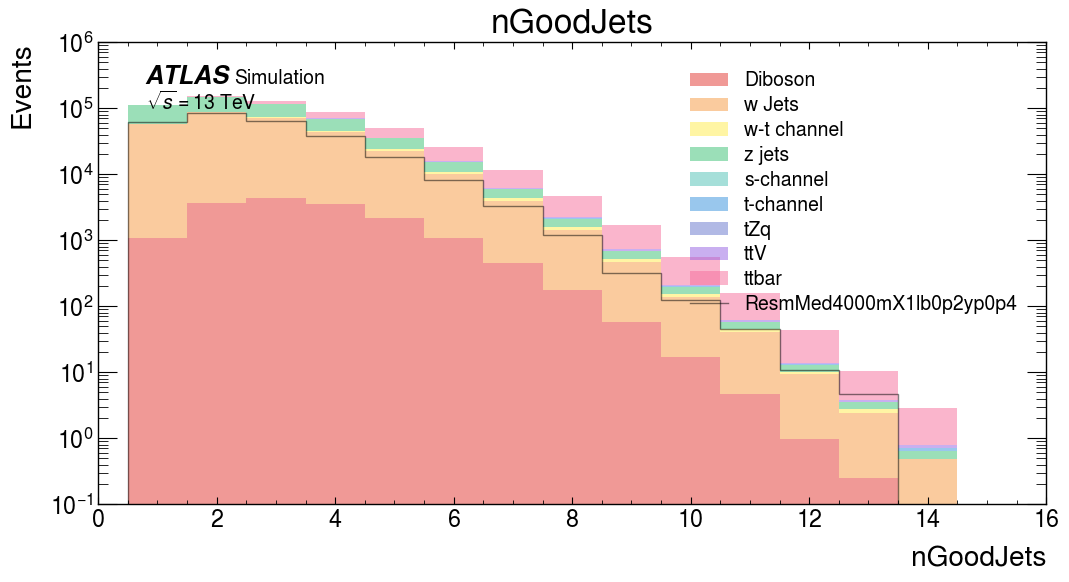

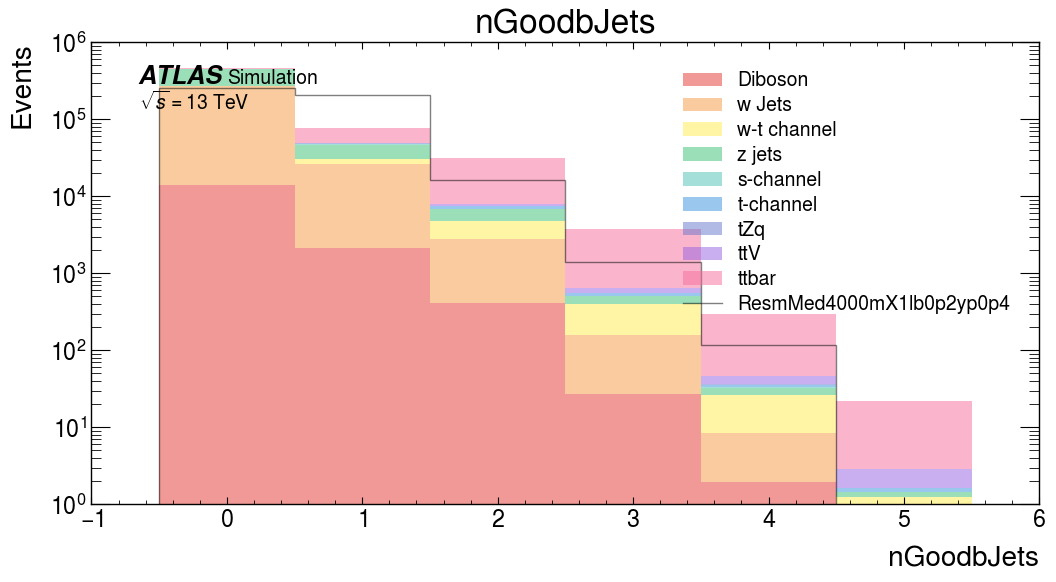

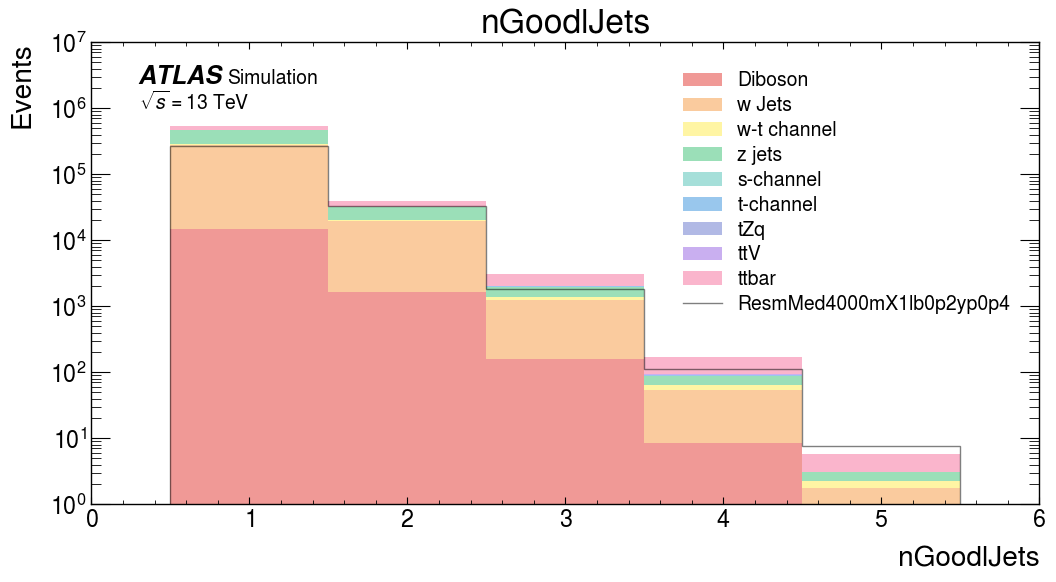

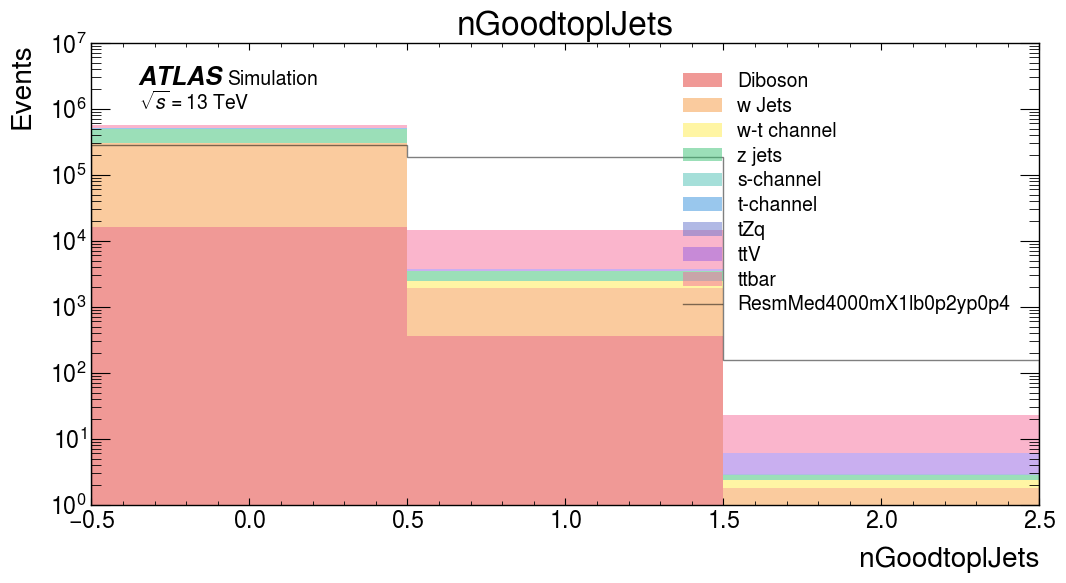

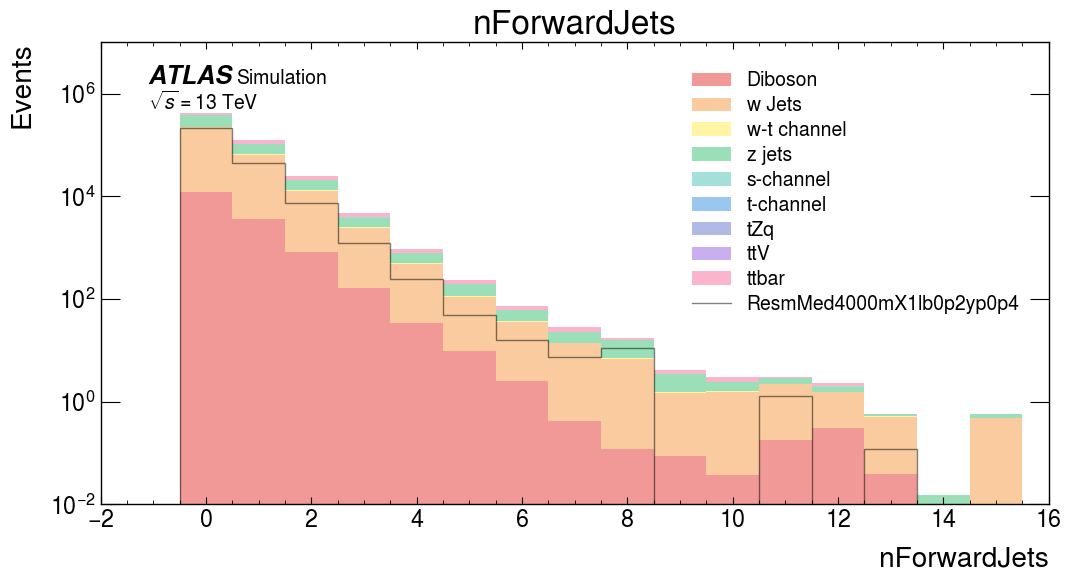

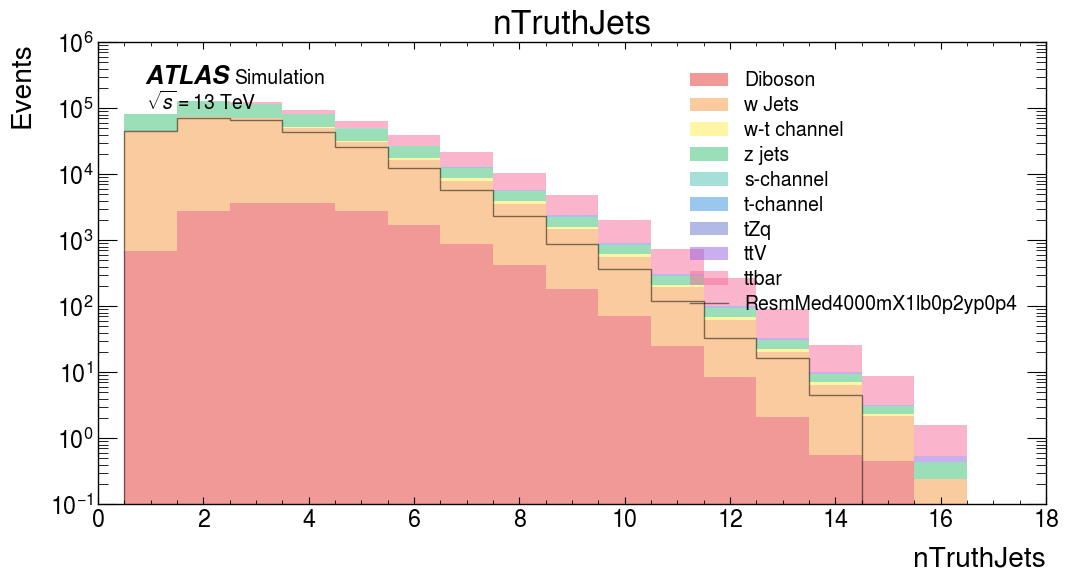

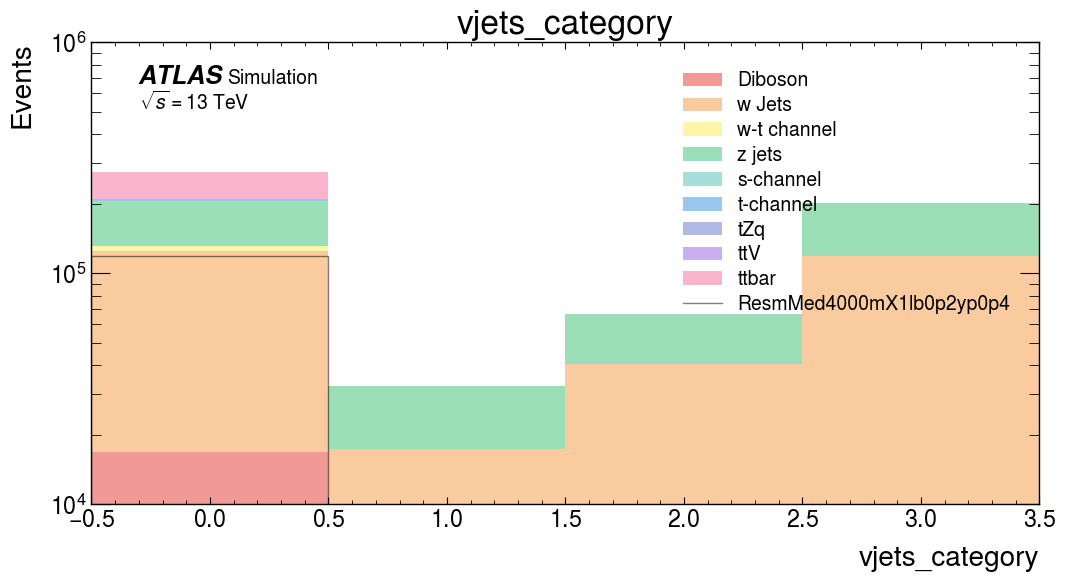

In [105]:
variables=variables=['nGoodJets',
                     'nGoodbJets', 'nGoodlJets', 'nGoodtoplJets', 'nForwardJets',
                     'nTruthJets', 'vjets_category'
                    ]
for x in variables:
    feature=x
    relevantData=background[['merge_sample','normalisedCombinedWeight',feature]] #makes a new dataset of just merge sample, weights and the variable which we are looking at 
    relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
    binEdges,binNum=binNumbers(relevantData[feature]) #sets the variable binEdges equal to an array containing locations of all binedges, which have been worked out by function above (binwidths)
    signalData=signal[['normalisedCombinedWeight',feature]] #new dataset of signal data
    signalData.drop(signalData[signalData[feature] <= -800].index, inplace = True)
    output=loopTypes(relevantData,binEdges,binNum) #sets variable "output" equal to an array of the frequencies of each stack of the histogram as defined by the function loopTypes
    plotGraph(x,output,binEdges,signalData[feature],signalData['normalisedCombinedWeight']) #plots histogram using function plot graph defined above


We were provided with more signal datasets which are summarised here:
GG_direct_2000_0.csv -> SUSY signal of guino g pair production, with gluino decay to quarks and neutrino X1:  pp > ~g~g (~g -> qqX1)
HVT_Agv1_VzZH_vvqq_m1000.csv -> Heavy vector triplet production, with heavy vector decay into Zh: pp > HVT (HVT -> Zh -> vvbb)
bbA2000_yb2_Zhvvbb.csv -> Two Higgs Doublet Model (2HDM) process, with production of heavy pseudoscalar A associated with 2 b-quarks: pp > bbA (A -> Zh -> vvbb)
These were then loaded into the notebook

The new signals had less features than the first signal set, so only the features which all types had could be replotted.

In [106]:
signal1=signal[['jet_DL1r_max', 'normalisedCombinedWeight', 'jet_e', 'mcChannelNumber',
       'topjet_pt', 'MET_eta', 'topjet_e', 'ljet_m', 'nLumi', 'MET',
       'topjet_phi', 'jet_eta', 'ljet_py', 'ljet_phi', 'ljet_pz', 'DeltaR_max',
       'combinedWeight', 'squaredCombinedWeight', 'ljet_eta', 'ljet_pt',
       'jet_pt', 'MET_px', 'MET_m', 'MET_Phi', 'mc_channel', 'jet_pz',
       'MET_py', 'jet_py', 'mtop', 'Centrality', 'jet_px', 'merge_sample',
       'train_weight', 'ljet_e', 'topjet_eta','category',
       'jet_phi', 'ljet_px', 'gen_split', 'topjet_m', 'HT', 'Omega',
       'positiveCombinedWeight']]
signal1['merge_sample']='ResmMed4000mX1lb0p2yp0p4'
display(signal1)

signal2=pd.read_csv('GG_direct_2000_0.csv',delimiter=',',index_col=0) 
signal2['merge_sample']='GG_direct_2000_0'
display(signal2)

signal3=pd.read_csv('HVT_Agv1_VzZH_vvqq_m1000.csv',delimiter=',',index_col=0) 
signal3['merge_sample']='HVT_Agv1_VzZH_vvqq_m1000'
display(signal3)

signal4=pd.read_csv('bbA2000_yb2_Zhvvbb.csv',delimiter=',',index_col=0) 
signal4['merge_sample']='bbA2000_yb2_Zhvvbb'
display(signal4)

allSignals=pd.concat([signal1,signal2,signal3,signal4])


/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/3695097550.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal1['merge_sample']='ResmMed4000mX1lb0p2yp0p4'


jet_DL1r_max  normalisedCombinedWeight       jet_e  mcChannelNumber  \
0         -0.561112                  0.003749  1647.68850           503969   
1         -0.972071                  0.002659  2740.86040           503969   
2          2.946797                  0.000228  2389.60180           503969   
3          9.061265                  0.003427  2798.90870           503969   
4          7.965109                  0.003456  1918.98970           503969   
...             ...                       ...         ...              ...   
73054      7.548914                  0.006441  1209.71480           503969   
73055      0.645476                  0.005524  1340.97950           503969   
73056      3.167609                  0.005632  1770.13480           503969   
73057      5.164611                  0.005555   663.58844           503969   
73058      3.478524                  0.005926  1763.54710           503969   

       topjet_pt  MET_eta   topjet_e      ljet_m     nLumi         MET  ...  \
0     -1000.0000      0.0 -1000.0000  117.108420  1.526014  1253.91190  ...   
1      1803.7561      0.0  2563.9297  171.364240  1.526014  2161.91550  ...   
2     -1000.0000      0.0 -1000.0000  157.892490  1.526014  1358.23050  ...   
3     -1000.0000      0.0 -1000.0000   75.423140  1.526014   946.76470  ...   
4     -1000.0000      0.0 -1000.0000  178.920940  1.526014  1231.93880  ...   
...          ...      ...        ...         ...       ...         ...  ...   
73054 -1000.0000      0.0 -1000.0000  485.589230  1.811104  1757.23250  ...   
73055 -1000.0000      0.0 -1000.0000   58.370167  1.811104  1255.46790  ...   
73056  1214.4427      0.0  1705.5433  195.111190  1.811104  1354.64610  ...   
73057 -1000.0000      0.0 -1000.0000    5.559586  1.811104   561.59326  ...   
73058 -1000.0000      0.0 -1000.0000  155.275730  1.811104  1880.89100  ...   

           ljet_e   topjet_eta  category   jet_phi      ljet_px  gen_split  \
0      1577.83450 -1000.000000    signal -2.238812  -778.544500      train   
1      2563.92970    -0.885409    signal  1.663032  -172.216870       test   
2      2348.64400 -1000.000000    signal -2.030795  -579.681460      train   
3      2680.63200 -1000.000000    signal  0.057447   836.311400      train   
4      1926.29490 -1000.000000    signal  0.759287   878.914550       test   
...           ...          ...       ...       ...          ...        ...   
73054  1536.27140 -1000.000000    signal  3.132449 -1452.135000        val   
73055  1366.68360 -1000.000000    signal  1.438190   116.441900        val   
73056  1705.54330     0.862061    signal -1.893953  -401.509800       test   
73057   682.64636 -1000.000000    signal -1.587242   -11.711299       test   
73058  1678.46960 -1000.000000    signal -0.384962  1521.043500       test   

         topjet_m         HT     Omega  positiveCombinedWeight  
0     -1000.00000  2662.3306  0.004566                0.003238  
1       171.36424  4368.2190  0.090315                0.003235  
2     -1000.00000  2755.8481  0.030028                0.003227  
3     -1000.00000  1982.1676  0.061216                0.003237  
4     -1000.00000  2471.8157  0.007870                0.003237  
...           ...        ...       ...                     ...  
73054 -1000.00000  3593.5957  0.095025                0.003247  
73055 -1000.00000  2536.7998  0.168668                0.003244  
73056   195.11119  2723.2053  0.054573                0.003244  
73057 -1000.00000  1301.5945 -0.067083                0.003244  
73058 -1000.00000  3779.0193  0.066665                0.003245  

[73059 rows x 43 columns]

jet_DL1r_max  normalisedCombinedWeight        jet_e  mcChannelNumber  \
10001           0.0                  0.014089  1078.506470           371013   
10002           0.0                  0.014089   806.445374           371013   
10004           0.0                  0.014089  1666.009399           371013   
10005           0.0                  0.014089   766.954651           371013   
10006           0.0                  0.014089  1244.018555           371013   
...             ...                       ...          ...              ...   
14994           0.0                  0.014089  1239.945190           371013   
14995           0.0                  0.014089  1283.554932           371013   
14996           0.0                  0.014089   786.416321           371013   
14998           0.0                  0.014089  1428.135376           371013   
14999           0.0                  0.014089   970.739197           371013   

       topjet_pt  MET_eta  topjet_e      ljet_m     nLumi          MET  ...  \
10001        0.0      0.0       0.0   40.097519  0.014089   905.613831  ...   
10002        0.0      0.0       0.0   58.543247  0.014089   430.017700  ...   
10004        0.0      0.0       0.0  346.471741  0.014089   635.299927  ...   
10005        0.0      0.0       0.0  248.376495  0.014089   300.921295  ...   
10006        0.0      0.0       0.0  511.557190  0.014089   562.881836  ...   
...          ...      ...       ...         ...       ...          ...  ...   
14994        0.0      0.0       0.0  203.369629  0.014089   316.117462  ...   
14995        0.0      0.0       0.0   61.508396  0.014089   648.018250  ...   
14996        0.0      0.0       0.0  460.909027  0.014089   632.079529  ...   
14998        0.0      0.0       0.0  703.201233  0.014089  1517.564575  ...   
14999        0.0      0.0       0.0  170.356674  0.014089   394.247498  ...   

       topjet_eta        gen_sample  category   jet_phi      ljet_px  \
10001         0.0  GG_direct_2000_0    signal -0.136521  1020.561279   
10002         0.0  GG_direct_2000_0    signal -2.321145  -548.413879   
10004         0.0  GG_direct_2000_0    signal -1.643421  -150.574982   
10005         0.0  GG_direct_2000_0    signal  1.044753   169.266556   
10006         0.0  GG_direct_2000_0    signal  1.128932  -373.177094   
...           ...               ...       ...       ...          ...   
14994         0.0  GG_direct_2000_0    signal -1.131381   409.111664   
14995         0.0  GG_direct_2000_0    signal -3.127424  -596.892700   
14996         0.0  GG_direct_2000_0    signal  2.694635   840.656067   
14998         0.0  GG_direct_2000_0    signal -0.276519  1403.728882   
14999         0.0  GG_direct_2000_0    signal -1.789035  -246.464203   

       gen_split  topjet_m           HT  Omega  positiveCombinedWeight  
10001      train       0.0  2292.690918    0.0                0.014138  
10002      train       0.0  2871.457520    0.0                0.014138  
10004       test       0.0  3738.508301    0.0                0.014138  
10005        val       0.0  2256.030273    0.0                0.014138  
10006       test       0.0  3066.423096    0.0                0.014138  
...          ...       ...          ...    ...                     ...  
14994        val       0.0  3215.749023    0.0                0.014138  
14995        val       0.0  1478.452148    0.0                0.014138  
14996        val       0.0  2202.449219    0.0                0.014138  
14998        val       0.0  2405.926514    0.0                0.014138  
14999       test       0.0  3189.973145    0.0                0.014138  

[3490 rows x 44 columns]

jet_DL1r_max  normalisedCombinedWeight        jet_e  mcChannelNumber  \
210000           0.0                  0.601169   296.916229           302421   
210001           0.0                  0.601169   352.797729           302421   
210003           0.0                  0.601169  1286.877197           302421   
210004           0.0                  0.601169   361.042328           302421   
210005           0.0                  0.601169   488.568542           302421   
...              ...                       ...          ...              ...   
219994           0.0                  0.601169   449.001373           302421   
219996           0.0                  0.601169   453.988617           302421   
219997           0.0                  0.601169   380.806305           302421   
219998           0.0                  0.601169  1381.224854           302421   
219999           0.0                  0.601169   466.439697           302421   

        topjet_pt  MET_eta  topjet_e      ljet_m     nLumi         MET  ...  \
210000        0.0      0.0       0.0  122.080910  0.601169  350.077545  ...   
210001        0.0      0.0       0.0  129.070419  0.601169  340.915588  ...   
210003        0.0      0.0       0.0   62.880711  0.601169  475.330811  ...   
210004        0.0      0.0       0.0  263.515228  0.601169  581.112244  ...   
210005        0.0      0.0       0.0  119.408867  0.601169  398.217560  ...   
...           ...      ...       ...         ...       ...         ...  ...   
219994        0.0      0.0       0.0  124.526695  0.601169  391.484253  ...   
219996        0.0      0.0       0.0  125.823608  0.601169  474.561371  ...   
219997        0.0      0.0       0.0  127.670929  0.601169  442.201324  ...   
219998        0.0      0.0       0.0   25.063034  0.601169  472.608673  ...   
219999        0.0      0.0       0.0   37.861565  0.601169  330.489899  ...   

        topjet_eta                gen_sample  category   jet_phi     ljet_px  \
210000         0.0  HVT_Agv1_VzZH_vvqq_m1000    signal  0.971949  331.570190   
210001         0.0  HVT_Agv1_VzZH_vvqq_m1000    signal  1.819761 -189.799332   
210003         0.0  HVT_Agv1_VzZH_vvqq_m1000    signal -0.281735  442.215332   
210004         0.0  HVT_Agv1_VzZH_vvqq_m1000    signal  0.668316  315.130280   
210005         0.0  HVT_Agv1_VzZH_vvqq_m1000    signal -1.227498  165.846634   
...            ...                       ...       ...       ...         ...   
219994         0.0  HVT_Agv1_VzZH_vvqq_m1000    signal -0.751762  210.930115   
219996         0.0  HVT_Agv1_VzZH_vvqq_m1000    signal -2.519588 -390.440613   
219997         0.0  HVT_Agv1_VzZH_vvqq_m1000    signal  2.778878 -384.397797   
219998         0.0  HVT_Agv1_VzZH_vvqq_m1000    signal -0.637389  393.395813   
219999         0.0  HVT_Agv1_VzZH_vvqq_m1000    signal  0.089796  448.658752   

        gen_split  topjet_m          HT  Omega  positiveCombinedWeight  
210000      train       0.0  472.963837    0.0                0.601169  
210001       test       0.0  518.528381    0.0                0.601169  
210003        val       0.0  460.365417    0.0                0.601169  
210004       test       0.0  770.121948    0.0                0.601169  
210005       test       0.0  431.180664    0.0                0.601169  
...           ...       ...         ...    ...                     ...  
219994      train       0.0  398.089478    0.0                0.601169  
219996      train       0.0  491.719818    0.0                0.601169  
219997       test       0.0  442.658447    0.0                0.601169  
219998      train       0.0  489.509979    0.0                0.601169  
219999      train       0.0  450.473663    0.0                0.601169  

[8311 rows x 44 columns]

jet_DL1r_max  normalisedCombinedWeight        jet_e  mcChannelNumber  \
155000           0.0                  0.000039  1106.246216           343566   
155001           0.0                 -0.000039  1234.288940           343566   
155003           0.0                  0.000039  1233.029297           343566   
155004           0.0                 -0.000039   390.870087           343566   
155005           0.0                  0.000039  1091.012451           343566   
...              ...                       ...          ...              ...   
164993           0.0                  0.000039   715.624756           343566   
164994           0.0                 -0.000039   631.022827           343566   
164995           0.0                 -0.000039  1114.831177           343566   
164997           0.0                  0.000039  1270.046631           343566   
164999           0.0                 -0.000039   754.584106           343566   

        topjet_pt  MET_eta  topjet_e      ljet_m      nLumi         MET  ...  \
155000        0.0      0.0       0.0  129.736725  13.730859  874.014404  ...   
155001        0.0      0.0       0.0  125.102036  13.730859  772.386719  ...   
155003        0.0      0.0       0.0  126.370483  13.730859  706.595215  ...   
155004        0.0      0.0       0.0  113.828094  13.730859  462.833282  ...   
155005        0.0      0.0       0.0   23.971746  13.730859  453.266144  ...   
...           ...      ...       ...         ...        ...         ...  ...   
164993        0.0      0.0       0.0  472.252167  13.730859  995.575317  ...   
164994        0.0      0.0       0.0  125.439865  13.730859  685.896057  ...   
164995        0.0      0.0       0.0  125.327393  13.730859  748.991516  ...   
164997        0.0      0.0       0.0  125.544350  13.730859  345.480621  ...   
164999        0.0      0.0       0.0  129.929230  13.730859  641.779236  ...   

        topjet_eta          gen_sample  category   jet_phi      ljet_px  \
155000         0.0  bbA2000_yb2_Zhvvbb    signal -0.369515   922.579590   
155001         0.0  bbA2000_yb2_Zhvvbb    signal -1.531475    37.437862   
155003         0.0  bbA2000_yb2_Zhvvbb    signal -0.052771  1046.894775   
155004         0.0  bbA2000_yb2_Zhvvbb    signal -2.463998  -314.486298   
155005         0.0  bbA2000_yb2_Zhvvbb    signal -1.875346  -146.256607   
...            ...                 ...       ...       ...          ...   
164993         0.0  bbA2000_yb2_Zhvvbb    signal  2.509207  -683.233765   
164994         0.0  bbA2000_yb2_Zhvvbb    signal  1.825893  -155.486084   
164995         0.0  bbA2000_yb2_Zhvvbb    signal  0.030230  1093.236938   
164997         0.0  bbA2000_yb2_Zhvvbb    signal  0.061551  1081.995850   
164999         0.0  bbA2000_yb2_Zhvvbb    signal -1.223551   230.525787   

        gen_split  topjet_m           HT  Omega  positiveCombinedWeight  
155000      train       0.0  1115.914917    0.0                 0.00001  
155001        val       0.0  1034.528320    0.0                 0.00001  
155003        val       0.0  1418.974121    0.0                 0.00001  
155004       test       0.0   763.349976    0.0                 0.00001  
155005      train       0.0   731.632446    0.0                 0.00001  
...           ...       ...          ...    ...                     ...  
164993        val       0.0  1094.645142    0.0                 0.00001  
164994       test       0.0   616.180542    0.0                 0.00001  
164995        val       0.0  1318.508911    0.0                 0.00001  
164997        val       0.0  1542.969971    0.0                 0.00001  
164999        val       0.0   703.990479    0.0                 0.00001  

[8026 rows x 44 columns]

In [107]:
def plotGraph(variable,frequencies,binEdges,sigFrequencies):
    '''
    function to plot stacked histogram showing background data of different types and histogram
    Takes the variable which we are looking at (used for title etc)
    takes frequencies which is an array where each row contains the freuqencies for ecah type of data
    Take sposotion of bin edges
    Takes signal data nad weights
    '''
    fig, ax = plt.subplots(figsize=(12, 6))
    #plotting the background data:
    hep.histplot( 
        frequencies,
        stack= True,
        bins=binEdges,
        histtype="fill",
        color=['#e3342f','#f6993f','#ffed4a','#38c172','#4dc0b5','#3490dc','#6574cd','#9561e2','#f66d9b'],
        alpha=0.5,
                label=[
        r"Diboson",
        r"w Jets",
        r"w-t channel",
        r"z jets",
        r"s-channel",
        r"t-channel",
        r"tZq",
        r"ttV",
        r"ttbar",
    ],
        ax=ax)

    #scalefactor=np.amax(frequencies)/np.amax(sigHist)
    hep.histplot(
        sigFrequencies*10**8,
        bins=binEdges,
        color=['black','green','red','blue'],
        alpha=0.5,
        label=["ResmMed4000mX1lb0p2yp0p4",'GG_direct_2000_0','HVT_Agv1_VzZH_vvqq_m1000','bbA2000_yb2_Zhvvbb'],
        ax=ax
        )
    #displaying the graph 
    ax.set_xlabel(variable)
    ax.set_ylabel("Events")
    ax.set_title(variable)
    ax.legend(loc='upper right')
    ax.set_yscale("log")
    hep.atlas.label(label="Work in progress")
    fig.savefig(variable+".pdf")
    fig.show()

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1911948766.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1911948766.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/959056009.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot s

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1911948766.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1911948766.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/959056009.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot s

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1911948766.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1911948766.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/959056009.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot s

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/959056009.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1911948766.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1911948766.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= 

/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/959056009.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1911948766.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
/var/folders/bg/4gk0fqmx1qgdq3j5z6_8j96h0000gn/T/ipykernel_1049/1911948766.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signalData.drop(signalData[signalData[feature] <= 

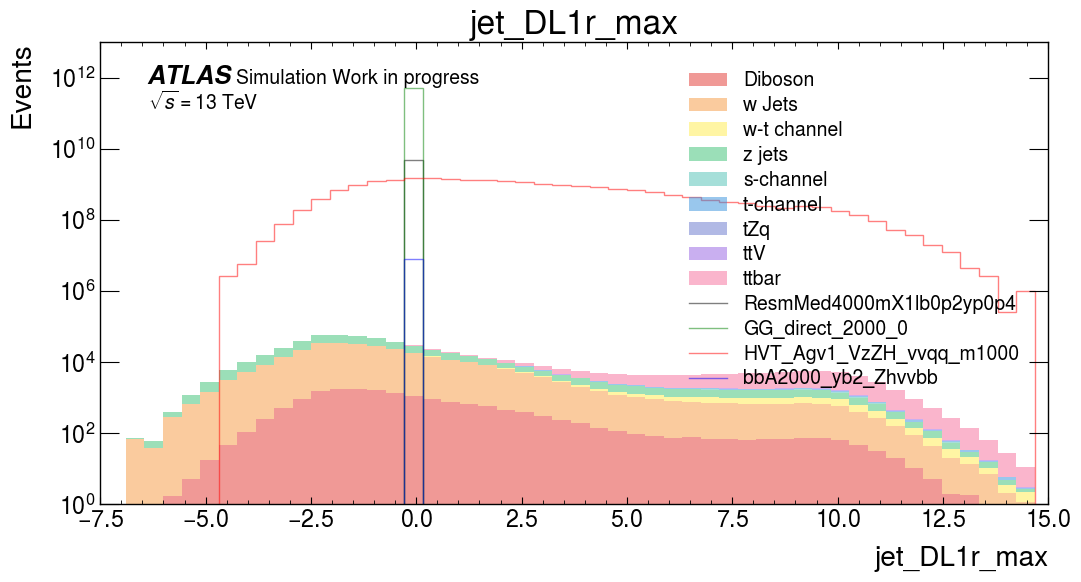

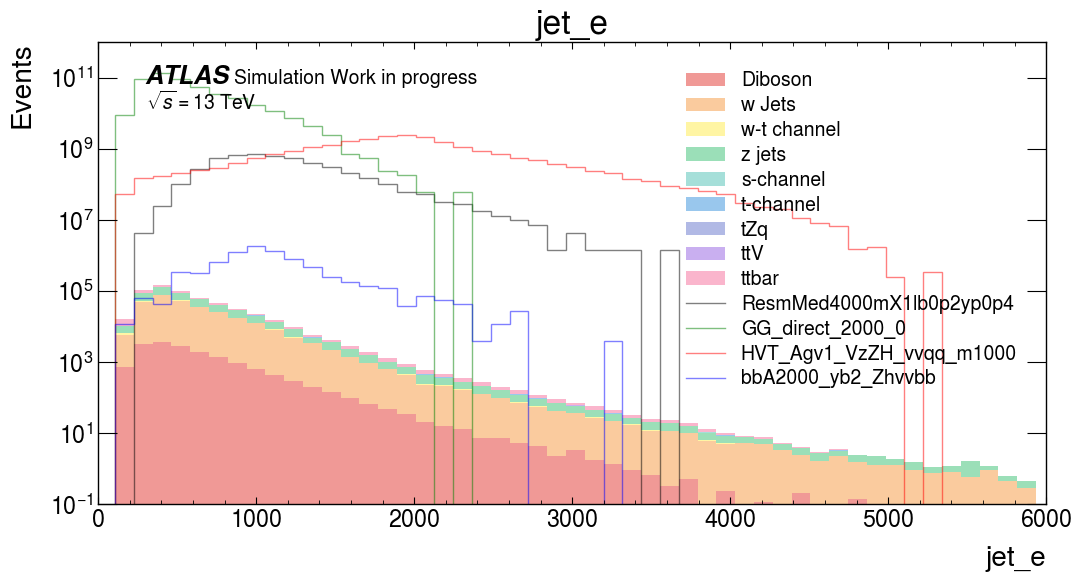

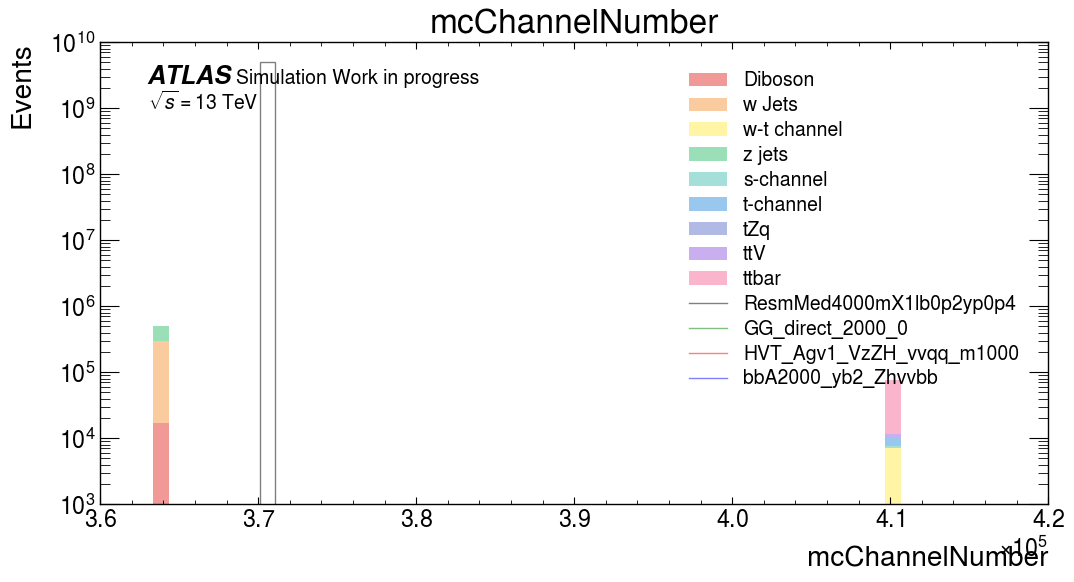

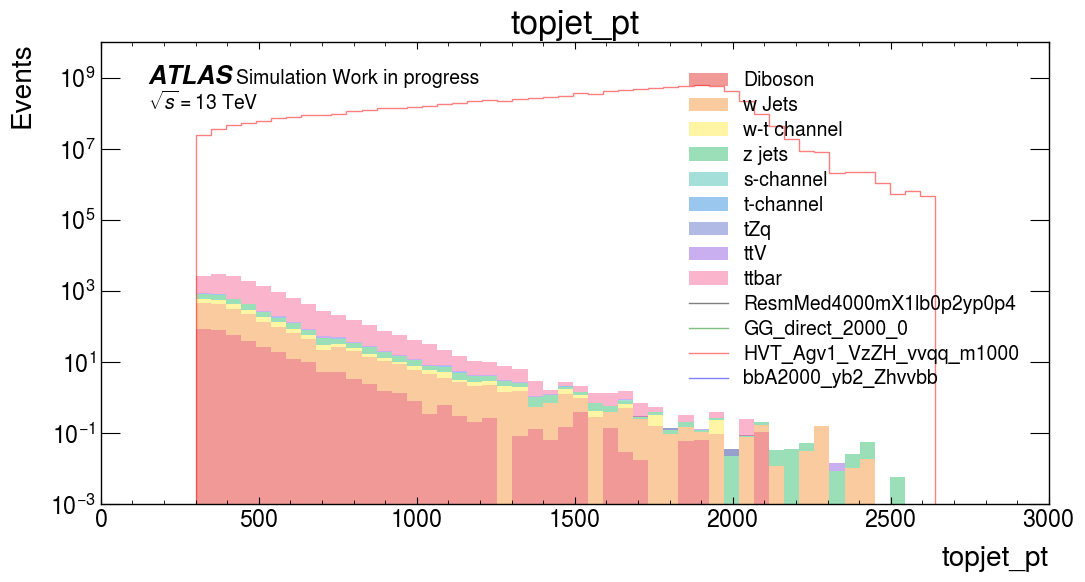

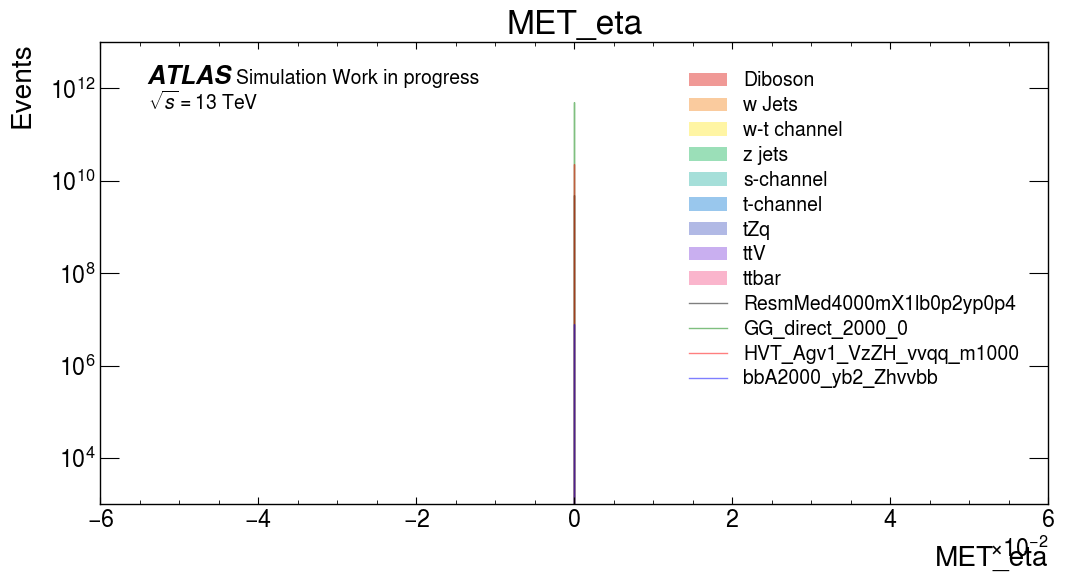

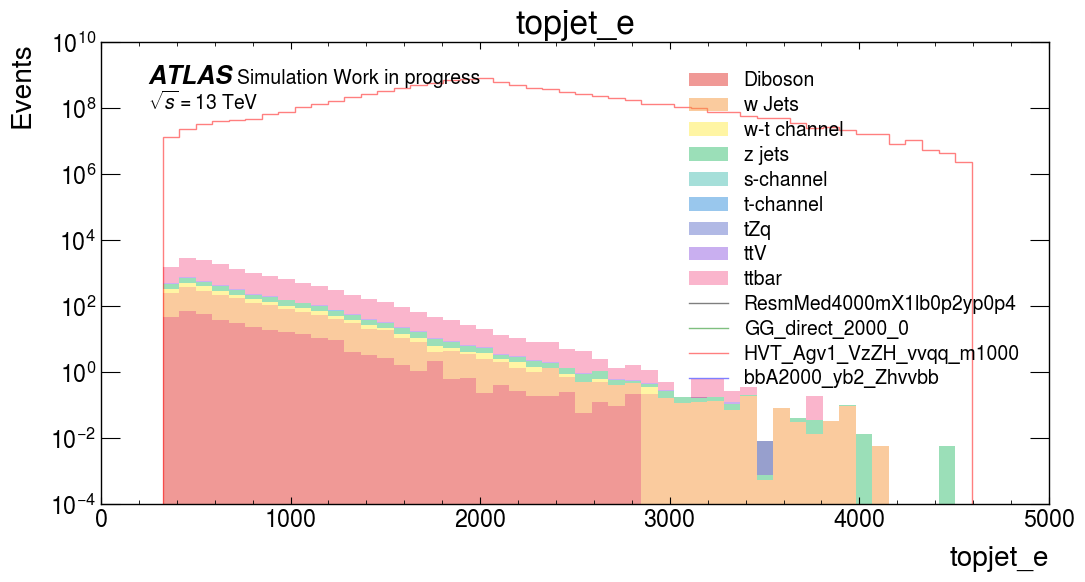

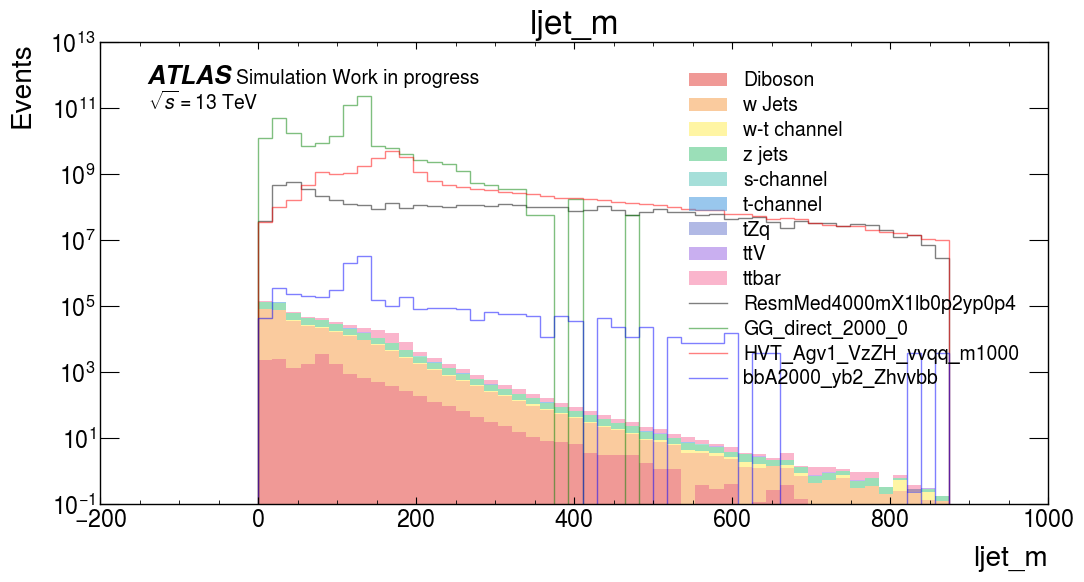

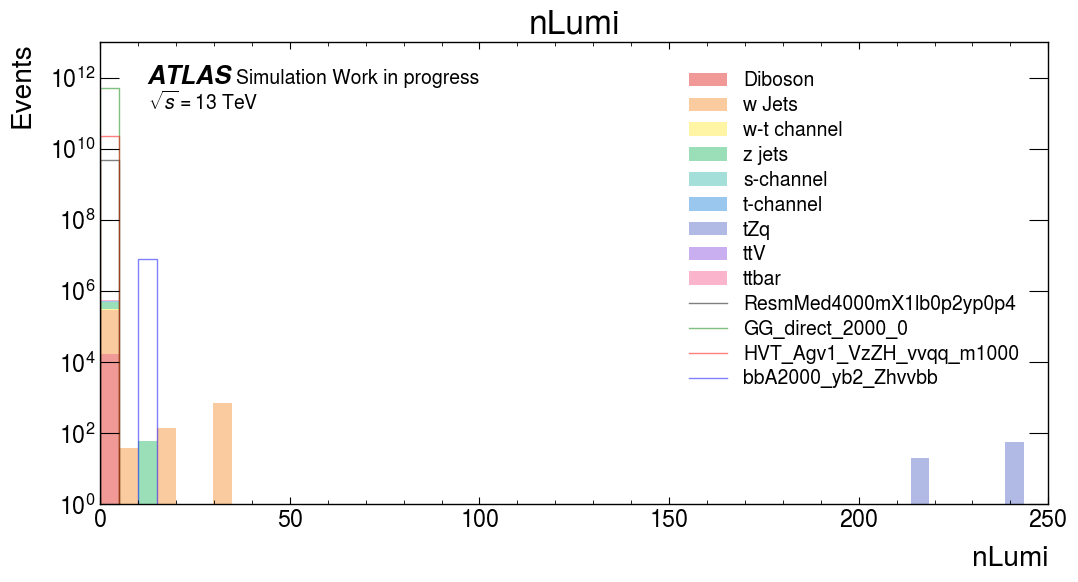

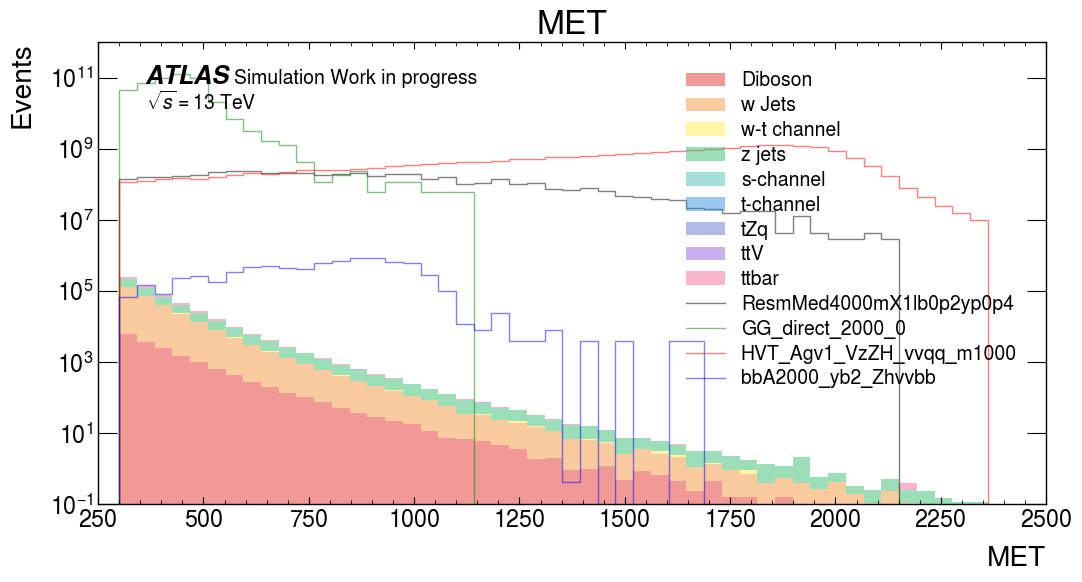

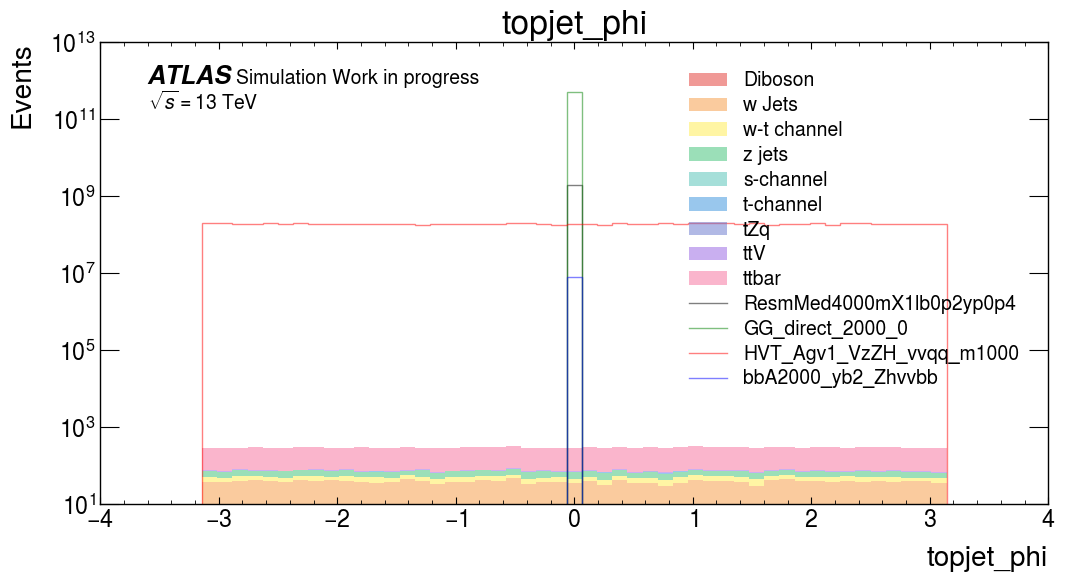

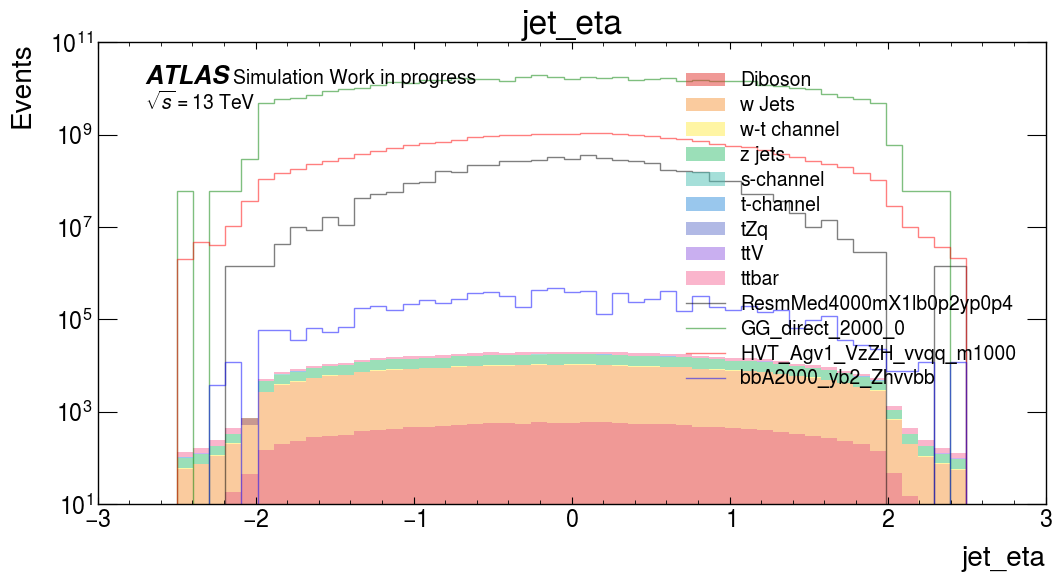

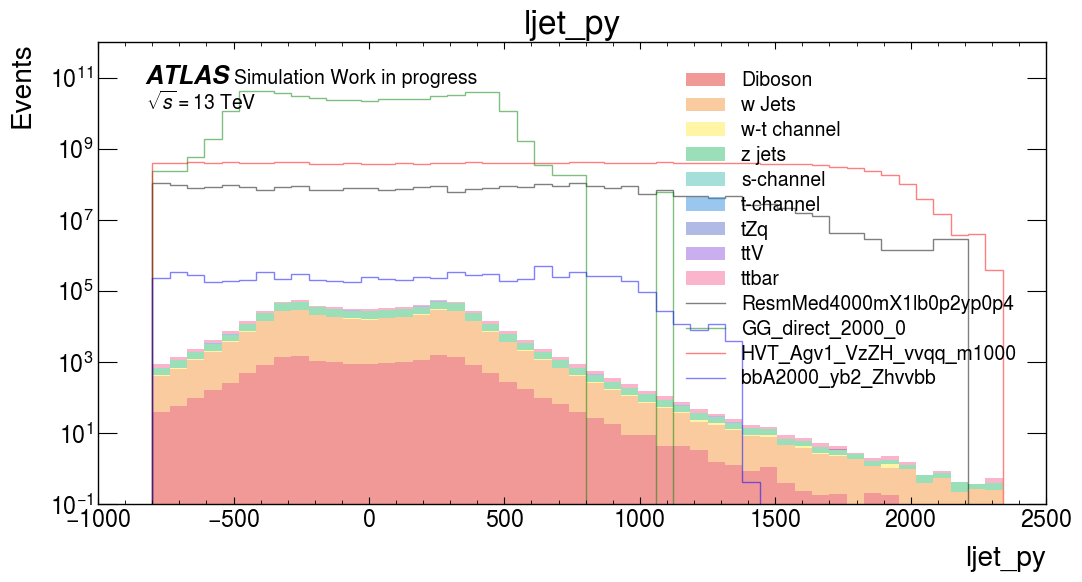

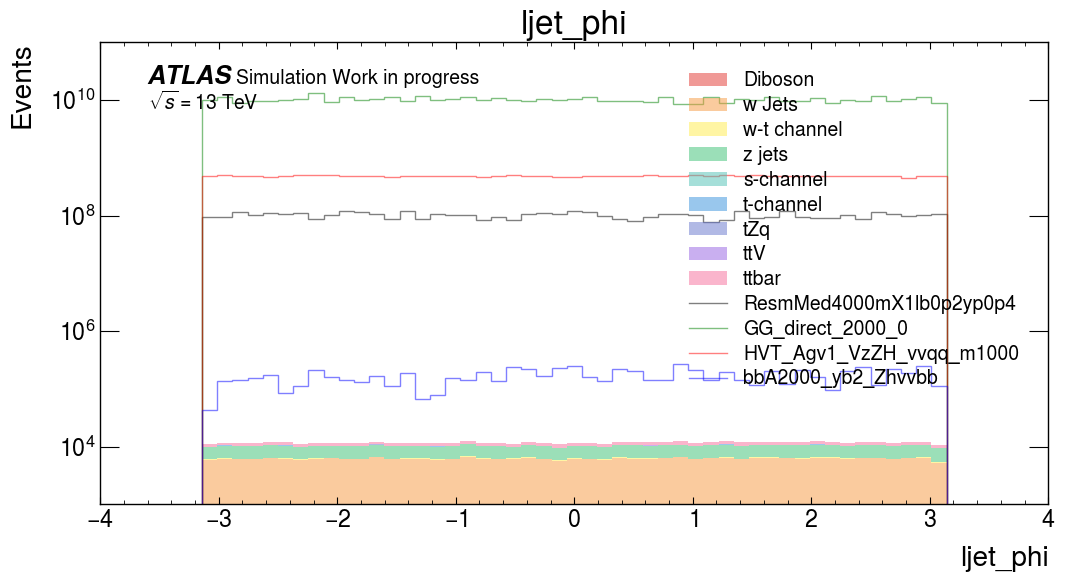

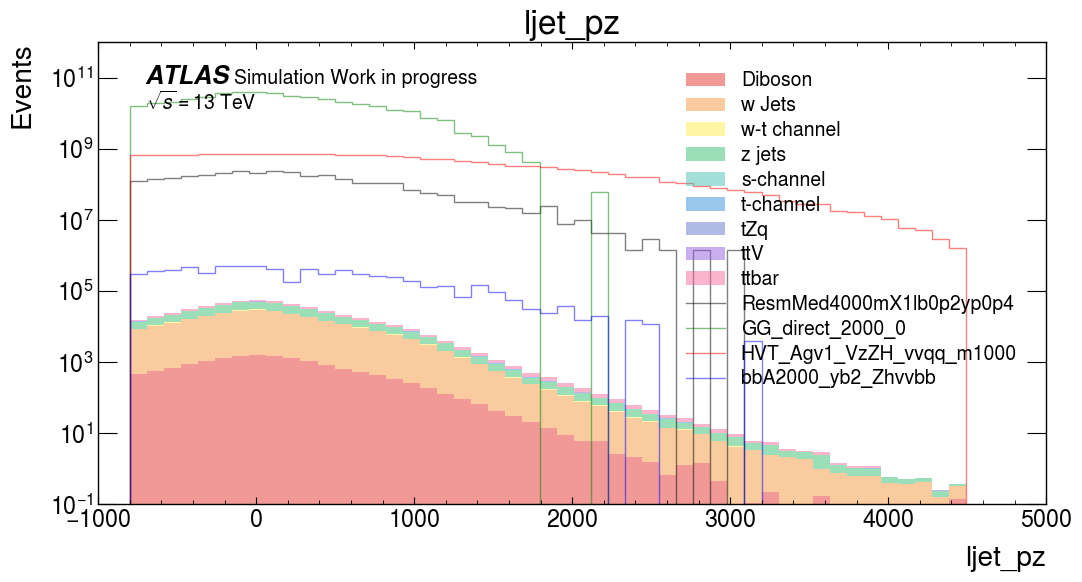

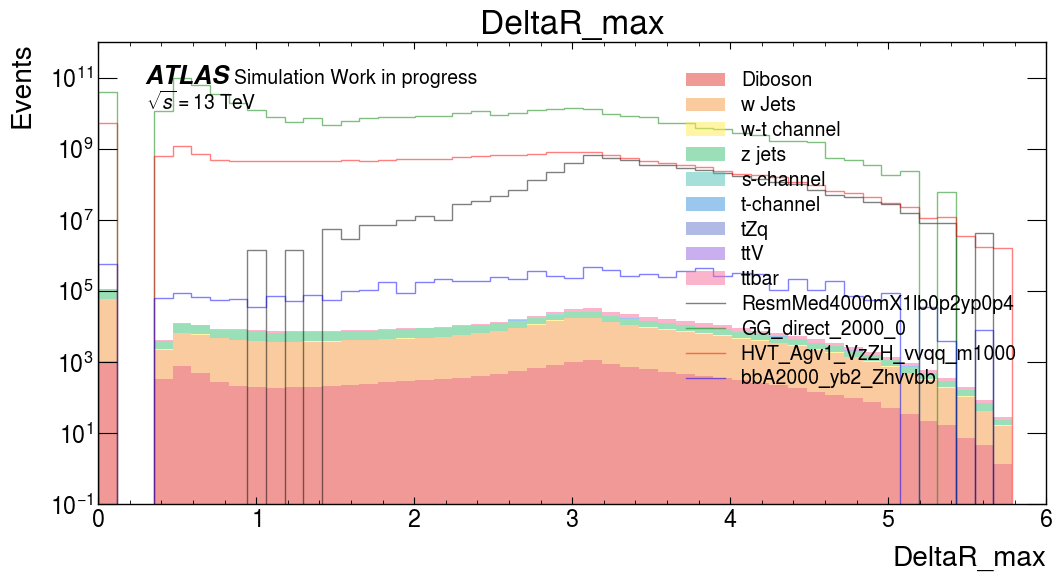

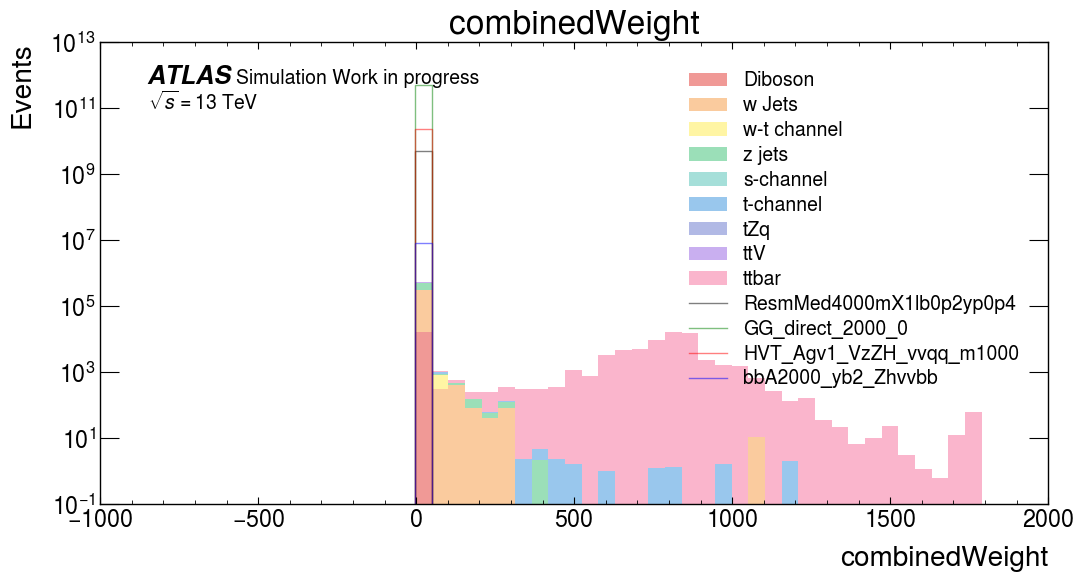

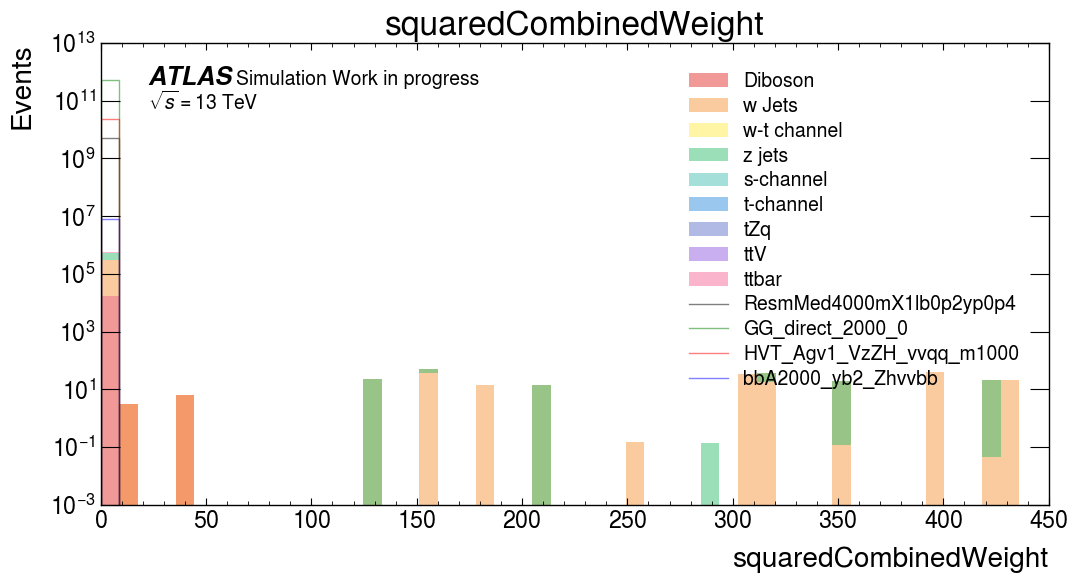

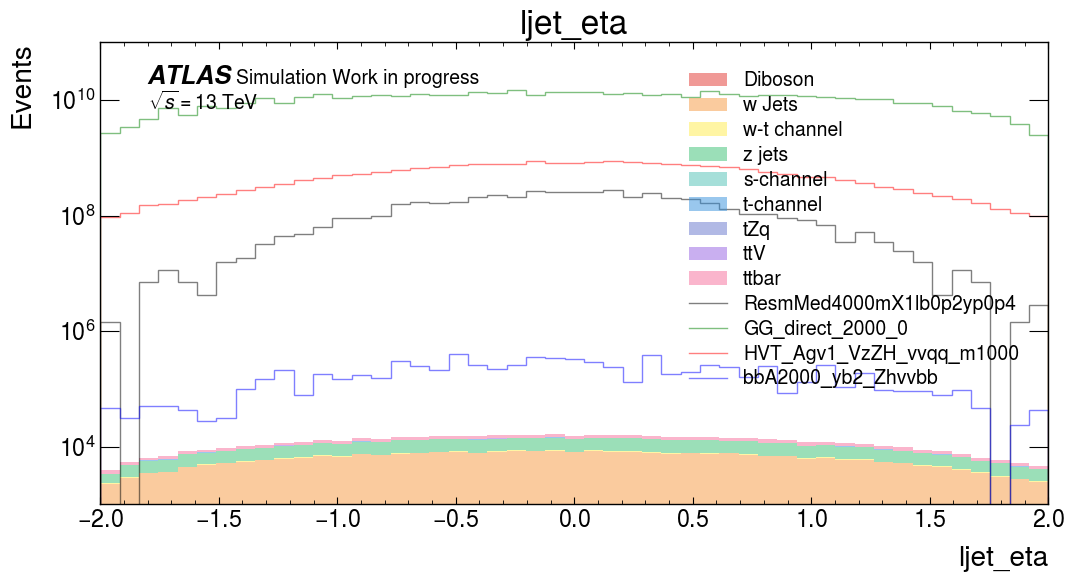

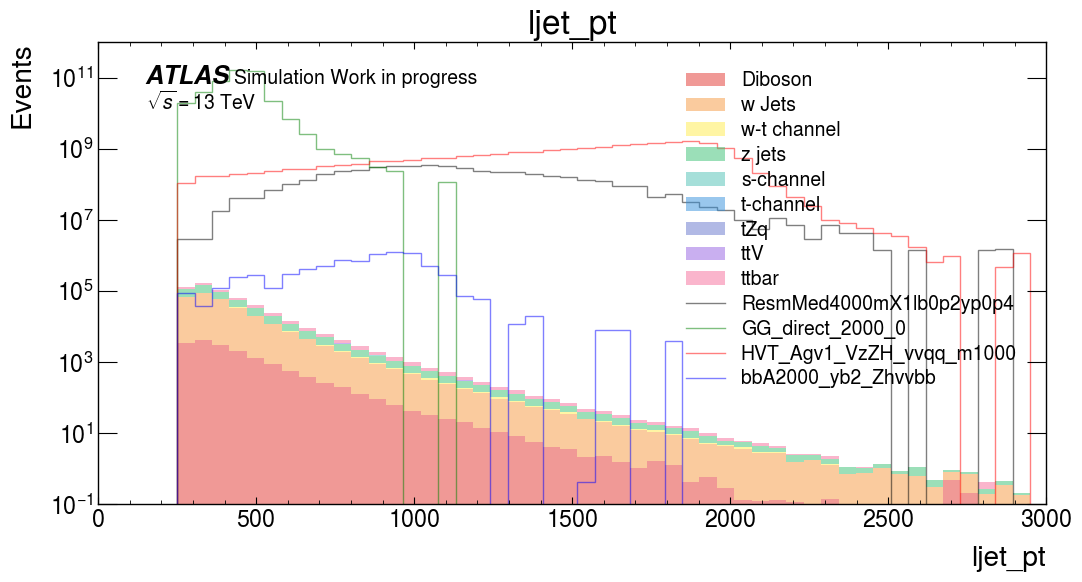

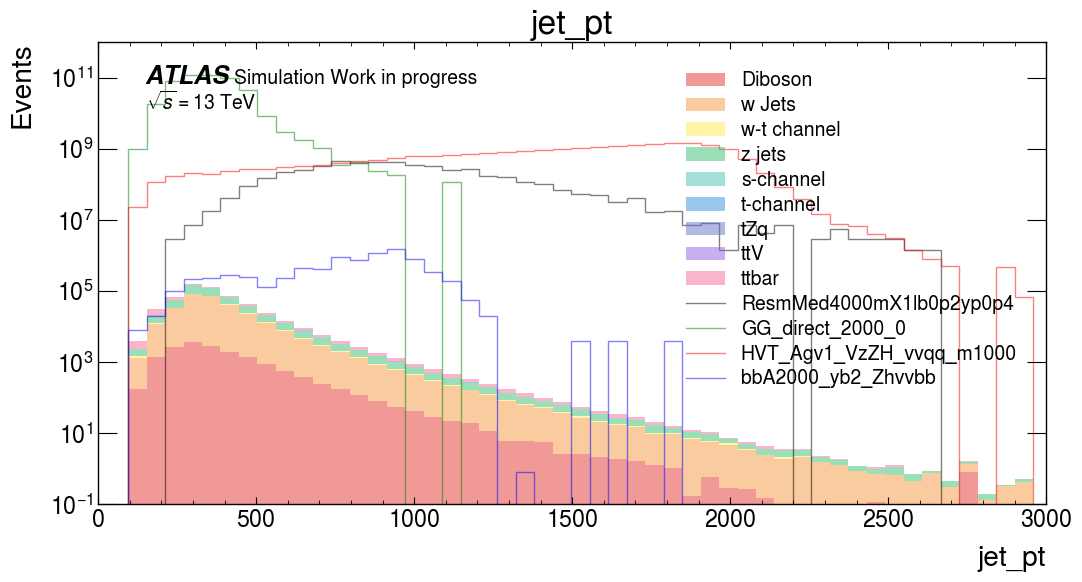

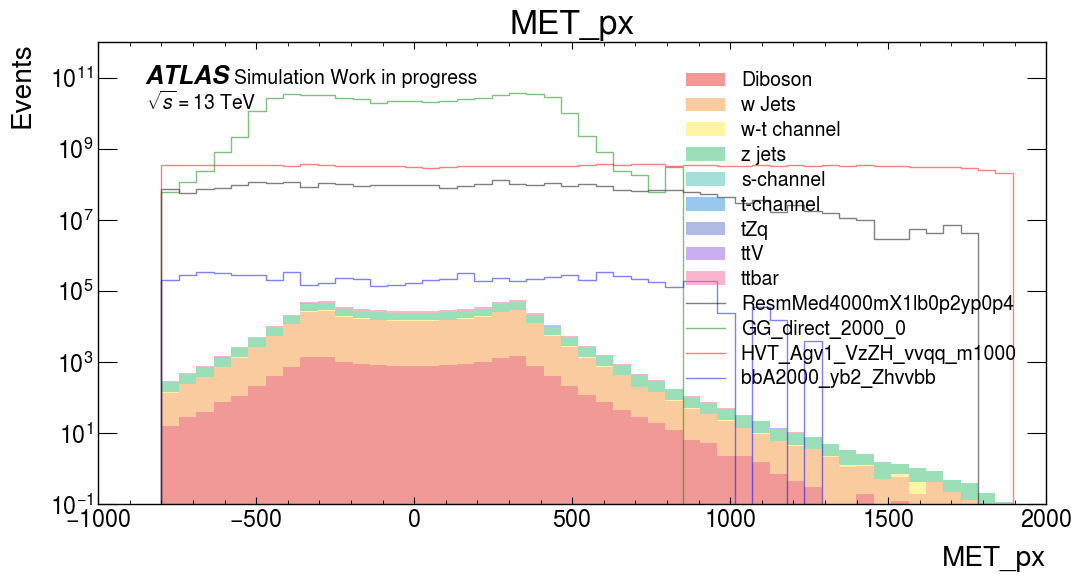

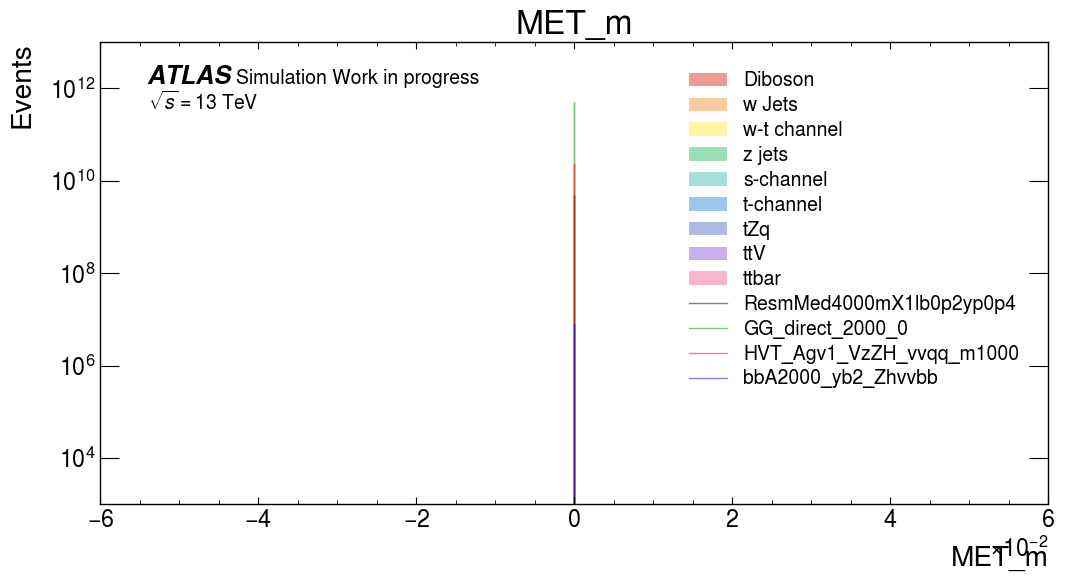

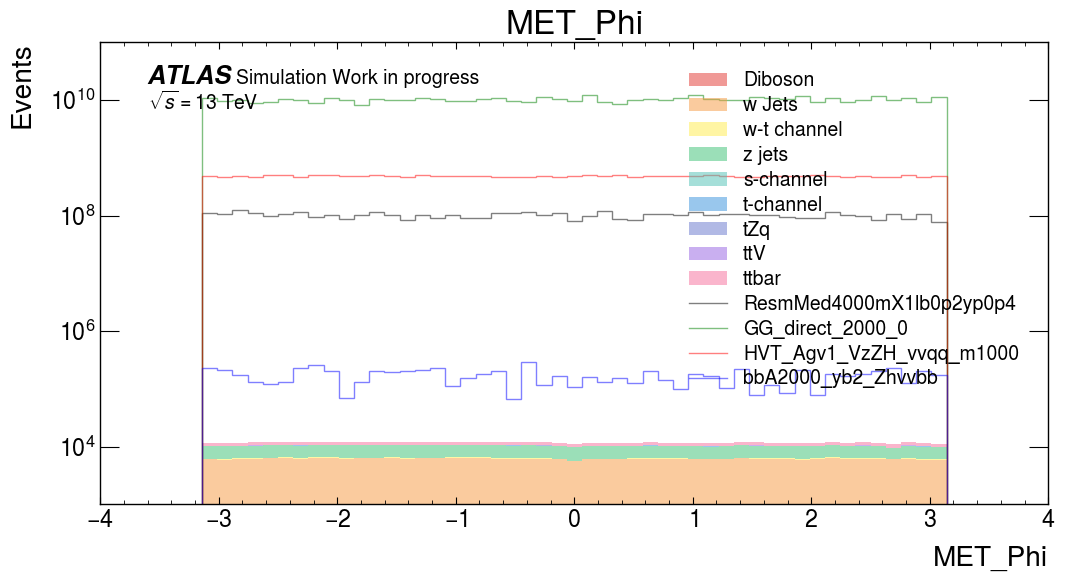

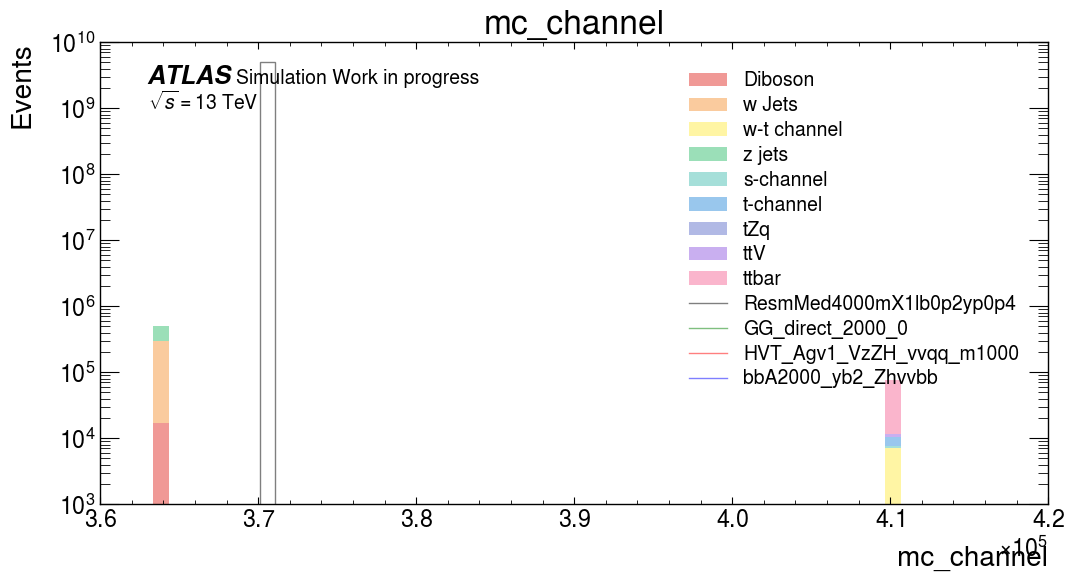

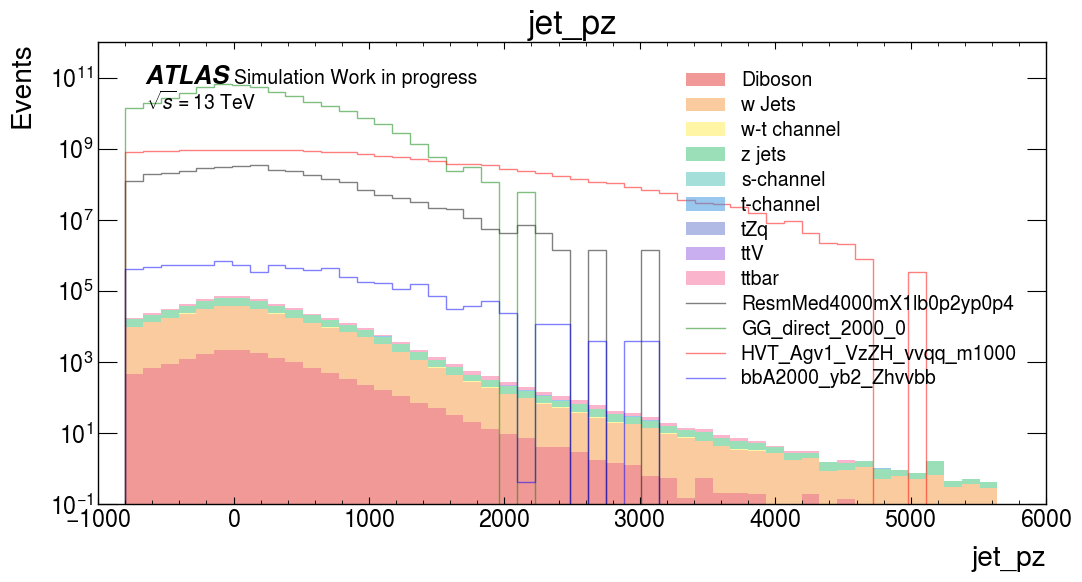

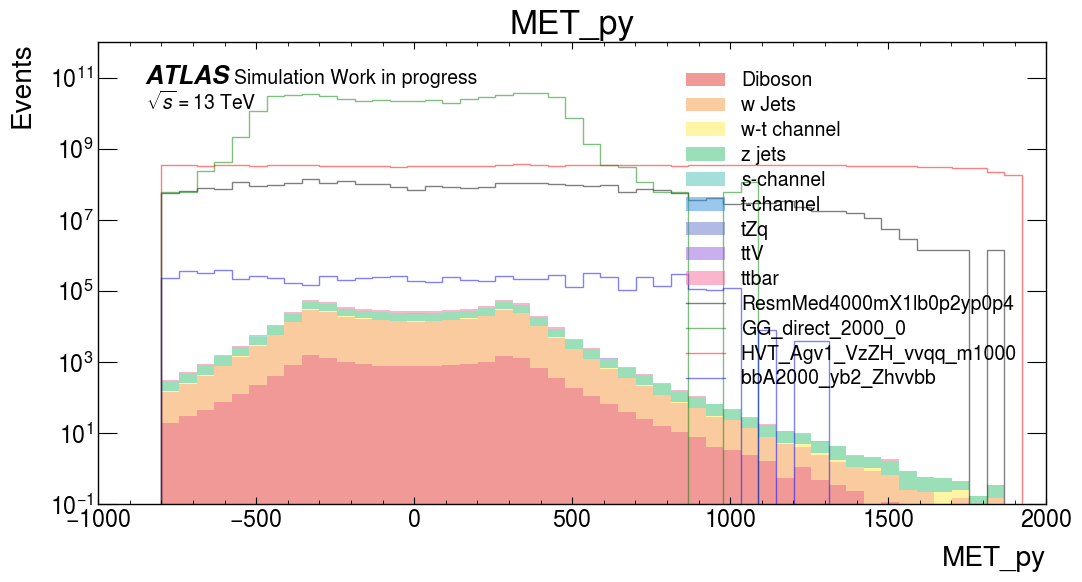

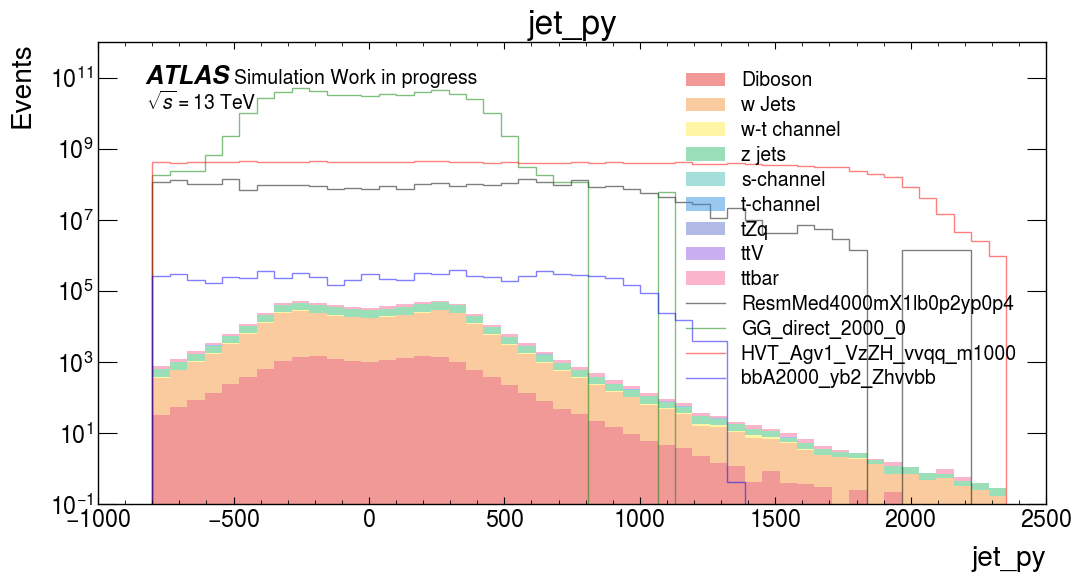

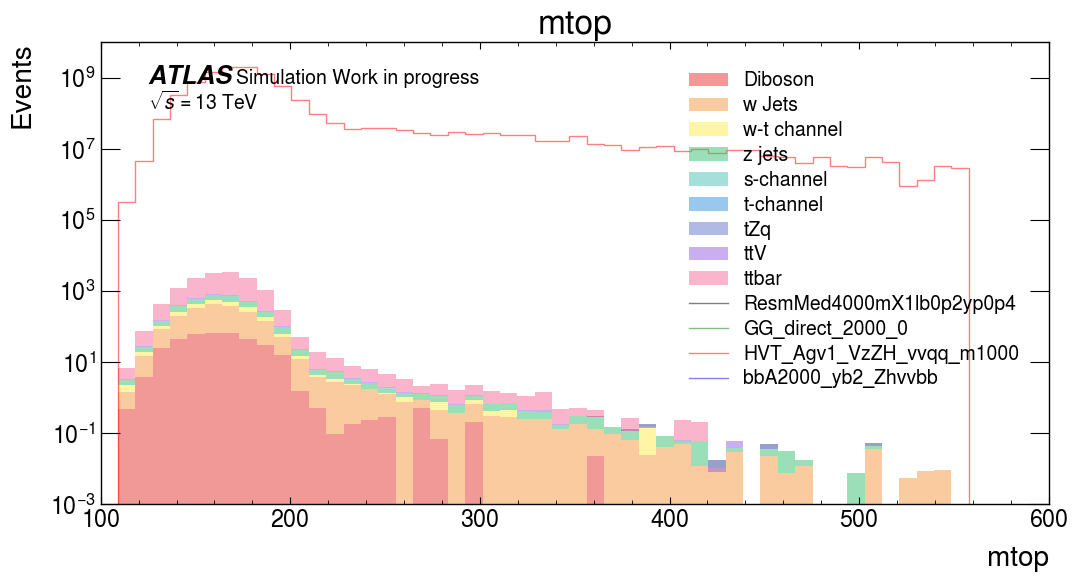

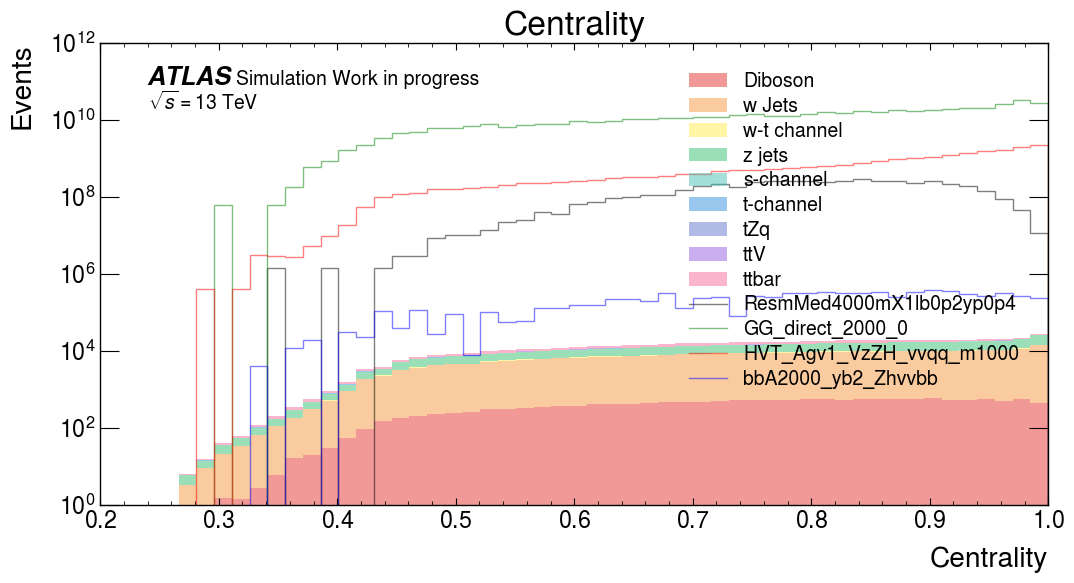

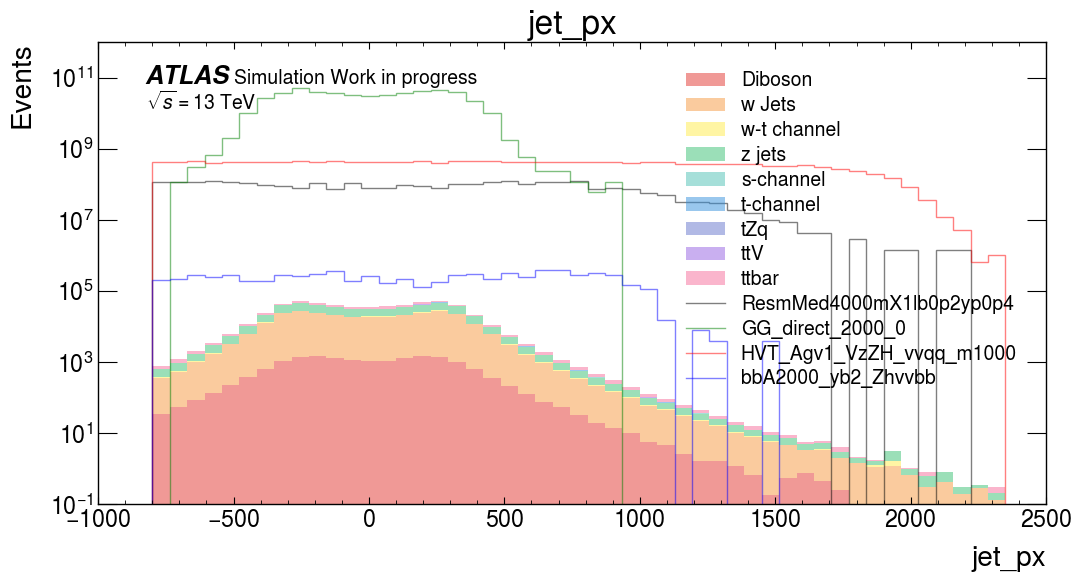

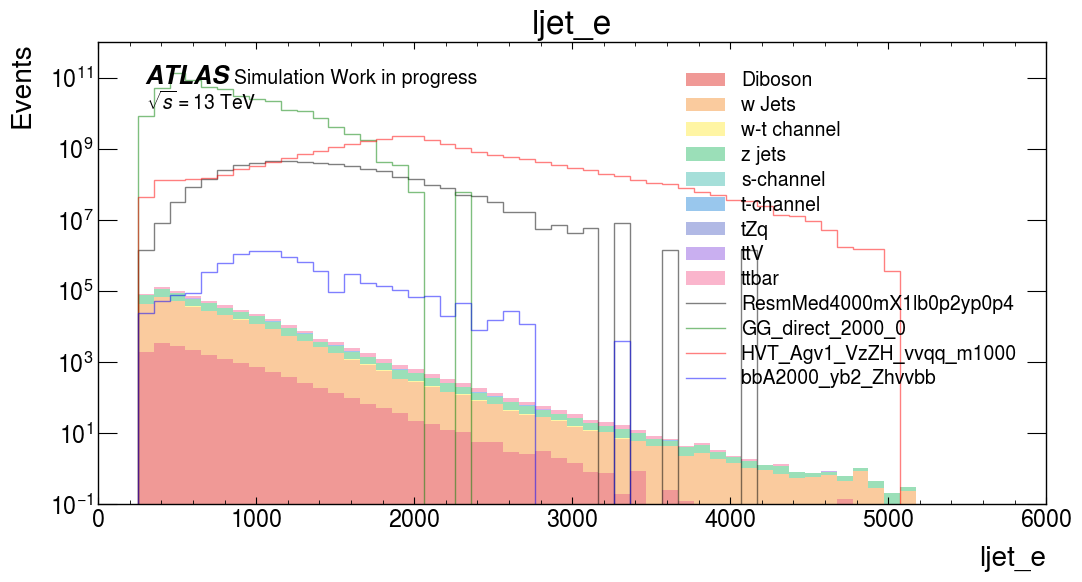

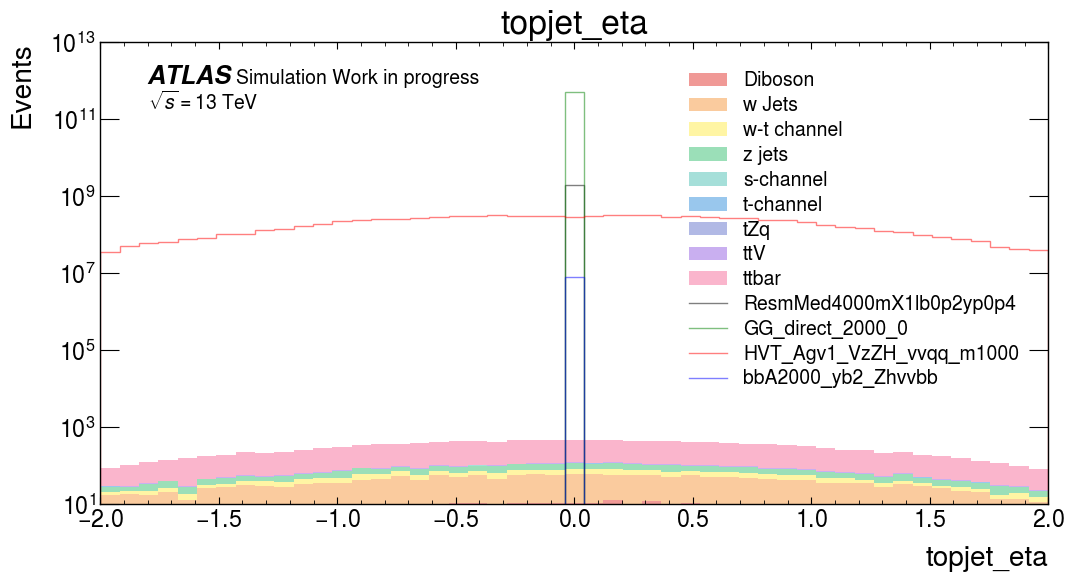

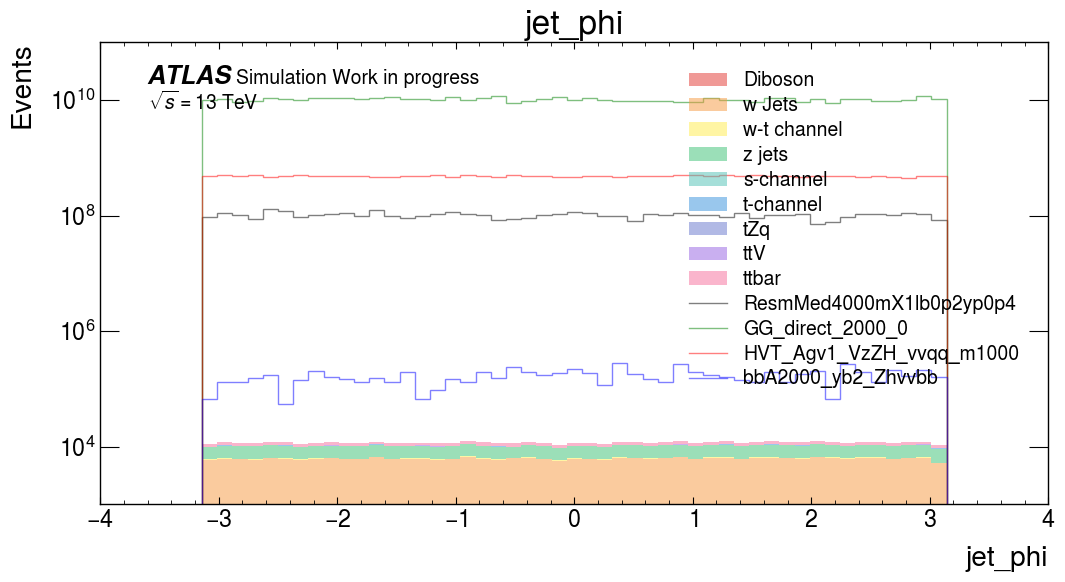

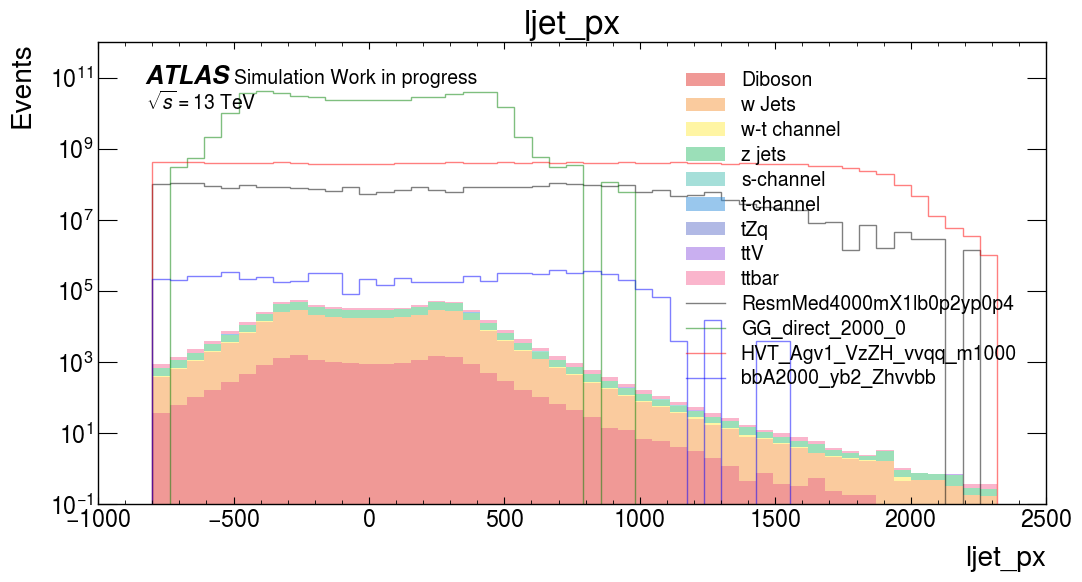

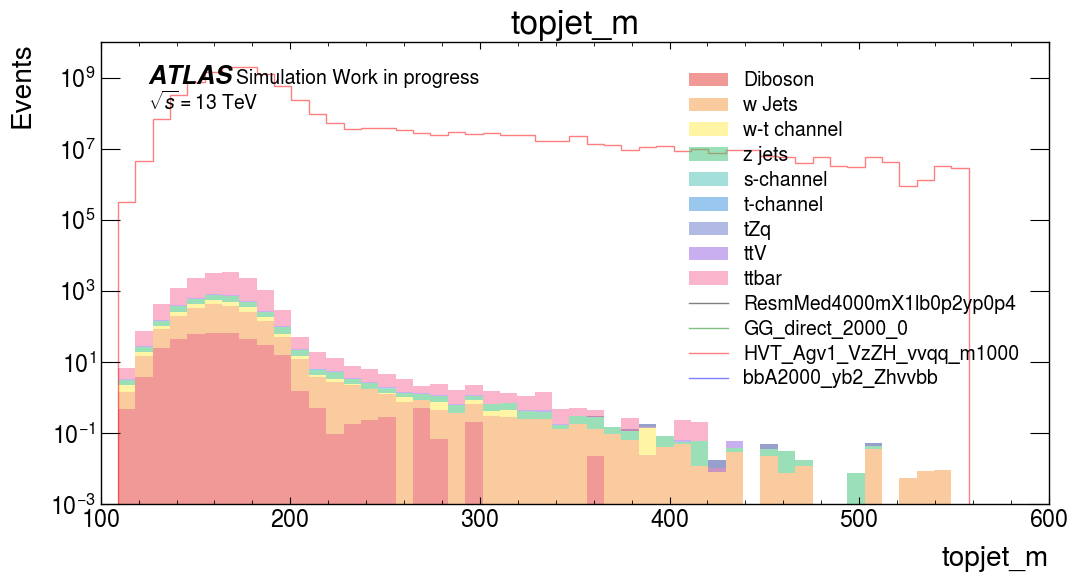

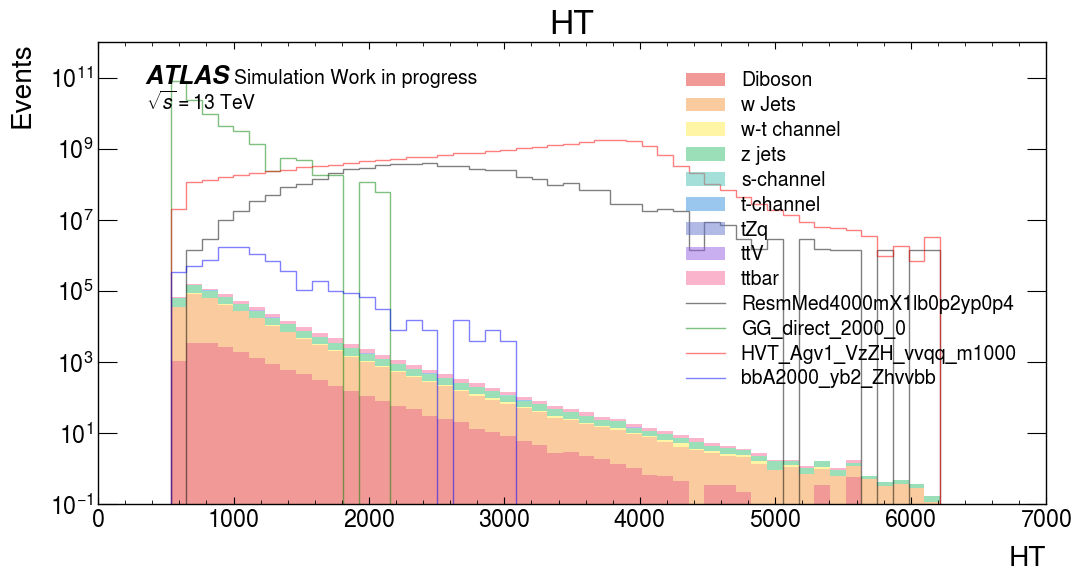

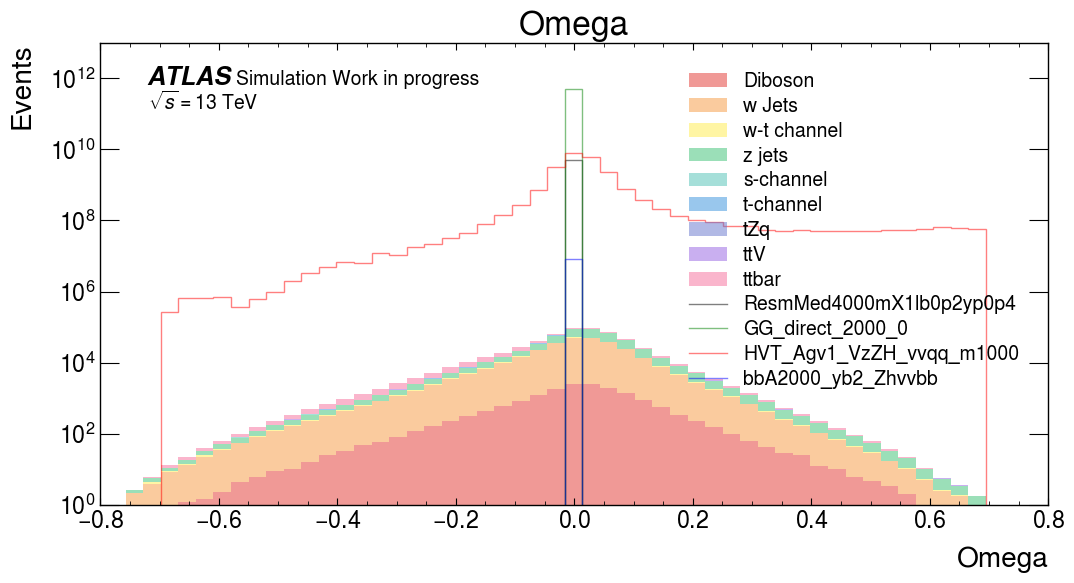

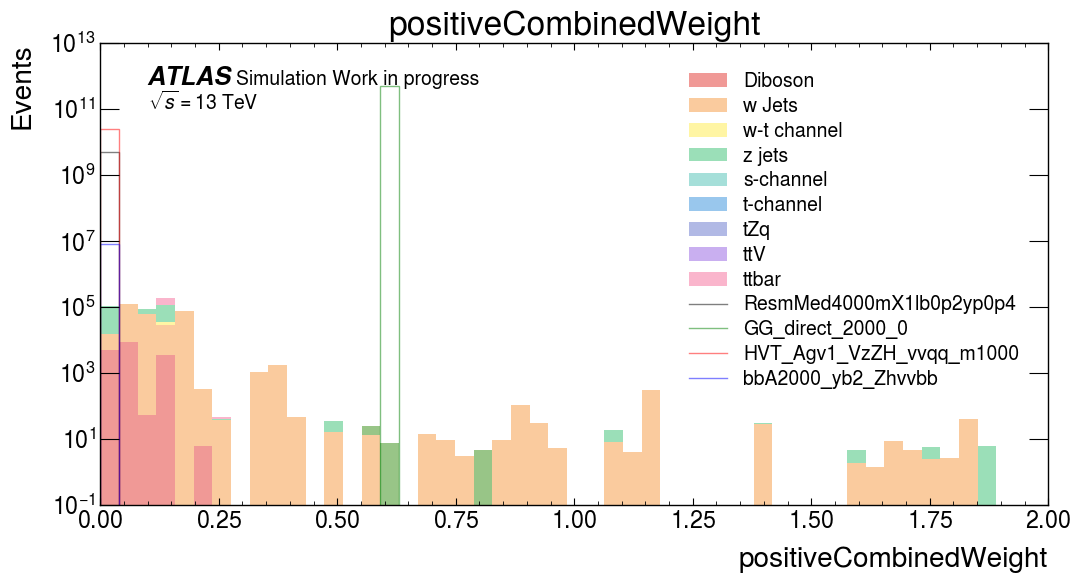

In [108]:

#list of variables to loop through
variables=['jet_DL1r_max', 'jet_e'
        , 'mcChannelNumber','topjet_pt', 'MET_eta', 'topjet_e', 'ljet_m', 'nLumi', 'MET',
       'topjet_phi', 'jet_eta', 'ljet_py', 'ljet_phi', 'ljet_pz', 'DeltaR_max',
       'combinedWeight', 'squaredCombinedWeight', 'ljet_eta', 'ljet_pt',
       'jet_pt', 'MET_px', 'MET_m', 'MET_Phi', 'mc_channel', 'jet_pz',
       'MET_py', 'jet_py', 'mtop', 'Centrality', 'jet_px', 'ljet_e', 'topjet_eta',
       'jet_phi', 'ljet_px', 'topjet_m', 'HT', 'Omega',
       'positiveCombinedWeight'
          ]
#variables=['MET','MET_Phi', 'nGoodJets','topjet_pt','topjet_m'] #use shorter list for testing 
binNum=50 #defines how many bins each histogram will be divided into

#looping through each variable in the above list
for x in variables:
    feature=x
    relevantData=background[['merge_sample','normalisedCombinedWeight',feature]] #makes a new dataset of just merge sample, weights and the variable which we are looking at 
    relevantData.drop(relevantData[relevantData[feature] <= -800].index, inplace = True)
    binEdges=binwidths(binNum,relevantData[feature]) #sets the variable binEdges equal to an array containing locations of all binedges, which have been worked out by function above (binwidths)
    signalData=allSignals[['merge_sample','normalisedCombinedWeight',feature]] #new dataset of signal data
    signalData.drop(signalData[signalData[feature] <= -800].index, inplace = True)
    output=loopTypes(relevantData,binEdges,binNum) #sets variable "output" equal to an array of the frequencies of each stack of the histogram as defined by the function loopTypes
    signalOutput=loopTypes(signalData,binEdges,binNum)
    plotGraph(x,output,binEdges,signalOutput) #plots histogram using function plot graph defined above

    